---
title: "Rock Decades Classification"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

# Decades

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
tracks = pd.read_csv('../data/clean_data/tracks.csv')

# read in rock genre data
rock = pd.read_csv('../data/raw_data/genre_data/rock.csv')

# extrack name column to list
rock_artists = rock['id'].tolist()

# only keep rows in tracks that have artists in rock_artists
tracks = tracks[tracks['artist_id'].isin(rock_artists)]

# drop columns that will not be used in our models for obvious reasons 
tracks = tracks.drop(['artist_name', 'artist_id', 'album_id', 'album_release_year', 'track_id', 'track_name', 'album_name'], axis=1)

# split 'key_mode' column
tracks['key'] = tracks['key_mode'].apply(lambda x: x.split(' ')[0])
tracks['mode'] = tracks['key_mode'].apply(lambda x: x.split(' ')[1])

# drop key_mode
tracks.drop('key_mode', axis=1, inplace=True)
# covert mode into binary
tracks['mode'] = tracks['mode'].apply(lambda x: 1 if x == 'major' else 0)

# convert key into numerical
key_dict = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
tracks['key'] = tracks['key'].apply(lambda x: key_dict[x])

# Delete row with decade column == 1940s
tracks = tracks[tracks['decade'] != '1940s']

# what does that data look like? 
tracks.head(20)

danceability  energy  loudness  speechiness  acousticness  \
943         0.455   0.790    -4.049       0.0432      0.000004   
944         0.526   0.871    -4.132       0.0320      0.000017   
945         0.599   0.787    -4.708       0.0338      0.000021   
946         0.570   0.753    -5.980       0.0365      0.000002   
947         0.675   0.930    -4.515       0.0319      0.000083   
948         0.616   0.801    -4.390       0.0342      0.000165   
949         0.521   0.881    -5.309       0.0387      0.000005   
950         0.737   0.709    -5.744       0.0337      0.000120   
951         0.490   0.905    -4.488       0.0300      0.000459   
952         0.649   0.849    -4.502       0.0326      0.000019   
953         0.628   0.830    -4.752       0.0626      0.000380   
954         0.549   0.731    -5.617       0.0350      0.000123   
955         0.572   0.825    -3.977       0.0400      0.000071   
956         0.520   0.872    -4.354       0.0383      0.000007   
957         0.537   0.880    -4.902       0.0353      0.000131   
958         0.510   0.896    -3.585       0.0624      0.000011   
959         0.502   0.816    -4.562       0.0329      0.000047   
960         0.626   0.833    -4.352       0.0285      0.000157   
961         0.570   0.758    -4.362       0.0360      0.000056   
962         0.457   0.930    -4.203       0.0588      0.000005   

     instrumentalness  liveness  valence    tempo  time_signature  \
943          0.000210    0.0866    0.220  125.964               4   
944          0.000142    0.0573    0.745  109.820               4   
945          0.000053    0.0640    0.822  114.065               4   
946          0.627000    0.1330    0.477  119.990               4   
947          0.000454    0.3150    0.778  110.013               4   
948          0.000040    0.1100    0.400  120.029               4   
949          0.011400    0.1410    0.564  160.026               4   
950          0.002940    0.1990    0.839  108.016               4   
951          0.009340    0.2020    0.537   94.988               4   
952          0.085200    0.0949    0.864  116.009               4   
953          0.000025    0.0982    0.767  120.004               4   
954          0.000013    0.0655    0.622   86.239               4   
955          0.000134    0.1340    0.560   98.057               4   
956          0.246000    0.2070    0.449  120.006               4   
957          0.005310    0.1350    0.370  120.976               4   
958          0.000771    0.0826    0.652  120.134               4   
959          0.021700    0.3020    0.475   99.372               4   
960          0.000717    0.0608    0.863  107.572               4   
961          0.030400    0.4480    0.451   93.095               4   
962          0.197000    0.1740    0.674  150.188               4   

     duration_ms decade  key  mode  
943       217466  2020s    7     1  
944       246466  2020s    7     1  
945       185133  2020s    2     1  
946       212226  2020s    9     1  
947       190333  2020s    0     1  
948       222253  2020s    9     1  
949       210360  2020s    9     1  
950       174400  2020s    0     1  
951       219640  2020s    0     1  
952       192640  2020s    9     1  
953       185320  2020s    7     1  
954       211146  2020s    2     1  
955       183053  2010s    8     1  
956       167133  2010s    0     1  
957       204373  2010s    5     1  
958       177253  2010s    9     1  
959       215440  2010s    9     1  
960       202586  2010s    2     1  
961       164226  2010s    9     1  
962       210200  2010s    9     1

In [2]:
tracks['decade'].value_counts()

decade
2010s    1814
2000s    1194
2020s     813
1990s     797
1980s     543
1970s     527
1960s     255
Name: count, dtype: int64

In [3]:
decades = tracks

## Classification Data Prep

In [4]:
# convert key and mode to factors
decades['key'] = decades['key'].astype('category')
decades['mode'] = decades['mode'].astype('category')

# rename mode to major
decades.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
decades.head(20)

danceability  energy  loudness  speechiness  acousticness  \
943         0.455   0.790    -4.049       0.0432      0.000004   
944         0.526   0.871    -4.132       0.0320      0.000017   
945         0.599   0.787    -4.708       0.0338      0.000021   
946         0.570   0.753    -5.980       0.0365      0.000002   
947         0.675   0.930    -4.515       0.0319      0.000083   
948         0.616   0.801    -4.390       0.0342      0.000165   
949         0.521   0.881    -5.309       0.0387      0.000005   
950         0.737   0.709    -5.744       0.0337      0.000120   
951         0.490   0.905    -4.488       0.0300      0.000459   
952         0.649   0.849    -4.502       0.0326      0.000019   
953         0.628   0.830    -4.752       0.0626      0.000380   
954         0.549   0.731    -5.617       0.0350      0.000123   
955         0.572   0.825    -3.977       0.0400      0.000071   
956         0.520   0.872    -4.354       0.0383      0.000007   
957         0.537   0.880    -4.902       0.0353      0.000131   
958         0.510   0.896    -3.585       0.0624      0.000011   
959         0.502   0.816    -4.562       0.0329      0.000047   
960         0.626   0.833    -4.352       0.0285      0.000157   
961         0.570   0.758    -4.362       0.0360      0.000056   
962         0.457   0.930    -4.203       0.0588      0.000005   

     instrumentalness  liveness  valence    tempo  time_signature  \
943          0.000210    0.0866    0.220  125.964               4   
944          0.000142    0.0573    0.745  109.820               4   
945          0.000053    0.0640    0.822  114.065               4   
946          0.627000    0.1330    0.477  119.990               4   
947          0.000454    0.3150    0.778  110.013               4   
948          0.000040    0.1100    0.400  120.029               4   
949          0.011400    0.1410    0.564  160.026               4   
950          0.002940    0.1990    0.839  108.016               4   
951          0.009340    0.2020    0.537   94.988               4   
952          0.085200    0.0949    0.864  116.009               4   
953          0.000025    0.0982    0.767  120.004               4   
954          0.000013    0.0655    0.622   86.239               4   
955          0.000134    0.1340    0.560   98.057               4   
956          0.246000    0.2070    0.449  120.006               4   
957          0.005310    0.1350    0.370  120.976               4   
958          0.000771    0.0826    0.652  120.134               4   
959          0.021700    0.3020    0.475   99.372               4   
960          0.000717    0.0608    0.863  107.572               4   
961          0.030400    0.4480    0.451   93.095               4   
962          0.197000    0.1740    0.674  150.188               4   

     duration_ms decade key major  
943       217466  2020s   7     1  
944       246466  2020s   7     1  
945       185133  2020s   2     1  
946       212226  2020s   9     1  
947       190333  2020s   0     1  
948       222253  2020s   9     1  
949       210360  2020s   9     1  
950       174400  2020s   0     1  
951       219640  2020s   0     1  
952       192640  2020s   9     1  
953       185320  2020s   7     1  
954       211146  2020s   2     1  
955       183053  2010s   8     1  
956       167133  2010s   0     1  
957       204373  2010s   5     1  
958       177253  2010s   9     1  
959       215440  2010s   9     1  
960       202586  2010s   2     1  
961       164226  2010s   9     1  
962       210200  2010s   9     1

In [5]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = decades.select_dtypes(include=[np.number]).columns
decades[numerical_columns] = (decades[numerical_columns] - decades[numerical_columns].min()) / (decades[numerical_columns].max() - decades[numerical_columns].min())

# what does the data look like now?
decades.head(20)

danceability    energy  loudness  speechiness  acousticness  \
943      0.464286  0.791583  0.937517     0.046352      0.000004   
944      0.536735  0.872745  0.936126     0.034335      0.000017   
945      0.611224  0.788577  0.926475     0.036266      0.000021   
946      0.581633  0.754509  0.905161     0.039163      0.000002   
947      0.688776  0.931864  0.929708     0.034227      0.000084   
948      0.628571  0.802605  0.931803     0.036695      0.000166   
949      0.531633  0.882766  0.916404     0.041524      0.000005   
950      0.752041  0.710421  0.909115     0.036159      0.000121   
951      0.500000  0.906814  0.930161     0.032189      0.000461   
952      0.662245  0.850701  0.929926     0.034979      0.000019   
953      0.640816  0.831663  0.925737     0.067167      0.000382   
954      0.560204  0.732465  0.911243     0.037554      0.000124   
955      0.583673  0.826653  0.938723     0.042918      0.000072   
956      0.530612  0.873747  0.932406     0.041094      0.000007   
957      0.547959  0.881764  0.923224     0.037876      0.000132   
958      0.520408  0.897796  0.945292     0.066953      0.000011   
959      0.512245  0.817635  0.928921     0.035300      0.000047   
960      0.638776  0.834669  0.932440     0.030579      0.000158   
961      0.581633  0.759519  0.932272     0.038627      0.000057   
962      0.466327  0.931864  0.934936     0.063090      0.000005   

     instrumentalness  liveness   valence     tempo  time_signature  \
943          0.000212  0.087563  0.224949  0.522661             0.8   
944          0.000144  0.057937  0.761759  0.455675             0.8   
945          0.000053  0.064712  0.840491  0.473289             0.8   
946          0.633974  0.134479  0.487730  0.497873             0.8   
947          0.000459  0.318504  0.795501  0.456476             0.8   
948          0.000040  0.111223  0.408998  0.498035             0.8   
949          0.011527  0.142568  0.576687  0.663995             0.8   
950          0.002973  0.201213  0.857873  0.448190             0.8   
951          0.009444  0.204247  0.549080  0.394133             0.8   
952          0.086148  0.095956  0.883436  0.481355             0.8   
953          0.000026  0.099292  0.784254  0.497932             0.8   
954          0.000013  0.066229  0.635992  0.357831             0.8   
955          0.000135  0.135490  0.572597  0.406867             0.8   
956          0.248736  0.209302  0.459100  0.497940             0.8   
957          0.005369  0.136502  0.378323  0.501965             0.8   
958          0.000780  0.083519  0.666667  0.498471             0.8   
959          0.021941  0.305359  0.485685  0.412323             0.8   
960          0.000725  0.061476  0.882413  0.446348             0.8   
961          0.030738  0.452983  0.461145  0.386278             0.8   
962          0.199191  0.175935  0.689162  0.623174             0.8   

     duration_ms decade key major  
943     0.077988  2020s   7     1  
944     0.088626  2020s   7     1  
945     0.066128  2020s   2     1  
946     0.076066  2020s   9     1  
947     0.068036  2020s   0     1  
948     0.079744  2020s   9     1  
949     0.075382  2020s   9     1  
950     0.062191  2020s   0     1  
951     0.078786  2020s   0     1  
952     0.068882  2020s   9     1  
953     0.066197  2020s   7     1  
954     0.075670  2020s   2     1  
955     0.065365  2010s   8     1  
956     0.059526  2010s   0     1  
957     0.073186  2010s   5     1  
958     0.063238  2010s   9     1  
959     0.077245  2010s   9     1  
960     0.072530  2010s   2     1  
961     0.058459  2010s   9     1  
962     0.075323  2010s   9     1

In [6]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(decades, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['decade'], axis=1)
y_train = train[['decade']]
X_test = test.drop(['decade'], axis=1)
y_test = test[['decade']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (4754, 13) 
Shape of X_test:  (1189, 13) 
Shape of y_train:  (4754, 1) 
Shape of y_test:  (1189, 1)


In [7]:
train['decade'].value_counts()

decade
2010s    1451
2000s     960
1990s     638
2020s     633
1980s     453
1970s     416
1960s     203
Name: count, dtype: int64

In [8]:
from sklearn.utils import resample

# Combine the features and target for training set
train_df = pd.concat([X_train, y_train], axis=1)

# sample the training dataset classes
resampled_df_list = []
min_class_size = int(y_train.value_counts().min())

for decade_value, group in train_df.groupby('decade'):
    resampled_group = resample(group,
                               replace=False,
                               n_samples=min_class_size,
                               random_state=137)
    resampled_df_list.append(resampled_group)

# Combine the resampled training dataframes
balanced_train_df = pd.concat(resampled_df_list)

# Print the new class distribution
print("New class distribution after resampling:")
print(balanced_train_df['decade'].value_counts())
print("Balanced dataset created and saved successfully without using SMOTE.")

New class distribution after resampling:
decade
1960s    203
1970s    203
1980s    203
1990s    203
2000s    203
2010s    203
2020s    203
Name: count, dtype: int64
Balanced dataset created and saved successfully without using SMOTE.


In [9]:
X_train = balanced_train_df.drop(['decade'], axis=1)
y_train = balanced_train_df[['decade']]

In [10]:
# value counts of genre in the training data
y_train['decade'].value_counts()

decade
1960s    203
1970s    203
1980s    203
1990s    203
2000s    203
2010s    203
2020s    203
Name: count, dtype: int64

In [11]:
# value counts of genre in test data
y_test['decade'].value_counts()

decade
2010s    363
2000s    234
2020s    180
1990s    159
1970s    111
1980s     90
1960s     52
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(y_train)
test_target_encoded = label_encoder.fit_transform(y_test)

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic Regression using OVR

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Best Parameters: {'C': 206.913808111479, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.3229604709840202
Classification Report:
              precision    recall  f1-score   support

       1960s       0.18      0.44      0.25        52
       1970s       0.40      0.40      0.40       111
       1980s       0.29      0.49      0.36        90
       1990s       0.35      0.42      0.38       159
       2000s       0.26      0.24      0.25       234
       2010s       0.50      0.26      0.34       363
       2020s       0.28      0.31      0.29       180

    accuracy                           0.32      1189
   macro avg       0.32      0.36      0.33      1189
weighted avg       0.36      0.32      0.32      1189



Text(0.5, 1.0, 'Training Confusion Matrix')

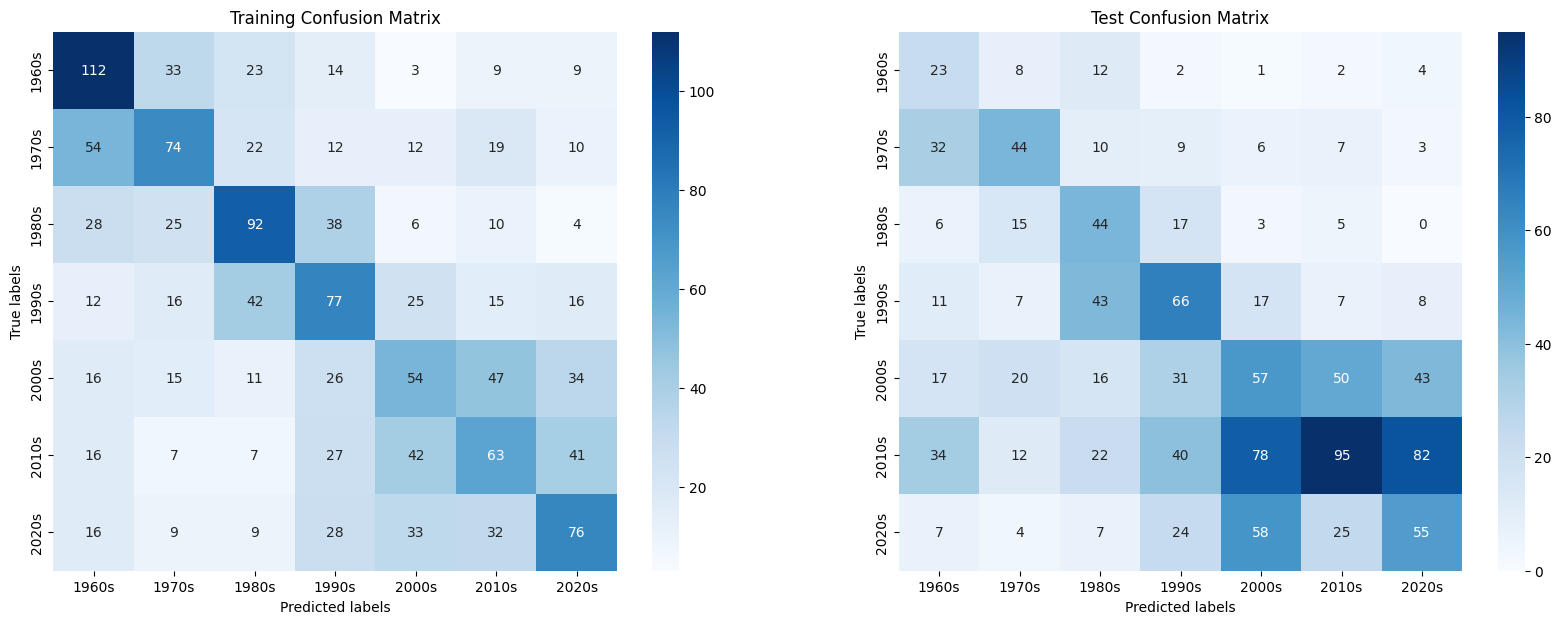

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [15]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

Best Parameters: {'C': 29.763514416313132, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.29857022708158115
SVM Classification Report:
              precision    recall  f1-score   support

       1960s       0.18      0.67      0.28        52
       1970s       0.32      0.29      0.30       111
       1980s       0.35      0.43      0.39        90
       1990s       0.38      0.42      0.40       159
       2000s       0.23      0.32      0.27       234
       2010s       0.45      0.19      0.27       363
       2020s       0.28      0.21      0.24       180

    accuracy                           0.30      1189
   macro avg       0.31      0.36      0.31      1189
weighted avg       0.34      0.30      0.30      1189



Text(0.5, 1.0, 'Training Confusion Matrix')

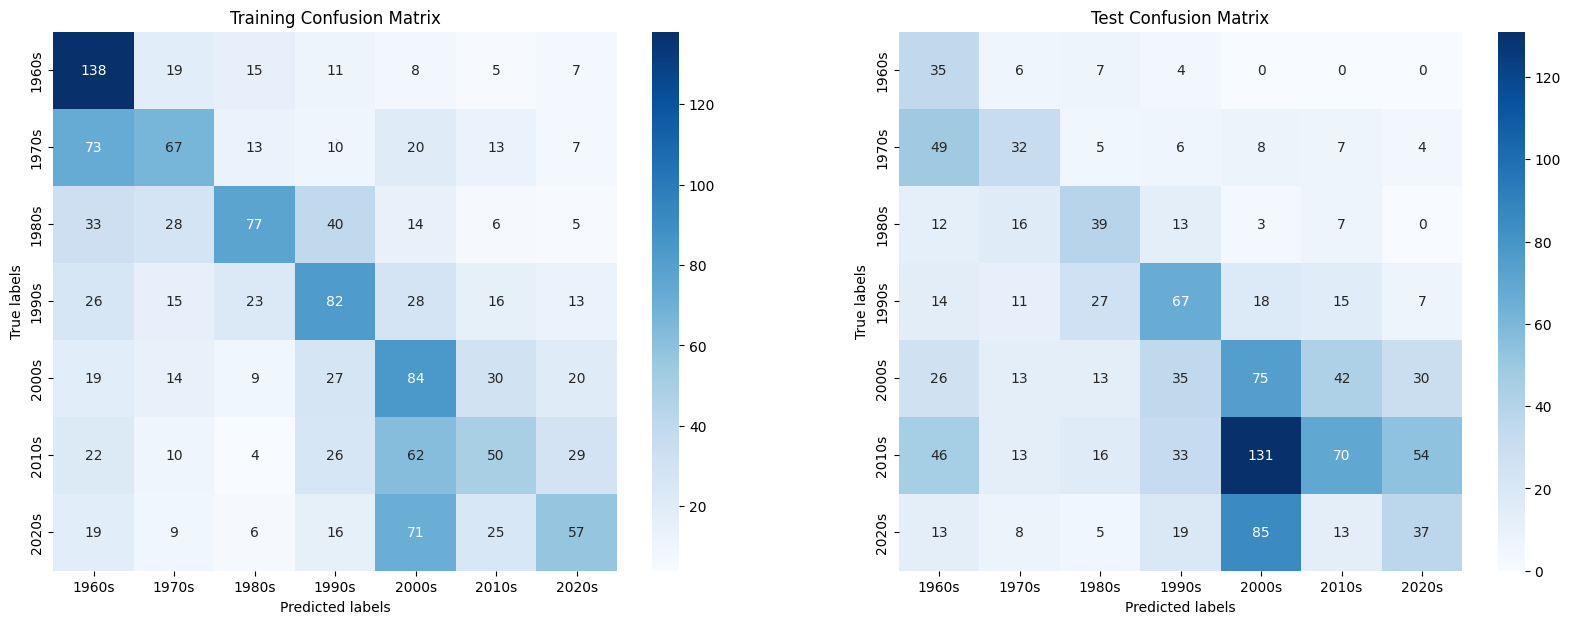

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [17]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [64, 128, 256],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [1, 2, 3],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
Epoch 1/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1431 - loss: 2.7544  
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1520 - loss: 2.7965 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1343 - loss: 2.9008
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1221 - loss: 2.8773
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1713 - loss: 2.0547
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1887 - loss: 2.4938
 1/36 ━━━━━━━━━━━━━━━━━━━━ 24s 712ms/step - accuracy: 0.1250 - loss: 2.9289Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1634 - loss: 2.5760 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1774 - loss: 2.5166
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1580 - loss: 2.5658
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1738 - loss: 2.0001
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accur

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3472 - loss: 1.6927 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2724 - loss: 1.8340 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3401 - loss: 1.6906 
Epoch 46/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3767 - loss: 1.6460 
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3711 - loss: 1.6742 
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3453 - loss: 1.6697 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 50/50
Epoch 1/50
Epoch 1/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4375 - loss: 1.6636Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3646 - loss: 1.6636
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3622 - loss: 1.6649 Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3620 - loss: 1.6656
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3496 - loss: 1.6808
Epoch 49/50
 1/36 ━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1409 - loss: 2.1277   
Epoch 2/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1861 - loss: 2.9431   
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1388 - loss: 3.0679 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1907 - loss: 1.9971 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1374 - loss: 3.0374   
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.1976 - loss: 2.5911
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.1910 - loss: 2.6366
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.1779 - loss: 2.6668
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.2095 - loss: 1.9800
Epoch 4/50
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.2189 - loss: 2.3735
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.2229 - loss: 2.4186
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.4061 - loss: 1.6399
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.3471 - loss: 1.6798
Epoch 1/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.3750 - loss: 1.6298Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2753 - loss: 1.8231
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3658 - loss: 1.6779 
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2871 - loss: 1.8203
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.3750 - loss: 1.687
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3103 - loss: 1.8152 
Epoch 47/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3571 - loss: 1.6865
Epoch 41/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3750 - loss: 1.6565Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3093 - loss: 1.8023 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3475 - loss: 1.6883 
Epoch 42/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 1.5663Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2982 - loss: 1.8305 
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3860 - loss: 1.6553 
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3445 - loss: 1.6893 
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3180 - loss: 1.7819 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.3525 - loss: 1.6968
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3073 - loss: 1.8243 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.3432 - loss: 1.6709
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.4375 - loss: 1.6080
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3709 - loss: 1.6506 
Epoch 47/50
 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3707 - loss: 1.6749 Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2017 - loss: 2.0133   
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3707 - loss: 1.6687
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1244 - loss: 2.0962
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2253 - loss: 1.9759   
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3667 - loss: 1.6594 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1648 - loss: 2.0242
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.1791 - loss: 2.0223
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1549 - loss: 2.0858
Epoch 3/50
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1539 - loss: 3.1021   
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1580 - loss: 3.1096   Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.2098 - loss: 1.9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2956 - loss: 1.8180 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2934 - loss: 1.8588 
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2630 - loss: 1.8821
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2117 - loss: 2.0386 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2833 - loss: 2.0393
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2706 - loss: 1.8515 
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2912 - loss: 1.8186 
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2268 - loss: 1.8870 
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2751 - loss: 1.8528 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2404 - loss: 2.0228 
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2391 - loss: 2.0228 
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1348 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - accuracy: 0.2855 - loss: 1.8341
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2854 - loss: 1.8342
Epoch 44/50
27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3581 - loss: 1.6795 Epoch 1/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3211 - loss: 1.8184
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2863 - loss: 1.8245
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3603 - loss: 1.6737
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3087 - loss: 1.8403
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3013 - loss: 1.8164 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step p - accuracy: 0.2861 - loss: 1.8054 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2993 - loss: 1.7893
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2623 - loss: 1.8507
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3012 - loss: 1.8484 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step racy: 0.3438 - loss: 1.7050
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3199 - loss: 1.7921
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2779 - loss: 1.8135
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2823 - loss: 1.8289
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2821 - loss: 1.8501 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.2500 - loss: 1.8409
 1/36 ━━━━━━━━━━━━━━━━━━━━ 13s 397ms/step - accuracy: 0.1875 - loss: 3.2155

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/36 ━━━━━━━━━━━━━━━━━━━━ 13s 374ms/step - accuracy: 0.1875 - loss: 2.1400Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2965 - loss: 1.8237
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2759 - loss: 1.8239
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1596 - loss: 3.0705   
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1365 - loss: 2.1275   
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2869 - loss: 1.8242
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2701 - loss: 1.8091
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1655 - loss: 2.0808
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1714 - loss: 2.5673 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1849 - loss: 2.0208
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3019 - loss: 1.7936 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2951 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2732 - loss: 1.8678 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2262 - loss: 1.9730 
Epoch 7/50
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2111 - loss: 2.1102
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1468 - loss: 2.1142 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2943 - loss: 1.7983 
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2702 - loss: 1.9116 
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2787 - loss: 1.8433 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2834 - loss: 1.8475 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2299 - loss: 1.9193 
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2518 - loss: 2.0367 
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.2416 - loss: 1.8674
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2122 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3309 - loss: 1.7310 
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.3507 - loss: 1.7417
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.3198 - loss: 1.7541
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.3203 - loss: 1.7539
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.3434 - loss: 1.7342
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.3276 - loss: 1.7542
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.3450 - loss: 1.7192
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.2529 - loss: 1.8387
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.3296 - loss: 1.7331
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.2670 - loss: 1.9014
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.3221 - loss: 1.7425
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - a

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.2511 - loss: 1.8911
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.2350 - loss: 1.8844
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.3608 - loss: 1.6645
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.3089 - loss: 1.8056
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.2654 - loss: 1.8654
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3125 - loss: 1.8497Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.2601 - loss: 1.8908
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2812 - loss: 1.8603Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.3613 - loss: 1.6581
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.2669 - loss: 1.8307
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.2306 - loss: 1.8857
Epoch 49/50
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/stepuracy: 0.2812 - loss: 1.7326
36/36 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.2281 - loss: 1.8939
Epoch 30/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2812 - loss: 1.8695Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.2413 - loss: 1.8694
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.2315 - loss: 1.8848
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step racy: 0.4688 - loss: 1.8686
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.2779 - loss: 1.8723
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.2158 - loss: 1.8889
Epoch 32/50
Epoch 40/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1250 - loss: 1.8538Epoch 1/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2500 - loss: 1.7968Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2269 - loss: 1.8855
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2480 - loss: 1.8583 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.2595 - loss: 1.9426
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2565 - loss: 1.8484
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1875 - loss: 2.0325Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2185 - loss: 2.1699
 1/36 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.2188 - loss: 2.0286Epoch 8/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4375 - loss: 1.8391Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2475 - loss: 1.9613 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.1922 - loss: 2.1259
Epoch 6/50
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1952 - loss: 2.1723
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1796 - loss: 2.0501
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.2904 - loss: 1.8961
Epoch 8/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2188 - loss: 2.0636Epoch 11/50
36/36 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.2978 - loss: 1.8201
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.2896 - loss: 1.8257
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.2096 - loss: 1.9913
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.2270 - loss: 1.9261
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.2995 - loss: 1.7809
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1562 - loss: 1.9083Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.2202 - loss: 1.9325
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.3052 - loss: 1.7697
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.2459 - loss: 1.9671
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.2325 - loss: 1.9096
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3073 - loss: 1.7629 
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2238 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.3326 - loss: 1.7170
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3552 - loss: 1.6559 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2406 - loss: 1.8750 
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3233 - loss: 1.6992
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.3355 - loss: 1.7185
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3228 - loss: 1.7517
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.2420 - loss: 1.8854
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.3361 - loss: 1.7026
Epoch 48/50
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.3621 - loss: 1.6901
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.3040 - loss: 1.7766
Epoch 31/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.3369 - loss: 1.7100
Epoch 50/50
36/36 ━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2400 - loss: 1.8415
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3301 - loss: 1.7191
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3345 - loss: 1.6989
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step racy: 0.3125 - loss: 1.7188
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3230 - loss: 1.7051
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3135 - loss: 1.7083
Epoch 35/50
Epoch 1/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4375 - loss: 1.5552Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3298 - loss: 1.6963
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3306 - loss: 1.6824
Epoch 35/50
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3151 - loss: 1.7213 
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3621 - loss: 1.6923 
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1859 - loss: 2.1266
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1954 - loss: 2.0280 
Epoch 3/50
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2178 - loss: 2.0749 
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2184 - loss: 2.0727 
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1363 - loss: 4.1068
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1981 - loss: 2.1239 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.1855 - loss: 2.0518
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2091 - loss: 1.9930 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.1467 - loss: 3.2811
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2343 - loss: 2.0682 
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2199 - loss: 2.0408
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2318 - loss: 1.8822
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3525 - loss: 1.6708
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3523 - loss: 1.6801
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2541 - loss: 1.8323
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2387 - loss: 1.8511
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4062 - loss: 1.7692Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3297 - loss: 1.7253
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2459 - loss: 1.8632
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2441 - loss: 1.8683
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3437 - loss: 1.7061
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3497 - loss: 1.6698 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2808 - loss: 1.8512
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3720 - loss: 1.6528
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2582 - loss: 1.8681
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3897 - loss: 1.6873
Epoch 36/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3750 - loss: 1.6517Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3563 - loss: 1.6607
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2448 - loss: 1.8626 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3467 - loss: 1.6938
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3626 - loss: 1.6489  
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2220 - loss: 1.8814
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1801 - loss: 2.1845
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3193 - loss: 1.7115
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2017 - loss: 2.1097
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.2546 - loss: 1.9558
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2112 - loss: 3.5058 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1490 - loss: 2.7111
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1250 - loss: 2.8817Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3376 - loss: 1.6849 
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3765 - loss: 1.6677
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.2407 - loss: 1.9525
Epoch 7/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.1900 - loss: 2.7484
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2093 - loss: 2.0633 
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.2926 - loss: 1.9108
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.3468 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.2958 - loss: 1.8097
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2974 - loss: 1.7837 
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2260 - loss: 1.9317
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2084 - loss: 2.0350 
Epoch 9/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.3061 - loss: 1.8077
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.3288 - loss: 1.7706
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2357 - loss: 1.9113 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.2812 - loss: 1.8947Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2251 - loss: 2.0050
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3297 - loss: 1.7762 
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3166 - loss: 1.7766 
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.239

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3232 - loss: 1.7624 
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2276 - loss: 1.9087 
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2502 - loss: 1.8582
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2287 - loss: 1.8644
Epoch 37/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2487 - loss: 1.8776 
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2211 - loss: 1.8573 
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2200 - loss: 1.9212  
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2534 - loss: 1.8646
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3186 - loss: 1.7907  
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2325 - loss: 1.9005
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2341 - loss: 1.8658
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accur

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2495 - loss: 1.8786
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2304 - loss: 1.8651
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2390 - loss: 1.8865
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3050 - loss: 1.7281 
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2455 - loss: 1.8512 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2419 - loss: 1.8555 
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2300 - loss: 1.8731 
Epoch 27/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2188 - loss: 1.9177Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3314 - loss: 1.7279
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2328 - loss: 1.8672 
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2530 - loss: 1.8548
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
36/36 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2469 - loss: 1.8701
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3433 - loss: 1.7011
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1629 - loss: 2.3280   
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2672 - loss: 1.9401
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1838 - loss: 2.1636
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2641 - loss: 1.8403
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3502 - loss: 1.7109
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2393 - loss: 1.8687
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2701 - loss: 1.8958
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2499 - loss: 1.8481
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3733 - loss: 1.6828
Epoch 43/50
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2403 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2201 - loss: 1.8545 
Epoch 46/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1875 - loss: 1.8438Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2898 - loss: 1.8263
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3453 - loss: 1.7464 
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3135 - loss: 1.8063
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2455 - loss: 1.8538 
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3029 - loss: 1.7993
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1542 - loss: 3.9223 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2864 - loss: 1.8311
Epoch 2/50
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2326 - loss: 1.8667 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2843 - loss: 1.8176 
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1525 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3033 - loss: 1.8181
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3507 - loss: 1.6554
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3750 - loss: 1.6603Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3214 - loss: 1.7520
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3031 - loss: 1.7649
Epoch 19/50
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3645 - loss: 1.7087 
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1917 - loss: 2.1610
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3445 - loss: 1.7233
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3189 - loss: 1.7843
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3515 - loss: 1.6708
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3507 - loss: 1.7047 
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3493 - loss: 1.7626
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3671 - loss: 1.6966
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1915 - loss: 1.9958
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3426 - loss: 1.7240
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3318 - loss: 1.7711
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3428 - loss: 1.7198
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2232 - loss: 1.9594 
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3250 - loss: 1.7665 
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3448 - loss: 1.7569
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3350 - loss: 1.7499
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1562 - loss: 2.0346Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1405 - loss: 3.9328
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4062 - loss: 1.7617Epoch 2/50
36/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3566 - loss: 1.6631
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1424 - loss: 1.9493
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3699 - loss: 1.6279 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1575 - loss: 1.9878 
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.1520 - loss: 1.9491
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 1.8676
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1661 - loss: 1.9609
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3752 - loss: 1.6835
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3550 - loss: 1.6943 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1875 - loss: 1.9484Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1676 - loss: 1.9786 
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3687 - loss: 1.653

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3828 - loss: 1.6552
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1488 - loss: 1.9569
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1481 - loss: 1.9511
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1361 - loss: 1.9480
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step p - accuracy: 0.3697 - loss: 1.6808
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1559 - loss: 1.9529
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1575 - loss: 1.9496
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3632 - loss: 1.6671
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1540 - loss: 1.9477
Epoch 41/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1250 - loss: 1.9383Epoch 1/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 1.9491

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1719 - loss: 1.9483   
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1751 - loss: 1.9529
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1285 - loss: 1.9475
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3804 - loss: 1.6361
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1532 - loss: 1.9495
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1798 - loss: 1.9518 
26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1495 - loss: 1.9467 Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1483 - loss: 1.9469
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step racy: 0.0938 - loss: 1.947
26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1675 - loss: 1.9522 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1498 - loss: 1.9495
30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1409 - loss: 1.9471 Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1666 - loss: 1.9522
Epoch 30/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1407 - loss: 1.9472
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1441 - loss: 3.8911  
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1279 - loss: 1.9472 Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1713 - loss: 1.9478
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1281 - loss: 1.9472
Epoch 32/50
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1647 - loss: 1.9513
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1896 - loss: 3.2392
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1154 - loss: 1.9470
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1709 - loss: 1.9480
36/36

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.3071 - loss: 1.8535
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.2071 - loss: 2.0698
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1528 - loss: 1.9491 
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.2880 - loss: 1.8611
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1720 - loss: 1.9925 
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1729 - loss: 1.9473 
Epoch 43/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1562 - loss: 2.0780Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.2785 - loss: 1.8760
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.1646 - loss: 1.9480
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.2822 - loss: 1.8349
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.1796 - loss: 2.0473
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2969 - loss: 1.8050 
22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2843 - loss: 1.8888 Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3479 - loss: 1.7378
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2814 - loss: 1.8767 
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1428 - loss: 1.9512
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2653 - loss: 1.9083
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3527 - loss: 1.7375 
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3062 - loss: 1.7837
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1625 - loss: 1.9503
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2806 - loss: 1.8139
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2786 - loss: 1.8818 
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3240 - loss: 1.7367


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2315 - loss: 1.9383 
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3196 - loss: 1.7263
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1307 - loss: 1.9463
Epoch 35/50
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3198 - loss: 1.8027 
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3493 - loss: 1.6841 
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1338 - loss: 1.9658
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3566 - loss: 1.6862
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1426 - loss: 1.9460
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3311 - loss: 1.7383
Epoch 50/50
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2214 - loss: 1.9180
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3275 - loss: 1.7127 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3019 - loss: 1.7980 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2376 - loss: 1.8944
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3505 - loss: 1.6734
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3309 - loss: 1.7140
Epoch 47/50
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3117 - loss: 1.7923
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1225 - loss: 1.9520
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2312 - loss: 1.9137
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3269 - loss: 1.7086
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3647 - loss: 1.6911
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3031 - loss: 1.7920 
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1522 - loss: 1.9511
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3438 - loss: 1.6867 
17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3162 - loss: 1.7065 Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3280 - loss: 1.7156 
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3426 - loss: 1.7085
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2142 - loss: 1.8895
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1262 - loss: 1.9477
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1709 - loss: 2.5593
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1589 - loss: 5.1630
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2188 - loss: 1.8727Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1328 - loss: 5.2176 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.1548 - loss: 3.8438
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3210 - loss: 1.7466
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2412 - loss: 1.8919 Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1508 - loss: 1.9474
Epoch 27/50
36/3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1541 - loss: 1.9463
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1693 - loss: 1.9736
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.1621 - loss: 2.0307
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.3179 - loss: 1.7119
Epoch 44/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2812 - loss: 1.8367Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1694 - loss: 1.9776 
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.1519 - loss: 2.0029
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1909 - loss: 1.9616 
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1329 - loss: 1.9463 
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3301 - loss: 1.7205 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1875 - loss: 1.9821Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2293 - loss: 1.9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2401 - loss: 1.8669
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1738 - loss: 1.9506  
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1597 - loss: 1.9498
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1562 - loss: 1.9517Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1634 - loss: 1.9489
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1446 - loss: 1.9460 
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2371 - loss: 1.8864
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1605 - loss: 1.9490
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1655 - loss: 1.9505
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1694 - loss: 1.9443 
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1466 - loss: 2.2872
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1245 - loss: 1.9460
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2587 - loss: 1.8855
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1675 - loss: 2.1998
Epoch 9/50
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2650 - loss: 1.9389 
Epoch 7/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1875 - loss: 1.9675Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1268 - loss: 1.9466
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2872 - loss: 1.8740
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2585 - loss: 1.9178 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1487 - loss: 1.9478
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1578 - loss: 1.9460  
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2732 - loss: 1.8497
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1216 - loss: 1.9465
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1649 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3284 - loss: 1.8582
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1542 - loss: 1.9470
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1563 - loss: 1.9458 
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2486 - loss: 1.9793
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3118 - loss: 1.8188
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1714 - loss: 1.9442
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3077 - loss: 1.8341
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1255 - loss: 1.9461 
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1394 - loss: 1.9499
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2694 - loss: 1.9097 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1646 - loss: 1.9472
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3267 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2988 - loss: 1.7956 
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3086 - loss: 1.8273 
Epoch 16/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3438 - loss: 1.8651Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3198 - loss: 1.7632 
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3346 - loss: 1.6991
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3200 - loss: 1.8314
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3096 - loss: 1.7966
Epoch 17/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3125 - loss: 1.8467Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step racy: 0.3438 - loss: 1.8352
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3429 - loss: 1.7402 
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3297 - loss: 1.7604
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3175 - loss: 1.7372
Epoch 35/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3419 - loss: 1.7234
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3419 - loss: 1.7240
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1596 - loss: 2.4264
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1644 - loss: 2.3644
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1778 - loss: 2.0974
Epoch 5/50
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3472 - loss: 1.7169
Epoch 34/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.1875 - loss: 2.2210Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3692 - loss: 1.6582 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3531 - loss: 1.6905 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3517 - loss: 1.7331 
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.3618 - loss: 1.6927
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1441 - loss: 1.9647 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1604 - loss: 1.9584
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3342 - loss: 1.7243
30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1055 - loss: 1.9509Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1421 - loss: 1.9656
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3455 - loss: 1.7279
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1073 - loss: 1.9509
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3580 - loss: 1.6913
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3701 - loss: 1.6843
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3626 - loss: 1.6902
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1612 - loss: 1.9539
Epoch 47/50
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1506 - loss: 1.9591
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 23/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1619 - loss: 1.9482 
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1538 - loss: 1.9462
Epoch 23/50
26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1629 - loss: 1.9459Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1653 - loss: 2.8551
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1581 - loss: 1.9460
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1432 - loss: 1.9462
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1441 - loss: 1.9460
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1611 - loss: 2.3330
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1474 - loss: 1.9481 
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1306 - loss: 1.94611
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1395 - loss: 1.9461 
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1441 - loss: 1.9462
Epoch 32/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3438 - loss: 1.7274Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1651 - loss: 1.9442
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/stepp - accuracy: 0.3125 - loss: 1.76
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3126 - loss: 1.7689 
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2824 - loss: 1.8132
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1512 - loss: 1.9459 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3517 - loss: 1.7139
Epoch 29/50
28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1787 - loss: 1.9465

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1746 - loss: 1.9471
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3167 - loss: 1.7912 
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3157 - loss: 1.7694
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step p - accuracy: 0.3497 - loss: 1.696
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3478 - loss: 1.6993
Epoch 30/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 13s 385ms/step - accuracy: 0.1250 - loss: 1.9469

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1544 - loss: 1.9458
Epoch 34/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1322 - loss: 1.9464  
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3322 - loss: 1.7761
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3314 - loss: 1.7324
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1382 - loss: 1.9463
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3109 - loss: 1.8001
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1471 - loss: 1.9462
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1392 - loss: 1.9459
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3002 - loss: 1.8027
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3657 - loss: 1.6868
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1485 - loss: 1.9461
Epoch 32/50
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2330 - loss: 1.9552
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2998 - loss: 1.8479Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1550 - loss: 1.9461
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2989 - loss: 1.8452
17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3571 - loss: 1.6595Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3322 - loss: 1.6639
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.2655 - loss: 1.9336
Epoch 19/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3054 - loss: 1.8349
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3508 - loss: 1.6756 
Epoch 41/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2812 - loss: 1.7863Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.2545 - loss: 1.9259
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/stepp - accuracy: 0.2755 - loss: 1.7562
36/36 ━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3608 - loss: 1.6558
Epoch 42/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2188 - loss: 1.9476Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3082 - loss: 1.8006
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3034 - loss: 1.8143
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.2650 - loss: 1.9136
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.2684 - loss: 1.9156
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3656 - loss: 1.7099  
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3434 - loss: 1.6942
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2508 - loss: 1.8993 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3438 - loss: 1.6912Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3045 - loss: 1.8020
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3038 - loss: 1.782

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.1633 - loss: 2.3900
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2064 - loss: 2.1169 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2500 - loss: 1.8510Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2784 - loss: 1.8715
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3446 - loss: 1.7227
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.0938 - loss: 2.1074Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3841 - loss: 1.6331
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1852 - loss: 2.0881 
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1832 - loss: 2.5101
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3161 - loss: 1.7379
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.1864 - loss: 2.2864
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.2158 - loss: 2.2079
Epoch 6/50
36/36 ━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2268 - loss: 2.0186
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2527 - loss: 2.0686
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1719 - loss: 2.1006 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3215 - loss: 1.7035 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2643 - loss: 1.8418 
Epoch 31/50
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3293 - loss: 1.7191
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2665 - loss: 1.9835 
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2865 - loss: 1.8116 
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2076 - loss: 2.0654
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2520 - loss: 2.0333 
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3343 - loss: 1.7055
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.2275 - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.2453 - loss: 1.9228
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2476 - loss: 1.9172
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3369 - loss: 1.6942
 1/36 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.3750 - loss: 1.9236Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.2485 - loss: 1.9217
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.2482 - loss: 1.9062
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3420 - loss: 1.7151
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1488 - loss: 2.4172
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1491 - loss: 2.0124
Epoch 4/50
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.2749 - loss: 1.9045
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3074 - loss: 1.9029
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.2920 - loss: 1.8

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.2500 - loss: 1.8971Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.2893 - loss: 1.7699
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2894 - loss: 1.8198 
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.2667 - loss: 1.8376
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.2922 - loss: 1.7609
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.2757 - loss: 1.8587
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.2911 - loss: 1.8394
Epoch 29/50
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.3152 - loss: 1.7350
 1/36 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.2812 - loss: 1.7330Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.2793 - loss: 1.8091
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.2827 - loss: 1.8083
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1875 - loss: 1.911

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3092 - loss: 1.7491 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2988 - loss: 1.8541 
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3099 - loss: 1.7446
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3161 - loss: 1.7774
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.2643 - loss: 1.8505
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.3280 - loss: 1.7123
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.3047 - loss: 1.7556
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.3100 - loss: 1.8202
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.3177 - loss: 1.7511
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.3106 - loss: 1.7211
Epoch 39/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3125 - loss: 1.7943Epoch 1/50
36/36 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.2717 - loss: 1.8457
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3091 - loss: 1.7501
Epoch 39/50
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.3234 - loss: 1.7257
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2948 - loss: 1.8366 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3217 - loss: 1.7186
Epoch 42/50
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3188 - loss: 1.7490
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.2776 - loss: 1.8341
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.3449 - loss: 1.7219
Epoch 41/50
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.3456 - loss: 1.7310
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.3282 - loss: 1.7181
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.3101 - loss: 1.7588
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accurac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.2706 - loss: 1.8339
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.3445 - loss: 1.7109
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.2919 - loss: 1.8297
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.2511 - loss: 2.0453
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.2678 - loss: 1.8869
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.3468 - loss: 1.7036
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2184 - loss: 2.1739
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.2677 - loss: 1.8229
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2634 - loss: 1.8094 
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.2726 - loss: 2.0277
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.2716 - loss: 1.8923
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/stepracy: 0.218

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2881 - loss: 1.7868 
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.2640 - loss: 1.8155
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.2690 - loss: 1.8734
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.3437 - loss: 1.7114
Epoch 46/50
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.2248 - loss: 2.0604
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3048 - loss: 1.8155 
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2527 - loss: 2.0035
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.2597 - loss: 1.8106
Epoch 21/50
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.2847 - loss: 1.8484
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.3094 - loss: 1.7243
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2368 - loss: 2.0329 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.3050 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2756 - loss: 1.9348 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3750 - loss: 1.6931Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3079 - loss: 1.7336 
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2902 - loss: 1.7752 
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2681 - loss: 1.9063 
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1553 - loss: 2.9919   
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2635 - loss: 1.9258 
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.2949 - loss: 1.7811
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3133 - loss: 1.7183 
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2344 - loss: 1.9374
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2564 - loss: 1.9053
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.32

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.2688 - loss: 1.9049
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3106 - loss: 1.8130 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1562 - loss: 2.0155Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.2924 - loss: 1.8645
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2958 - loss: 1.8290 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.3310 - loss: 1.6999
Epoch 43/50
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2148 - loss: 2.1443
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.2659 - loss: 1.8900
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.3178 - loss: 1.7938
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.2795 - loss: 1.8324
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.2261 - loss: 2.1118
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.3125 - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3356 - loss: 1.7895
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2757 - loss: 1.9915 Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2722 - loss: 1.9927
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2660 - loss: 1.8588
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3117 - loss: 1.8295
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2560 - loss: 1.8785 
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2369 - loss: 1.9976 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3103 - loss: 1.8236 
Epoch 15/50
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2987 - loss: 1.7974 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3150 - loss: 1.8561 
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2845 - loss: 1.8368
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3001 - loss: 1.8255

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2919 - loss: 1.8473 
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2423 - loss: 1.9573
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.2818 - loss: 1.8398
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2812 - loss: 1.9002Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step curacy: 0.1250 - loss: 2.334 2.0372 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2638 - loss: 1.8757
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1484 - loss: 2.0359 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2021 - loss: 2.0102
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2623 - loss: 1.9470 
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2908 - loss: 1.8578 
26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1712 - loss: 2.1852   Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.2802 - loss: 1.8284
Epoch 36/50
36/36 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.2777 - loss: 1.8576
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.2956 - loss: 1.8558
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3009 - loss: 1.8029  
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3034 - loss: 1.7788 
Epoch 18/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2812 - loss: 1.8587Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.3088 - loss: 1.7690
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.1410 - loss: 2.1283 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.2936 - loss: 1.8106
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3522 - loss: 1.7320 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2835 - loss: 1.8671
Epoch 21/50
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step racy: 0.2812 - loss: 1.834
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2727 - loss: 1.8586


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1623 - loss: 2.6344 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1892 - loss: 2.5900 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3349 - loss: 1.7172 
23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3063 - loss: 1.8013 Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.3382 - loss: 1.6953
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.3321 - loss: 1.7534
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3049 - loss: 1.8004
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3369 - loss: 1.7093
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.2076 - loss: 2.3684
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.3198 - loss: 1.7155
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.3289 - loss: 1.6914
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.3542 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step p - accuracy: 0.3155 - loss: 1.7007
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3326 - loss: 1.6884
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.2778 - loss: 1.8941
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.2502 - loss: 1.8932
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.3410 - loss: 1.7312
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3125 - loss: 1.8091Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2958 - loss: 1.8361 
Epoch 27/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2690 - loss: 1.8592
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2423 - loss: 1.9493
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3347 - loss: 1.7025
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2902 - loss: 1.8484 
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.2842 - loss: 1.8518
Epoch 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2961 - loss: 1.8335
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2818 - loss: 1.8449
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3208 - loss: 1.6973
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2379 - loss: 1.9442
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3093 - loss: 1.8305
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3559 - loss: 1.6979
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2652 - loss: 1.9367
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2787 - loss: 1.8504
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2534 - loss: 1.9465 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3395 - loss: 1.6854 
Epoch 18/50
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2729 - loss: 1.8647
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3169 - los

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3037 - loss: 1.8267
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2773 - loss: 1.8683 
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2169 - loss: 2.0684 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3029 - loss: 1.8158
Epoch 8/50
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2789 - loss: 1.8731
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2542 - loss: 2.0119
26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2353 - loss: 1.8946 Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.2740 - loss: 1.8639
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2409 - loss: 1.8893
Epoch 28/50
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.2792 - loss: 1.8369
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.2705 - loss: 1.8646
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.3049 - loss: 1.7978

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3429 - loss: 1.7290 
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2754 - loss: 1.8891 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3522 - loss: 1.7348 
Epoch 23/50
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2155 - loss: 1.9728
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2895 - loss: 1.8215 
Epoch 45/50
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2533 - loss: 1.8948 
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.2675 - loss: 1.8707
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.2816 - loss: 1.8358
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.3516 - loss: 1.7085
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3354 - loss: 1.7487 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2807 - loss: 1.9227 
Epoch 24/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2188 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.3190 - loss: 1.7185
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.2868 - loss: 1.8317
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.3262 - loss: 1.7283
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.2522 - loss: 1.8738
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.3318 - loss: 1.6954
Epoch 33/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3729 - loss: 1.6617 
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3004 - loss: 1.8269
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2618 - loss: 1.8612 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2653 - loss: 1.8670
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3743 - loss: 1.6773
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.2674 - loss: 1.8466
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3300 - loss: 1.7035
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3088 - loss: 1.7683 
Epoch 18/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/stepEpoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step p - accuracy: 0.3222 - loss: 1.7530 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.2812 - loss: 1.8454Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/stepep - accuracy: 0.3173 - loss: 1.761
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3406 - loss: 1.6971 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3133 - loss: 1.7648
Epoch 18/50
Epoch 1/50
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1779 - loss: 2.4572Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1788 - loss: 2.4506
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3216 - loss: 1.7796
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3354 - loss: 1.7309 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1801 - loss: 2.0303
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.2177 - loss: 2.1095
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.2257 - loss: 1.9097
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.3410 - loss: 1.6896
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3366 - loss: 1.7032
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3125 - loss: 1.5749Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1938 - loss: 2.0236
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.2098 - loss: 2.0831
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.2281 - loss: 1.9202
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.3844 - loss: 1.6429
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2007 - loss: 2.0116 
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.2599 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2552 - loss: 1.8599
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2192 - loss: 1.9268
Epoch 31/50
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2382 - loss: 1.9068
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2329 - loss: 1.9037
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 1.8703
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.2267 - loss: 1.8741
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2284 - loss: 1.9062 
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2174 - loss: 1.9213 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2213 - loss: 1.9090 
Epoch 27/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2812 - loss: 1.7826Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2003 - loss: 1.9238
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.2190 - loss: 1.8858
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.2604 - loss: 1.8519
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2515 - loss: 1.8958 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2639 - loss: 1.8593
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2320 - loss: 1.8637
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2390 - loss: 1.8853
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1706 - loss: 2.0652 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2342 - loss: 1.8697
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2239 - loss: 1.8625
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2385 - loss: 1.8876 Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2463 - loss: 1.8429
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2448 - loss: 1.8898

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2727 - loss: 1.9056 
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2495 - loss: 1.8360 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2281 - loss: 1.8871 
Epoch 48/50
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2334 - loss: 1.8783
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2618 - loss: 1.8613
Epoch 37/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2188 - loss: 1.9697Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1646 - loss: 2.1482
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2776 - loss: 1.9019 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.2510 - loss: 1.8791
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.2594 - loss: 1.8603
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.2349 - loss: 1.8783
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2456

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.2118 - loss: 1.8811
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.2051 - loss: 1.9795
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.2897 - loss: 1.8490
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2424 - loss: 1.8760 
12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2524 - loss: 1.8612 Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2964 - loss: 1.8203
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2386 - loss: 1.9471
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2401 - loss: 1.8678
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2518 - loss: 1.8639
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2447 - loss: 1.8503
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2659 - loss: 1.8352
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2515 - loss: 1.9071 Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/36 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.2812 - loss: 1.8607Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3016 - loss: 1.7957
Epoch 23/50
30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2279 - loss: 1.8731  Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2307 - loss: 1.8723
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2791 - loss: 1.8405
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2813 - loss: 1.8022 
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2178 - loss: 1.8606
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3323 - loss: 1.7853
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2637 - loss: 1.8567
Epoch 24/50
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3024 - loss: 1.8201
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.2899 - loss: 1.8071
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2758 - loss: 1.8242 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2842 - loss: 1.8175
Epoch 15/50
16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3514 - loss: 1.7792 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3031 - loss: 1.7984
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3455 - loss: 1.7693
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2739 - loss: 1.8200
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1422 - loss: 2.1052
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2825 - loss: 1.8047
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.3536 - loss: 1.7523
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.3290 - loss: 1.7695
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1783 - loss: 2.0538 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2943 - loss: 1.8169 
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3182 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.3502 - loss: 1.6694
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2950 - loss: 1.8192
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2118 - loss: 2.1336
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3111 - loss: 1.7555 
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1768 - loss: 2.1822 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.3268 - loss: 1.7354
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.1806 - loss: 2.1265
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2091 - loss: 2.0611
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3463 - loss: 1.7082
Epoch 11/50
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3010 - loss: 1.7944 
Epoch 20/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.3192 - loss: 1.6974
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2499 - loss: 2.0370
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 1.9934
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2061 - loss: 1.9900
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3050 - loss: 1.7599
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2216 - loss: 2.0130
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2505 - loss: 1.9762 
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3359 - loss: 1.6894
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3007 - loss: 1.7544
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2377 - loss: 1.9548 
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2051 - loss: 2.0348 
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3134 - loss: 1.7432
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2205 - loss: 1.9428
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3517 - loss: 1.7194 
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2132 - loss: 1.8975
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.2571 - loss: 1.8986
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2203 - loss: 1.8959
Epoch 22/50
11/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1429 - loss: 4.3524Epoch 23/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2500 - loss: 1.8884Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3368 - loss: 1.7010
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2134 - loss: 1.9076 
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1356 - loss: 4.1406
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2090 - loss: 1.9245
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2288 - loss: 1.9312
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2377 - loss: 1.8889
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3176 - loss: 1.7272 
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1969 - loss: 2.1666 
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2518 - loss: 1.8804 
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2343 - loss: 2.1209
22/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2465 - loss: 1.8927 Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2113 - loss: 1.9069
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2423 - loss: 1.8912
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3327 - loss: 1.6954
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2444 - loss: 1.8724
Epoch 44/50
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2306 - loss: 2.0798 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2257 - loss: 1.8879 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2363 - loss: 1.8584
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2369 - loss: 1.8531 
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2390 - loss: 1.8548
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2054 - loss: 2.0772
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2327 - loss: 1.9266
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2190 - loss: 1.8793
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2236 - loss: 1.8637 
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2215 - loss: 2.0490
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2467 - loss: 1.8596
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2397 - loss: 1.9334
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2139 - loss: 1.8740
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2145 - los

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2195 - loss: 2.0483
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2807 - loss: 1.8818
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2344 - loss: 1.8658
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2309 - loss: 1.8979
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step racy: 0.1250 - loss: 2.010
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/stepracy: 0.1250 - loss: 1.888
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2330 - loss: 1.8950 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2345 - loss: 1.8908
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2492 - loss: 2.0037 
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3042 - loss: 1.8754
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2127 - loss: 1.9127
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2667 - loss: 1.9566 
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3312 - loss: 1.7081 
27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2707 - loss: 1.8513 Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.3097 - loss: 1.7457
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2375 - loss: 1.9795 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2713 - loss: 1.8519
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2278 - loss: 1.8620
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3167 - loss: 1.7669 
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3161 - loss: 1.8173
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3750 - loss: 1.7964Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3338 - loss: 1.7272 
13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2594 - loss: 1.8280 Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2932 - loss: 1.8379 
Epoch 15/50
36/36 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3460 - loss: 1.7132 
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3299 - loss: 1.7745 
Epoch 23/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.2812 - loss: 1.7079Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2397 - loss: 1.9263
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3463 - loss: 1.7007
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3352 - loss: 1.7159
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.3117 - loss: 1.7658
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3514 - loss: 1.7579 
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.3610 - loss: 1.7089
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2500 - loss: 1.6260Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3349 - loss: 1.7570 
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2133 - loss: 1.91

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3484 - loss: 1.6880
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3261 - loss: 1.7675
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1321 - loss: 5.2623
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3416 - loss: 1.7128
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3983 - loss: 1.6202
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3318 - loss: 1.7537 
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3571 - loss: 1.7146
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3686 - loss: 1.6326 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3231 - loss: 1.7042
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1746 - loss: 3.6242
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1620 - loss: 5.2748
Epoch 3/50
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2196 - loss: 1.8757
 1/36

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2055 - loss: 2.3045
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2954 - loss: 1.7602 
Epoch 38/50
12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2111 - loss: 2.2800 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3568 - loss: 1.7095 
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3584 - loss: 1.6976
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3389 - loss: 1.7110
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1874 - loss: 2.2623
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2441 - loss: 1.8715
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2035 - loss: 2.19613
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3531 - loss: 1.7002
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3589 - loss: 1.6869
Epoch 42/50
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2442 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2352 - loss: 1.8828
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2187 - loss: 1.9829
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3516 - loss: 1.6924 
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.6701
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2376 - loss: 1.9717
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2317 - loss: 1.8792
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2198 - loss: 1.9641
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3587 - loss: 1.6623 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3282 - loss: 1.6733
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3327 - loss: 1.7149 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2273 - loss: 1.9635
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2166 - loss: 1.8735Epoch 13/50
36

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2262 - loss: 2.1903 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/stepep - accuracy: 0.2544 - loss: 1.9295 
 6/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2092 - loss: 2.8732 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2237 - loss: 1.8665
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2064 - loss: 1.9221 
Epoch 1/50
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2364 - loss: 1.9196
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1778 - loss: 2.7683 
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2398 - loss: 1.9096
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1647 - loss: 2.1115
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1944 - loss: 2.4038 
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2454 - loss: 1.8742
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2319 - loss: 1.9191
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1845 - loss: 2.0512
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1740 - loss: 2.2361
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2856 - loss: 1.9275
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2409 - loss: 1.9490
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2318 - loss: 1.9062
13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1185 - loss: 2.3832 Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2880 - loss: 1.9221 
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2543 - loss: 1.8642
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1281 - loss: 2.3356
Epoch 28/50
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2229 - loss: 1.8732
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2269 - loss: 1.9092 
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1736 - loss: 2.1795 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2218 - loss: 1.9227
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2840 - loss: 1.8819 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2414 - loss: 1.8654
Epoch 41/50
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3465 - loss: 1.7065Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3471 - loss: 1.7085
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3699 - loss: 1.7096
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2399 - loss: 1.8458
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3361 - loss: 1.7674
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2948 - loss: 1.7485
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2197 - loss: 1.8683
30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3539 - loss: 1.6896 Epoch 42/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3526 - loss: 1.6946
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3452 - loss: 1.7536
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1595 - loss: 2.1930 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1636 - loss: 2.1886
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3541 - loss: 1.6690 
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4043 - loss: 1.6534
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.2321 - loss: 2.1081
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3234 - loss: 1.7185 
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3401 - loss: 1.6874
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3648 - loss: 1.6618
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2145 - loss: 2.0545
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3330 - loss: 1.7080
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3382 - loss: 1.7321
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1476 - loss: 2.2048
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3067 - loss: 1.8610
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3464 - loss: 1.6862
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3462 - loss: 1.7049
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1742 - loss: 2.1381 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3605 - loss: 1.6368  Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3603 - loss: 1.6372
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2966 - loss: 1.8428 
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3254 - loss: 1.7017
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3429 - loss: 1.6710 
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3885 - loss: 1.6423
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1660 - loss: 2.0946
36

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3484 - loss: 1.6733
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1795 - loss: 1.9908
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3031 - loss: 1.7722
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3721 - loss: 1.6430
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3750 - loss: 1.6987Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3478 - loss: 1.6713
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1365 - loss: 1.9820
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3810 - loss: 1.6483
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3594 - loss: 1.7405
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1489 - loss: 1.9783 
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1356 - loss: 3.9183 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1278 - loss: 1.9729 
Epoch 18/50
36

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1820 - loss: 2.5687 
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1380 - loss: 1.9612
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1977 - loss: 2.6665 
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1788 - loss: 2.3716 
15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3352 - loss: 1.7430  Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3313 - loss: 1.7540 
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3593 - loss: 1.6785
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1650 - loss: 2.4683
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1658 - loss: 1.9578
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.1664 - loss: 2.2392
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1486 - loss: 1.9567 
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3595 - loss: 1.6595
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1495 - loss: 2.0260
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1413 - loss: 1.9521 
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1800 - loss: 2.1217 
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1653 - loss: 2.9339
Epoch 4/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1538 - loss: 2.0067
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1443 - loss: 1.9509
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1663 - loss: 2.0829
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1354 - loss: 2.6561
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3222 - loss: 1.7453
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1599 - loss: 1.9911
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1574 - loss: 2.0551
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1575 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1462 - loss: 1.9525 
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3180 - loss: 1.7905
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1589 - loss: 1.9515
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1298 - loss: 1.9469
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.2759 - loss: 1.8729
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1600 - loss: 1.9494
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3325 - loss: 1.6539
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.1482 - loss: 1.9468
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.2873 - loss: 1.8098
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2548 - loss: 1.8517 
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1531 - loss: 1.9507
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1743

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1331 - loss: 1.9467
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1631 - loss: 1.9476 
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2795 - loss: 1.8297 
Epoch 18/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1829 - loss: 1.9486
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2927 - loss: 1.7797
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1566 - loss: 1.9462
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1880 - loss: 1.9422 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1604 - loss: 1.9508
Epoch 42/50
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1237 - loss: 1.9490
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.1337 - loss: 1.9463
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2800 - loss: 1.8133 
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accur

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1890 - loss: 1.9482 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3370 - loss: 1.7304
Epoch 31/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3150 - loss: 1.7285
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/stepuracy: 0.2812 - loss: 1.7825
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1539 - loss: 1.9465
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3075 - loss: 1.7661
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3188 - loss: 1.7561
Epoch 40/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/stepuracy: 0.3438 - loss: 1.741s: 1.9464 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1493 - loss: 1.9466
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3059 - loss: 1.7842 
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3537 - loss: 1.7330 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1420 - loss: 2.1701
Epoch 2/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1833 - loss: 2.0960
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3237 - loss: 1.7758
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3227 - loss: 1.7487
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.1268 - loss: 1.9463
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1718 - loss: 2.0838
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3438 - loss: 1.8073Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.3145 - loss: 1.7583
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1889 - loss: 2.0760 
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3432 - loss: 1.7138 
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1348 - loss: 1.9467 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.3511 - loss: 1.6973
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.1669 - loss: 2.0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2626 - loss: 1.8648
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3186 - loss: 1.7368
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3047 - loss: 1.7291
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2273 - loss: 1.9655
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2581 - loss: 1.8748 
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3300 - loss: 1.6951
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2475 - loss: 1.9262
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3649 - loss: 1.6675
Epoch 12/50
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.2455 - loss: 1.9147
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3226 - loss: 1.6972 
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2627 - loss: 1.8754
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3544 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2857 - loss: 1.8375 
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.2695 - loss: 1.8685
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.3333 - loss: 1.7062
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.2753 - loss: 1.8426
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2888 - loss: 1.8468 
Epoch 17/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5000 - loss: 1.5746Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.2561 - loss: 1.8303
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.2784 - loss: 1.8529
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.3610 - loss: 1.6725
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 644us/step - accuracy: 0.1511 - loss: 2.1760
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2981 - loss: 1.8147 
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1639 - loss: 2.3855
Epoch 6/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2022 - loss: 2.0051 
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2788 - loss: 1.8053
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2867 - loss: 1.8056 
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1638 - loss: 2.2352 
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1471 - loss: 3.8988
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2824 - loss: 1.8038
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1712 - loss: 3.1208 
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2107 - loss: 1.9870 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1595 - loss: 2.1422
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1579 - loss: 2.6687
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2882

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1531 - loss: 1.9472
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1626 - loss: 2.2088
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3393 - loss: 1.6968 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1536 - loss: 1.9505
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.3475 - loss: 1.7409
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1744 - loss: 1.9682
Epoch 21/50
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1480 - loss: 1.9484
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1744 - loss: 2.1235 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1498 - loss: 1.9474
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3627 - loss: 1.7148
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1401 - loss: 1.9493 
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1659 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3130 - loss: 1.7239
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1615 - loss: 2.0078 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1713 - loss: 1.9477 
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1306 - loss: 1.9470
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1385 - loss: 1.9467 
Epoch 31/50
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1564 - loss: 1.9532
Epoch 19/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1250 - loss: 1.9463Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1637 - loss: 1.9921 
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1471 - loss: 1.9507 
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1455 - loss: 1.9470 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1450 - loss: 1.9465 
Epoch 32/50
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1737 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2596 - loss: 1.9646 
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1330 - loss: 1.9463
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1576 - loss: 1.9461
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1626 - loss: 1.9483
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1670 - loss: 1.9492 
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1396 - loss: 1.9487 
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1611 - loss: 1.9453 
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1125 - loss: 1.9463
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2999 - loss: 1.9566
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1681 - loss: 1.9458 
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.1535 - loss: 1.9482
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step p - accuracy: 0.1625 - loss: 1.947

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1528 - loss: 1.9479
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2617 - loss: 1.9352
Epoch 11/50
17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1649 - loss: 2.3192 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1607 - loss: 1.9475
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1611 - loss: 1.9471
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1596 - loss: 2.3101 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1537 - loss: 1.9479
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1581 - loss: 1.9461
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2735 - loss: 1.9304 
15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1677 - loss: 1.9445 Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1623 - loss: 1.9469
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2812 - loss: 2.1472Epoch 39/50
36/3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2221 - loss: 1.9756 
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3025 - loss: 1.8447
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1384 - loss: 1.9463 
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1570 - loss: 1.9469
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2856 - loss: 1.9112 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/stepep - accuracy: 0.3180 - loss: 1.8327
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3102 - loss: 1.8443
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1474 - loss: 1.9469 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3008 - loss: 1.9123
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1354 - loss: 1.9467
Epoch 39/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.2999 - loss: 1.8911
Epoch 12/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1380 - loss: 1.9463 
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2792 - loss: 1.9002 
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1407 - loss: 1.9481
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1520 - loss: 1.9462
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2791 - loss: 1.8723
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1564 - loss: 1.9481
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2905 - loss: 1.8291
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2730 - loss: 1.9029 
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1470 - loss: 1.9487 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1214 - loss: 1.9463 
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2678 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3299 - loss: 1.8053 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1494 - loss: 1.9460
Epoch 17/50
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1777 - loss: 2.2085 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1401 - loss: 2.3342
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2920 - loss: 1.8248
23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3216 - loss: 1.8273 Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3121 - loss: 1.8268
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1332 - loss: 1.9461
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1740 - loss: 2.1514 
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1619 - loss: 1.9462 
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2203 - loss: 2.0893 
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3089 - loss: 1.7958
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2920 - loss: 1.8502
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2812 - loss: 1.9107
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3224 - loss: 1.7643
13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1315 - loss: 7.9799Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2344 - loss: 2.0119
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3531 - loss: 1.7443
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1421 - loss: 7.3247 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2441 - loss: 1.9084
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2617 - loss: 1.8674
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3431 - loss: 1.7689 
28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2274 - loss: 1.9679 Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3209 - loss: 1.7597
Epoch 28/50
36/3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3666 - loss: 1.6604
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1495 - loss: 1.9492
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1519 - loss: 1.9517 
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3335 - loss: 1.7598 
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3693 - loss: 1.7116
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1299 - loss: 1.9678
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3049 - loss: 1.7869 
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1387 - loss: 1.9486
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.3374 - loss: 1.7330
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3696 - loss: 1.6835
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1670 - loss: 1.9497
Epoch 49/50
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.3227 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1426 - loss: 1.9474
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3309 - loss: 1.7259
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3279 - loss: 1.7147
Epoch 34/50
18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3283 - loss: 1.7268 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1516 - loss: 1.9512
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1439 - loss: 1.9473
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3352 - loss: 1.7162
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1243 - loss: 1.9473
Epoch 22/50
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3315 - loss: 1.7334  
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3173 - loss: 1.7751
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3836 - loss: 1.6724 
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3145 - los

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3708 - loss: 1.6802
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1433 - loss: 1.9462
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3478 - loss: 1.6795
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1319 - loss: 1.9462
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3405 - loss: 1.6805
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1273 - loss: 1.9462
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1336 - loss: 1.9473
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3694 - loss: 1.6831
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1268 - loss: 1.9461
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1439 - loss: 7.3338
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3589 - loss: 1.6867
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1493 - loss: 1.9469
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1393 - loss: 1.9462
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3372 - loss: 1.7149
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1385 - loss: 1.9467
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1389 - loss: 1.9461
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3169 - loss: 1.6974
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1810 - loss: 3.0394
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1361 - loss: 1.9461
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3375 - loss: 1.6775 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1388 - loss: 1.9463
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1551 - loss: 1.9459
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1589 - loss: 2.4793
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1369 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1532 - loss: 1.9461
 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1481 - loss: 1.9456Epoch 26/50
16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1428 - loss: 4.5610 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1658 - loss: 2.1119
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1346 - loss: 1.9460
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1487 - loss: 1.9458
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1471 - loss: 4.2897
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1575 - loss: 1.9462
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1473 - loss: 1.9462
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1582 - loss: 2.0445
Epoch 36/50
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1405 - loss: 2.9545
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1578 - loss: 1.9459
Epoch 33/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2854 - loss: 1.9488Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2847 - loss: 1.9493
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1395 - loss: 1.9460
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1412 - loss: 1.9472
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2933 - loss: 1.9544
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3339 - loss: 1.8406
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1453 - loss: 1.9477
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1481 - loss: 1.9461
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1454 - loss: 1.94573
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1410 - loss: 1.9469 
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2929 - loss: 1.8935
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1393 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3096 - loss: 1.8629
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3074 - loss: 1.8121
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1424 - loss: 1.9470
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1582 - loss: 1.9461
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2075 - loss: 2.2178
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1253 - loss: 1.9464
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3117 - loss: 1.7943
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3281 - loss: 1.8079 
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1350 - loss: 1.9465
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1473 - loss: 1.9465
26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1401 - loss: 1.9463Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2209 - loss: 2.1327
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2738 - loss: 2.0211
Epoch 7/50
13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1387 - loss: 1.9459 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3362 - loss: 1.7880
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1330 - loss: 1.9465
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1362 - loss: 1.9460
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2476 - loss: 2.0103
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3260 - loss: 1.7960
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3063 - loss: 1.8137 
23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2945 - loss: 1.8036Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1352 - loss: 1.9464
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1462 - loss: 1.9460
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3020 - loss: 1.7953
Epoch 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2966 - loss: 1.8749
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3473 - loss: 1.6902
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3245 - loss: 1.7676
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3490 - loss: 1.6940
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3024 - loss: 1.8625   
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2867 - loss: 1.9167
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3067 - loss: 1.7662
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/stepp - accuracy: 0.2510 - loss: 1.9353
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2699 - loss: 1.8828
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.2647 - loss: 1.8698
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3389 - loss: 1.6964
Epoch 44/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3668 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3400 - loss: 1.7367
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3557 - loss: 1.6651
26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3299 - loss: 1.7893Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2762 - loss: 1.8710
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3220 - loss: 1.7981
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3519 - loss: 1.6534
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3354 - loss: 1.7338
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2968 - loss: 1.8554
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2783 - loss: 1.8659
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3570 - loss: 1.6846 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2947 - loss: 1.8428 
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2815 - loss: 1.8306
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2870 - loss: 1.8302
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2518 - loss: 1.8639
25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3613 - loss: 1.6863Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2038 - loss: 2.27631 
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2715 - loss: 1.8379
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3601 - loss: 1.6854
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.1826 - loss: 2.2193
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2941 - loss: 1.8075
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3276 - loss: 1.7349
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1483 - loss: 2.8145
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2994 - loss: 1.8400 
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.2442 - loss: 1.851

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.2883 - loss: 1.8181
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3241 - loss: 1.7654
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2260 - loss: 2.0780
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3122 - loss: 1.7408
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2475 - loss: 1.9948
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3253 - loss: 1.8021
Epoch 22/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3438 - loss: 1.6575Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2651 - loss: 1.8453 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.2417 - loss: 1.9782
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2845 - loss: 1.8417 
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2019 - loss: 2.0610
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3236 - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2704 - loss: 1.9271 
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3141 - loss: 1.7550
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3586 - loss: 1.6820
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2280 - loss: 1.9719 
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.2225 - loss: 1.9754
 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3011 - loss: 1.9098 Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3465 - loss: 1.7399
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2792 - loss: 1.9093
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2277 - loss: 1.9807 
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3011 - loss: 1.7532
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2634 - loss: 1.9194 Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2635 - loss: 1.9194
Epoch 26/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2494 - loss: 1.8703 
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2848 - loss: 1.8560 
Epoch 40/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2500 - loss: 1.8555Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1624 - loss: 2.5965 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2515 - loss: 1.8762
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3268 - loss: 1.7147
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2857 - loss: 1.8486
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2948 - loss: 1.7228
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2650 - loss: 1.8683 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3125 - loss: 1.8700Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.2986 - loss: 1.8494
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1635 - loss: 2.4557


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.2041 - loss: 2.0089
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2972 - loss: 1.8469 
Epoch 47/50
12/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3550 - loss: 1.7494 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2146 - loss: 2.1758
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.2598 - loss: 1.8468
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3465 - loss: 1.6691
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2276 - loss: 1.9716
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.2092 - loss: 2.1388
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3476 - loss: 1.7136
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 694us/step - accuracy: 0.1403 - loss: 2.2026
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2552 - loss: 1.8483
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.2763 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2222 - loss: 1.9745 
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2046 - loss: 2.0370
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.2010 - loss: 1.9838
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.2347 - loss: 1.9115
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.1707 - loss: 1.9880
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2426 - loss: 2.0121 
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2503 - loss: 1.9335 
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3426 - loss: 1.7097
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3140 - loss: 1.6894
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2302 - loss: 1.9473
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.2333 - loss: 1.9025
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2039 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2642 - loss: 1.8943  
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2848 - loss: 1.8192
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2996 - loss: 1.7851
Epoch 26/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1875 - loss: 1.8926Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2780 - loss: 1.8356
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.2634 - loss: 1.8261
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.3334 - loss: 1.7299
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3191 - loss: 1.6877
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.3030 - loss: 1.8257
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2629 - loss: 1.8933
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2920 - loss: 1.7939
20/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2997 - loss: 1.8341 Epoch 24/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2852 - loss: 1.8034
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3120 - loss: 1.7499
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2917 - loss: 1.8743
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2500 - loss: 1.9621Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3405 - loss: 1.7519
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2942 - loss: 1.8049
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1723 - loss: 2.0363
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3438 - loss: 1.7355Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2931 - loss: 1.7763 
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2632 - loss: 1.8859 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3122 - loss: 1.7585 
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.2908 - loss: 1.8553
Epoch 34/50
36/36 ━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.2461 - loss: 1.9430
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.3518 - loss: 1.7312
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3177 - loss: 1.8503 
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3148 - loss: 1.7744
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.2562 - loss: 1.8756
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2236 - loss: 1.9279 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.3133 - loss: 1.7560
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3457 - loss: 1.6776
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3205 - loss: 1.7608 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2666 - loss: 1.8544
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2331 - loss: 1.9206
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3260

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2428 - loss: 1.9017
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2849 - loss: 1.7790
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.3592 - loss: 1.7020
Epoch 49/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1562 - loss: 1.8209Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3387 - loss: 1.6649  
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2591 - loss: 1.8583 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2189 - loss: 1.8998 
Epoch 15/50
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2771 - loss: 1.7818
27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2325 - loss: 1.9822 Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.3058 - loss: 1.7393
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.2505 - loss: 1.8937
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.2606 - loss: 1.8495
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2404 - loss: 2.0405 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2390 - loss: 1.9369 
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2856 - loss: 1.8057
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.2498 - loss: 1.9341
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2542 - loss: 2.0012
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2852 - loss: 1.7841
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2550 - loss: 1.9308 
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2712 - loss: 1.8412
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.2477 - loss: 1.9973
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.2896 - loss: 1.8132
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.3221 - loss: 1.7624
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3196 - loss: 1.7324 
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2755 - loss: 1.8467
 1/36 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.4062 - loss: 1.7965Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.3139 - loss: 1.8173
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.2559 - loss: 1.9449
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.2342 - loss: 1.9779
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.2805 - loss: 1.8505
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3384 - loss: 1.7270 Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.2471 - loss: 1.9798
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3385 - loss: 1.7268
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.2265 - loss: 1.9626
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.2272 - loss: 1.9611
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.2500 - loss: 1.818
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2446 - loss: 1.8736
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2719 - loss: 1.8908
Epoch 29/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2987 - loss: 1.7990
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2968 - loss: 1.8572
Epoch 31/50
Epoch 50/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2585 - loss: 1.8780 
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.2676 - loss: 1.8682
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.1476 - loss: 2.1308
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.3283 - loss: 1.7565
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2881 - loss: 1.8696
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2575 - loss: 1.8763
Epoch 32/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2598 - loss: 1.8767 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1518 - loss: 2.0555
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2766 - loss: 1.8583
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2593 - loss: 1.8636 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step racy: 0.3438 - loss: 1.732
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3009 - loss: 1.8321 
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2789 - loss: 1.8595 
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2685 - loss: 1.8749
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1759 - loss: 2.0008
Epoch 4/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3125 - loss: 1.8808Epoch 1/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.2188 - loss: 1.9409

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2658 - loss: 1.8681 
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2858 - loss: 1.8631 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2141 - loss: 1.9853
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2774 - loss: 1.8563
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2919 - loss: 1.8468
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2346 - loss: 1.9602 
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2823 - loss: 1.8405
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2728 - loss: 1.8606
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.2913 - loss: 1.9102
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2799 - loss: 1.8405
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.3043 - loss: 1.8308
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2581 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2752 - loss: 1.8490 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2550 - loss: 1.8350
Epoch 15/50
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3311 - loss: 1.7549Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3306 - loss: 1.7543
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3056 - loss: 1.7812
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2829 - loss: 1.8020
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.3252 - loss: 1.7339
Epoch 27/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4375 - loss: 1.7080Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2968 - loss: 1.7785 
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.3484 - loss: 1.7191
17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3065 - loss: 1.8453 Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2882 - loss: 1.8526
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.2837 - loss: 1.8894
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3334 - loss: 1.7211 
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3523 - loss: 1.6693
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.3830 - loss: 1.7007
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2666 - loss: 1.8915 
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3794 - loss: 1.6692
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2760 - loss: 1.8778
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.3764 - loss: 1.6549
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3508 - loss: 1.6827
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3376 - loss: 1.6923
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.2278 - loss: 1.9066
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2731 - loss: 1.8538
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2589 - loss: 1.8705
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2400 - loss: 1.8894
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3479 - loss: 1.7088 
Epoch 24/50
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3151 - loss: 1.7110 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3532 - loss: 1.6923
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.3342 - loss: 1.6982
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.3470 - loss: 1.7176
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.3290 - loss: 1.7044
Epoch 48/50
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2241 - loss: 1.8956 
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.2667 - loss: 1.8676
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2500 - loss: 1.8668Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2702 - loss: 1.8733
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3275 - loss: 1.6822
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2615 - loss: 1.8667
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2878 - loss: 1.8602
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2676 - loss: 1.8661
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2601 - loss: 1.8739
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3306 - loss: 1.8265
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 1.6902
Epoch 49/50
17/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2945 - loss: 1.8490 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4375 - loss: 1.5417Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2624 - loss: 1.8319
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2956 - loss: 1.8458
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2704 - loss: 1.8614
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3373 - loss: 1.6836
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.1581 - loss: 3.1269
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2771 - loss: 1.8521
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2739 - loss: 1.8526
Epoch 33/50
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2414 - loss: 1.8716
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3649 - loss: 1.6684
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1904 - loss: 2.6996
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2929 - loss: 1.8211
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2411 - loss: 1.8745
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1162 - loss: 3.1950
Epoch 2/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2748 - loss: 1.8220
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 2.1455
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2830 - loss: 1.8374
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2697 - loss: 1.8465 
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2689 - loss: 1.8457
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1918 - loss: 2.6536
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2984 - loss: 1.8102 Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2976 - loss: 1.8146 
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2412 - loss: 2.0835
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2427 - loss: 1.8626 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2869 - loss: 1.8036
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2826 - loss: 1.8338
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.1819 - loss: 2.0359
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2500 - loss: 1.8253Epoch 3/50
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2811 - loss: 1.8375
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.2064 - loss: 2.0089
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2662 - loss: 1.8939 
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2805 - loss: 1.8031
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2350 - loss: 1.9141
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2784 - loss: 1.8391 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2437 - loss: 1.97545
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2687 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2970 - loss: 1.8444
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2951 - loss: 1.8641
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2639 - loss: 1.8707 
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3220 - loss: 1.7703
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2618 - loss: 1.8245 
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3143 - loss: 1.7716
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2881 - loss: 1.8620
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.2730 - loss: 1.8636
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3320 - loss: 1.7798 
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.3163 - loss: 1.7547
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.2776 - loss: 1.8458
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.312

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1852 - loss: 2.0610 
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3003 - loss: 1.8046 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3371 - loss: 1.7174 
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3503 - loss: 1.6848 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.3223 - loss: 1.7860
Epoch 45/50
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.3017 - loss: 1.7490
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3471 - loss: 1.6631 
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1992 - loss: 2.0279 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4062 - loss: 1.5623Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3551 - loss: 1.7083 
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3293 - loss: 1.7250 
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3581 - loss: 1.6792 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3095 - loss: 1.7478 
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3216 - loss: 1.7139 
24/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3630 - loss: 1.6587 Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3983 - loss: 1.6245
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3606 - loss: 1.6660
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3536 - loss: 1.6636
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2095 - loss: 1.9671
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3351 - loss: 1.7296 
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 1.7495
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3663 - loss: 1.6527 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3271 - loss: 1.7100
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step p - accuracy: 0.3530 - loss: 1.7185
36/36 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3229 - loss: 1.7175Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3350 - loss: 1.7027
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2155 - loss: 1.9598
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3128 - loss: 1.7446
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3171 - loss: 1.7207
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3232 - loss: 1.6961 
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2373 - loss: 1.9329
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3270 - loss: 1.7284
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3682 - loss: 1.6580 
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3466 - loss: 1.6834
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3454 - loss: 1.7067 
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2231 - los

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1916 - loss: 2.3254
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2292 - loss: 1.8908
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3533 - loss: 1.6933
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3635 - loss: 1.6859
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1707 - loss: 2.7021
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2188 - loss: 1.9107Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.2546 - loss: 1.8843
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.2321 - loss: 1.8840
19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3267 - loss: 1.6411 Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3291 - loss: 1.66521
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3376 - loss: 1.7040 
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1892 - loss: 2.2614 
Epoch 8/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2406 - loss: 1.8896
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.2019 - loss: 2.0476
Epoch 14/50
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1486 - loss: 2.7061
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1783 - loss: 2.2424
Epoch 4/50
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3641 - loss: 1.6767 
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1941 - loss: 2.1052 
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2054 - loss: 2.0352 
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.2046 - loss: 2.0683
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.2196 - loss: 1.8709
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.1637 - loss: 2.2108
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1971 - loss: 2.4998
Epoch 5/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.2257 - loss: 1.9489
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.2344 - loss: 1.8740
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1937 - loss: 2.0876
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2258 - loss: 1.9562
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.2397 - loss: 1.9288
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.2051 - loss: 2.0110
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.2289 - loss: 1.9570
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2271 - loss: 1.9394
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2479 - loss: 1.8585
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2328 - loss: 2.0475
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.1998 - loss: 2.0080
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.2313 - los

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2352 - loss: 1.9158
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2371 - loss: 1.9536
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2324 - loss: 1.9011
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2008 - loss: 2.0001
Epoch 27/50
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1609 - loss: 2.1160
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2500 - loss: 1.8680Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2274 - loss: 1.9191 
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2227 - loss: 1.9120 
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1916 - loss: 1.9849 
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1503 - loss: 2.0819 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1875 - loss: 1.9466Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2245 - loss: 1.9861
Epoch 16/50
36

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.2863 - loss: 1.8021
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.2554 - loss: 1.8522
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2590 - loss: 1.8741  
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2718 - loss: 1.7795
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2936 - loss: 1.8419
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2369 - loss: 1.9191
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.3033 - loss: 1.7756
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2557 - loss: 1.8458
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.2493 - loss: 1.8568
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3018 - loss: 1.8057 
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.3174 - loss: 1.7639
Epoch 30/50
10/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3517 - loss: 1.7618 Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2696 - loss: 1.8589
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3077 - loss: 1.8039 
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2596 - loss: 1.8587 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.2906 - loss: 1.7852
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3016 - loss: 1.7998 
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2801 - loss: 1.8559 
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3192 - loss: 1.7553 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2552 - loss: 1.8506 
Epoch 1/50
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2758 - loss: 1.7954 
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3144 - loss: 1.7590 
Epoch 33/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4375 - loss: 1.6418Epoch 1/50
36/36 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.3175 - loss: 1.7601
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3091 - loss: 1.8167
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3290 - loss: 1.7556
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3443 - loss: 1.7351
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3377 - loss: 1.7422 
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2656 - loss: 1.8199
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3446 - loss: 1.7313 
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3414 - loss: 1.7594
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2875 - loss: 1.7993 
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2993 - loss: 1.7661
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3252 - loss: 1.7658 
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3213 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2970 - loss: 1.7727
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3377 - loss: 1.7261
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1789 - loss: 2.3296
Epoch 7/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2188 - loss: 1.8501Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1743 - loss: 2.3707 
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2278 - loss: 1.9407 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2188 - loss: 2.2185Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2710 - loss: 1.7884 
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.2043 - loss: 2.2427
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.2050 - loss: 2.2446
Epoch 7/50
Epoch 8/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4688 - loss: 1.6697Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.2094 - loss: 2.1727
Epoch 8/50
36

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2630 - loss: 1.8959 
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2103 - loss: 2.1740
Epoch 9/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3111 - loss: 1.7350
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1581 - loss: 4.1602
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2008 - loss: 2.1260
Epoch 2/50
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2235 - loss: 1.8953 
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1901 - loss: 2.1353
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3249 - loss: 1.7633 
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1774 - loss: 2.0792
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1779 - loss: 3.4038
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2730 - loss: 1.8942
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.20

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2113 - loss: 2.1328
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2295 - loss: 1.9494 
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2284 - loss: 1.9277
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2677 - loss: 1.8067
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.2985 - loss: 1.8013
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1754 - loss: 2.0971
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2235 - loss: 1.9618 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.2924 - loss: 1.8067
Epoch 25/50
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2247 - loss: 1.9143
Epoch 19/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3438 - loss: 1.6976Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1910 - loss: 2.0686
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2352 - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3127 - loss: 1.8327 
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2244 - loss: 1.8810
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.2519 - loss: 1.8999
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.2404 - loss: 1.9138
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2161 - loss: 1.8656
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2197 - loss: 1.8808
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.2354 - loss: 1.9047
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2085 - loss: 1.8964 
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2261 - loss: 1.8612
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3029 - loss: 1.8093
Epoch 21/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2219 - loss: 1.8658
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2799 - loss: 1.8523 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2261 - loss: 1.8980
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2714 - loss: 1.8558
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2366 - loss: 1.8621
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3123 - loss: 1.7790 
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.2422 - loss: 1.8714
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2534 - loss: 1.8776 
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2470 - loss: 1.8648 
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.2991 - loss: 1.8285
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2947 - loss: 1.7847 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1250 - loss: 1.9283Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2454 - loss: 1.8592
Epoch 45/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2484 - loss: 1.8637
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3414 - loss: 1.7452 
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2311 - loss: 1.8634
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2579 - loss: 1.8814
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3323 - loss: 1.7601
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2223 - loss: 1.8589
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2812 - loss: 1.8317Epoch 37/50
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2548 - loss: 1.8598
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2090 - loss: 1.8787
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3460 - loss: 1.7413
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3218 - loss: 1.7755 
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2649 - loss: 1.8696 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2220 - loss: 1.8821
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.1995 - loss: 2.1056
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3610 - loss: 1.7390
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3204 - loss: 1.7426
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.2060 - loss: 2.0781
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2608 - loss: 1.8746
Epoch 42/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4062 - loss: 1.8325Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.2459 - loss: 1.8529
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3562 - loss: 1.7116 
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2246 - loss: 2.0429 
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3547 - loss: 1.7501
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.2495 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1743 - loss: 2.2370 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3538 - loss: 1.7120
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3520 - loss: 1.7007
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2909 - loss: 1.8541
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2262 - loss: 1.9666 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step racy: 0.2188 - loss: 2.280
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1546 - loss: 2.1664
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3562 - loss: 1.6951
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3472 - loss: 1.7134 
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2337 - loss: 1.9401
Epoch 10/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3125 - loss: 1.8427: 1.8329 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2966 - loss: 1.8484
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3308 - loss: 1.7318
28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1666 - loss: 2.1161 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3231 - loss: 1.7431 
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1729 - loss: 2.1139
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2664 - loss: 1.9258
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2736 - loss: 1.8539 
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2059 - loss: 2.0798
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2720 - loss: 1.9016
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step p - accuracy: 0.3560 - loss: 1.6964 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3597 - loss: 1.6963
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2937 - loss: 1.8524
Epoch 17/50
36/3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.2035 - loss: 2.0347
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2747 - loss: 1.8573 
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.2580 - loss: 1.8619
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3345 - loss: 1.7264 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1250 - loss: 2.1068Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2246 - loss: 2.0120 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3232 - loss: 1.8474 
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3431 - loss: 1.7123
21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1327 - loss: 5.5193Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3269 - loss: 1.7968
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1333 - loss: 5.3079
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2406 - loss: 1.9392 
Epoch 9/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3009 - loss: 1.7871
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3253 - loss: 1.7768
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3027 - loss: 1.8391
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2812 - loss: 1.7517Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1644 - loss: 3.6676
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.3141 - loss: 1.7705
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1921 - loss: 3.0033
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1869 - loss: 2.1004
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2953 - loss: 1.7910 
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3256 - loss: 1.7487 
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3093 - loss: 1.8262
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1769 - loss: 2.6274
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2198 - loss: 1.8845
Epoch 23/50
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3308 - loss: 1.7625 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1965 - loss: 2.0292
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3319 - loss: 1.7598
Epoch 11/50
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2509 - loss: 1.8792
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2145 - loss: 1.9198
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2446 - loss: 1.8774
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2332 - loss: 1.8677
19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1971 - loss: 1.8827 Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2038 - loss: 1.8827 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step racy: 0.2500 - loss: 1.8990
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3220 - loss: 1.7015
Epoch 43/50
12/36 ━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3640 - loss: 1.7178
Epoch 44/50
13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2079 - loss: 1.9283Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2347 - loss: 1.8952
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2342 - loss: 1.8871
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2275 - loss: 1.8854
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2203 - loss: 1.9291
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2124 - loss: 1.9957  
Epoch 19/50
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.2195 - loss: 1.9844
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2481 - loss: 1.8715 
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3163 - loss: 1.7251
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2223 - loss: 1.8976
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2371 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2175 - loss: 1.8727
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2477 - loss: 1.8841
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2238 - loss: 1.8899
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2241 - loss: 1.9003
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2354 - loss: 1.8811
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2157 - loss: 1.8958 
Epoch 27/50
21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2326 - loss: 1.8781 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2416 - loss: 1.8648
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2343 - loss: 1.8797
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2581 - loss: 1.8618 
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2208 - loss: 1.9111
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2410 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2503 - loss: 1.8732
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3084 - loss: 1.8459
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2527 - loss: 1.8440
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2760 - loss: 1.8349
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2366 - loss: 1.8748 
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2506 - loss: 1.8676 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/stepep - accuracy: 0.2645 - loss: 1.841
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2600 - loss: 1.8478
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2427 - loss: 1.8659
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3078 - loss: 1.8435
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2255 - loss: 1.8708 
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1460 - loss: 2.3156
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1892 - loss: 2.1915
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2516 - loss: 1.8524
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3377 - loss: 1.8008
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2431 - loss: 1.8696
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3252 - loss: 1.8181
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2304 - loss: 1.8615
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2398 - loss: 1.8469 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2177 - loss: 2.1192 
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2397 - loss: 1.8760
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3060 - loss: 1.8238
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3260 - loss: 1.7767
Epoch 40/50
Epoch 18/50
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2607 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2500 - loss: 1.8373
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2602 - loss: 1.9466
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2512 - loss: 1.8561 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3319 - loss: 1.7795
Epoch 22/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3310 - loss: 1.7782
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2289 - loss: 1.8880
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2687 - loss: 1.9258
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2379 - loss: 1.8678 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3187 - loss: 1.7708
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3269 - loss: 1.7843
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2469 - loss: 1.8672
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2638 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3507 - loss: 1.7201 
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2320 - loss: 1.8883 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3178 - loss: 1.7834
Epoch 47/50
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3275 - loss: 1.7555
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2947 - loss: 1.8487
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1227 - loss: 2.3352
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1957 - loss: 2.1941
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3444 - loss: 1.7228
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2850 - loss: 1.8390
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1987 - loss: 2.1246  
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1294 - loss: 2.3467
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2317 - loss: 1.8480Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3014 - loss: 1.7945
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3417 - loss: 1.7532
Epoch 34/50
27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2725 - loss: 1.9465 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2710 - loss: 1.9484
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3636 - loss: 1.7327 
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3409 - loss: 1.7236
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2925 - loss: 1.8256
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2794 - loss: 1.9515
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2594 - loss: 1.9551
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2542 - loss: 1.9701 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3269 - loss: 1.7460
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3268 - loss: 1.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1550 - loss: 2.1005 
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3392 - loss: 1.7272 
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3480 - loss: 1.6841
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2184 - loss: 1.9217
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3323 - loss: 1.7542 
 8/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1128 - loss: 2.0739 Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1329 - loss: 1.9621
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2149 - loss: 1.9051 
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3719 - loss: 1.6912 
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1426 - loss: 2.0640
Epoch 11/50
26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3312 - loss: 1.7478 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3307 - loss: 1.7488


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0625 - loss: 1.9487Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3502 - loss: 1.6908
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3549 - loss: 1.7035
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1833 - loss: 1.9545
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3750 - loss: 1.7477Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2201 - loss: 1.9013
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3218 - loss: 1.7000 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3630 - loss: 1.6844 Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3627 - loss: 1.6850
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1403 - loss: 1.9484
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.2399 - loss: 1.8750
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3750 - loss: 1.7014Epoch 40/50
36/36 ━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1557 - loss: 1.9446
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1604 - loss: 2.0730
Epoch 39/50
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/stepep - accuracy: 0.1677 - loss: 2.0439
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1641 - loss: 2.0421
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1252 - loss: 1.9464
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1250 - loss: 2.0324Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1570 - loss: 2.0504
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1658 - loss: 1.9483
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1393 - loss: 2.0242
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1451 - loss: 1.9463 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1473 - loss: 2.0308 
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1986 - loss: 1.9453 Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1774 - loss: 1.9462
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1388 - loss: 2.2043 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1767 - loss: 1.9688
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1731 - loss: 1.9783
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1621 - loss: 1.9634 
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1495 - loss: 1.9740 
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1620 - loss: 1.9478 
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1740 - loss: 1.9680
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.1753 - loss: 1.9456
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1519 - loss: 2.1238 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1694 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2812 - loss: 2.0285Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.2013 - loss: 2.0108
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1611 - loss: 1.9522
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1905 - loss: 1.9503 
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1696 - loss: 1.9521 
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1535 - loss: 1.9519 
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1814 - loss: 1.9517 
Epoch 32/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2127 - loss: 1.9781
27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1517 - loss: 1.9509 Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1523 - loss: 1.9509
Epoch 33/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1414 - loss: 2.1815 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1568 - loss: 1.9526

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3010 - loss: 1.7991  
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1834 - loss: 2.0622
Epoch 33/50
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2631 - loss: 1.9256 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/stepep - accuracy: 0.3052 - loss: 1.85
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2818 - loss: 1.8885
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3033 - loss: 1.8527
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3246 - loss: 1.7825
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2659 - loss: 1.8702
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2342 - loss: 1.9389 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2847 - loss: 1.8349 
Epoch 25/50
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2200 - loss: 2.0407
Epoch 8/50
Epoch 1/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2188 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2332 - loss: 2.0210
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2726 - loss: 1.8521
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3043 - loss: 1.8132
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2982 - loss: 1.8030
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2760 - loss: 1.9045
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.1997 - loss: 2.0323
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.2846 - loss: 1.8518
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.2280 - loss: 1.9801
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3056 - loss: 1.8135 
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2842 - loss: 1.8404
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2670 - loss: 1.8380
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3198 - loss: 1.771

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.3109 - loss: 1.7628
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3055 - loss: 1.7967
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1682 - loss: 2.5356
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3016 - loss: 1.7570 
Epoch 45/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3750 - loss: 1.6037Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1572 - loss: 2.3483
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2978 - loss: 1.8116 
Epoch 31/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3042 - loss: 1.7417
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2904 - loss: 1.7810
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2986 - loss: 1.7667
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1618 - loss: 2.2273
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2835 - loss: 1.8228
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3028 - loss: 1.7809 
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3123 - loss: 1.7880 
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1504 - loss: 1.9697
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3240 - loss: 1.7259
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3062 - loss: 1.7667
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1322 - loss: 1.9652
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1198 - loss: 5.2614 
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3131 - loss: 1.7502
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1516 - loss: 1.9603
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3193 - loss: 1.7479
Epoch 18/50
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1713 - loss: 4.0821
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3206 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1571 - loss: 1.9524
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3043 - loss: 1.7413 
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1611 - loss: 1.9515
Epoch 23/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1782 - loss: 2.8302
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2934 - loss: 1.7555 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1612 - loss: 2.2602
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1820 - loss: 2.5407
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1603 - loss: 1.9507
Epoch 24/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1437 - loss: 2.1766
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/stepep - accuracy: 0.1514 - loss: 2.3673
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1491 - loss: 2.3559
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1581 - loss: 1.9500
Epoch 25/50
36/36 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1548 - loss: 2.2393
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1875 - loss: 2.0462Epoch 8/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1250 - loss: 2.1667Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1409 - loss: 1.9493
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1602 - loss: 2.1512 
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1557 - loss: 2.0413
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1688 - loss: 2.0955
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1469 - loss: 1.9489
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/stepacy: 0.2500 - loss: 2.040
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1491 - loss: 2.0187
Epoch 13/50
21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1796 - loss: 2.0016 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1698 - loss: 2.0533
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1713 - loss: 2.0004
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1254 - loss: 1.9484
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1387 - loss: 2.0284
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1393 - loss: 1.9870
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1293 - loss: 1.9479
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1676 - loss: 2.0043
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1200 - loss: 1.9789
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1628 - loss: 1.9920 
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1353 - loss: 1.9478
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1697 - loss: 1.9710
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1507 - loss: 1.9725
Epoch 15/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1585 - loss: 1.9509 
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1603 - loss: 1.9480
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2700 - loss: 1.9240
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2506 - loss: 1.9703
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2249 - loss: 2.0969
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1357 - loss: 1.9465
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1608 - loss: 1.9491
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1409 - loss: 1.9505
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1191 - loss: 1.9466 
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1949 - loss: 2.0851 
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3297 - loss: 1.8458
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1470 - loss: 2.3248
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2920 - loss: 1.8375
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.1250 - loss: 1.9484Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2962 - loss: 1.7861
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1595 - loss: 2.2297 
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1360 - loss: 1.9483 
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3083 - loss: 1.8050
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1363 - loss: 1.9502
Epoch 40/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.2188 - loss: 2.1710Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3349 - loss: 1.7917 
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2868 - loss: 1.8896
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1363 - loss: 1.9462
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3077 - loss: 1.7755
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3556 - loss: 1.7477
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3160 - loss: 1.7540
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2812 - loss: 1.8618Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1291 - loss: 2.3409
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2710 - loss: 1.8762
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3266 - loss: 1.7005
Epoch 41/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3206 - loss: 1.7416
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1349 - loss: 1.9462
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3278 - loss: 1.7733
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2500 - loss: 1.7289Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2658 - loss: 1.9331
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1757 - loss: 2.3018
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3220 - loss: 1.7541
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2982 - loss: 1.7940 
Epoch 29/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2603 - loss: 1.9303 
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3617 - loss: 1.6716
Epoch 49/50
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1550 - loss: 2.1512Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1536 - loss: 2.1488
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3124 - loss: 1.7398
Epoch 50/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3086 - loss: 1.7790
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3045

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3065 - loss: 1.8509
Epoch 20/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2960 - loss: 1.7993
Epoch 34/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1486 - loss: 4.7434
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1377 - loss: 1.9928
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3301 - loss: 1.7598
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2720 - loss: 1.8758
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1712 - loss: 3.3716
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1562 - loss: 1.9762
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3146 - loss: 1.7444
Epoch 36/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2925 - loss: 1.8750
Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2786 - loss: 1.7912
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.143

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2254 - loss: 2.1166
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1329 - loss: 1.9468
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1546 - loss: 2.1085
Epoch 24/50
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1598 - loss: 2.0699
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3284 - loss: 1.7531
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3342 - loss: 1.7596 
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1680 - loss: 1.9927
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1232 - loss: 1.9511 
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2246 - loss: 2.0849
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1461 - loss: 1.94668
Epoch 25/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1438 - loss: 2.0497
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1629 - loss: 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1845 - loss: 1.9500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1608 - loss: 1.9489
Epoch 20/50
Epoch 19/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1339 - loss: 1.9461
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1271 - loss: 1.9465
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1328 - loss: 2.3997
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3134 - loss: 1.8571
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1463 - loss: 1.9503
Epoch 19/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1562 - loss: 2.3424Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1591 - loss: 1.9507
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1798 - loss: 2.3074 
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1629 - loss: 1.9490
Epoch 21/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3029 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1449 - loss: 1.9461
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2318 - loss: 1.9936
Epoch 11/50
27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1491 - loss: 1.9459Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3253 - loss: 1.8262
15/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0943 - loss: 1.9471Epoch 22/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1428 - loss: 1.9460
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1294 - loss: 1.9462 
18/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2443 - loss: 1.9720Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3555 - loss: 1.7102
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1116 - loss: 1.9468
Epoch 40/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1200 - loss: 1.9460
Epoch 48/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3029 - loss: 1.8178
Epoch 23/50
36/36 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1333 - loss: 1.9461 
Epoch 45/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3336 - loss: 1.7278
21/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1607 - loss: 1.9460Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1156 - loss: 1.9463
Epoch 42/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3178 - loss: 1.8701 
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2911 - loss: 1.8010
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1528 - loss: 1.9461
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1392 - loss: 1.9460
Epoch 46/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3282 - loss: 1.7311
Epoch 44/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1261 - loss: 1.9462
Epoch 43/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3074 - loss: 1.8526
Epoch 18/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3139 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1729 - loss: 2.2781
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3548 - loss: 1.7043
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3415 - loss: 1.7297
Epoch 35/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3302 - loss: 1.7939
Epoch 26/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1278 - loss: 1.9461
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step p - accuracy: 0.1752 - loss: 2.570
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1484 - loss: 1.9460
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1730 - loss: 2.5604
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2987 - loss: 1.7912
Epoch 27/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3128 - loss: 1.7159
Epoch 36/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3125 - loss: 1.5859Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2093 - loss: 2.1890 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1726 - loss: 2.3750
Epoch 3/50
19/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3404 - loss: 1.7729Epoch 1/50
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3327 - loss: 1.7730Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3303 - loss: 1.7735
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3144 - loss: 1.6978
Epoch 37/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2039 - loss: 2.1552
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1827 - loss: 2.2669
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3148 - loss: 1.7578
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3130 - loss: 1.7757
Epoch 29/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2520 - loss: 2.0477
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1524 - loss: 2.86850
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.2709 - loss: 1.9055
Epoch 28/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3144 - loss: 1.8085
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.2986 - loss: 1.8583
Epoch 38/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3398 - loss: 1.7342
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2717 - loss: 1.9082 
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2851 - loss: 1.91595
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.2954 - loss: 1.8912
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2988 - loss: 1.8805 
Epoch 39/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3226 - loss: 1.7963
Epoch 20/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3095 - loss: 1.8203
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2699 - loss: 1.9133 
Epoch 30/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.31

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2780 - loss: 1.8488 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.1399 - loss: 2.7968
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2717 - loss: 1.8771
Epoch 47/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3371 - loss: 1.7787
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2733 - loss: 1.8445 
23/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3550 - loss: 1.6982Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.2980 - loss: 1.8628
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  acy: 0.2812 - loss: 1.87
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.2907 - loss: 1.8717
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2941 - loss: 1.8458 
Epoch 49/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3500 - loss: 1.6998
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1653 - loss: 2.6249
Epoch 3/50
18/18 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1250 - loss: 2.5542Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2873 - loss: 1.8409 
Epoch 50/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1765 - loss: 2.5087 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2906 - loss: 1.8525 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1913 - loss: 2.4013 
25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2979 - loss: 1.7881Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3011 - loss: 1.7805
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2683 - loss: 1.8649Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2690 - loss: 1.8647
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2127 - loss: 2.3225 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2014 - loss: 2.2560 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2175 - loss: 2.2026 
29/36 ━━━━━━━━━━━━━━━━━━━━ 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2188 - loss: 1.9643Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2364 - loss: 2.1138
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3277 - loss: 1.7884 
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2337 - loss: 2.0908
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2424 - loss: 2.0679 
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3246 - loss: 1.7584
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2417 - loss: 2.0399 
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3274 - loss: 1.7205 
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2485 - loss: 2.0232
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1334 - loss: 2.0729
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1334 - loss: 2.0515
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3456 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3407 - loss: 1.7397 
Epoch 41/50
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3441 - loss: 1.7024
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3242 - loss: 1.7403 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3041 - loss: 1.7368 
Epoch 35/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3125 - loss: 1.7949Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2749 - loss: 1.7858  
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3189 - loss: 1.7457 
Epoch 34/50
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3175 - loss: 1.7638 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3318 - loss: 1.7092
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3798 - loss: 1.6780 Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3683 - loss: 1.6965
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.3068 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step/step - accuracy: 0.0625 - loss: 3.455
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3172 - loss: 1.7364 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3126 - loss: 1.7462 
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1388 - loss: 3.1255   
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3343 - loss: 1.7214 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3285 - loss: 1.7269 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1452 - loss: 2.7852 
Epoch 3/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3438 - loss: 1.6557Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step ep - accuracy: 0.2344 - loss: 1.736
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.3522 - loss: 1.6800
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.3066 - loss: 1.7310
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1589 - loss: 2.6194 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2021 - loss: 2.5981 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2291 - loss: 2.2893 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step ep - accuracy: 0.2188 - loss: 2.263
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2183 - loss: 2.2366 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2224 - loss: 2.4559
Epoch 5/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2098 - loss: 2.3558 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2223 - loss: 2.1776
Epoch 9/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2077 - loss: 2.27388
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2624 - loss: 2.1277
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2395 - loss: 2.2052 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2241 - loss: 2.0947 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.2284 - loss: 2.1536
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2475 - loss: 2.1098 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2701 - loss: 2.0733 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2648 - loss: 2.0771  
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2613 - loss: 2.0563 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2876 - loss: 1.8550 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3562 - loss: 1.6924 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3125 - loss: 1.8704Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.2912 - loss: 1.8805
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3507 - loss: 1.7103 
Epoch 43/50
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2978 - loss: 1.8582 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2938 - loss: 1.85940
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3469 - loss: 1.6906 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2976 - loss: 1.8695 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3374 - loss: 1.7543 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2996 - loss: 1.8452 
Epoch 43/50
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3593 - loss: 1.6943 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2775 - loss: 1.8442 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2834 - loss: 1.8575 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2854 - loss: 1.8371 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3403 - loss: 1.7276 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3330 - loss: 1.7160 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2979 - loss: 1.8188 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3466 - loss: 1.7148 9
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2460 - loss: 1.8695 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2842 - loss: 1.8468  
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3513 - loss: 1.6938
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2031 - loss: 1.9680Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2046 - loss: 1.9793 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.3334 - loss: 1.7198
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/stepep - accuracy: 0.2969 - loss: 1.8120
Epoch 1/50
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2478 - loss: 1.9662 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2452 - loss: 1.9666
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3595 - loss: 1.7126 
Epoch 46/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3750 - loss: 1.6615Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3619 - loss: 1.7008 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2322 - loss: 1.9489 
Epoch 7/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2031 - loss: 1.9047

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3459 - loss: 1.7114 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2565 - loss: 1.9129
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2812 - loss: 1.8908Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3455 - loss: 1.7249 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3278 - loss: 1.7201 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1266 - loss: 2.1340
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2742 - loss: 1.9021
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3514 - loss: 1.7175 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1530 - loss: 2.0461 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2735 - loss: 1.8607 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2136 - loss: 2.0161 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2210 - loss: 1.9922 
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2476 - loss: 1.9260 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2753 - loss: 1.8334 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2571 - loss: 1.8924 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2827 - loss: 1.7983 
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3030 - loss: 1.8131 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2616 - loss: 1.8885 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3056 - loss: 1.8180 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2891 - loss: 1.8172 9
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1421 - loss: 3.1662749
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2701 - loss: 1.8800 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2825 - loss: 1.8231  
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2668 - loss: 1.8935 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2858 - loss: 1.8914
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3139 - loss: 1.7350 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2528 - loss: 1.8767
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3095 - loss: 1.8754 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3253 - loss: 1.7592 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2645 - loss: 1.8875 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2953 - loss: 1.8624
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3125 - loss: 1.8525Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.3529 - loss: 1.6983
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.2867 - loss: 1.8757
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.3202 - loss: 1.7489
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3274 - loss: 1.7250 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3036 - loss: 1.8539
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2687 - loss: 1.8622 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2939 - loss: 1.8696 
Epoch 44/50
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2877 - loss: 1.8591 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3228 - loss: 1.8263 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2762 - loss: 1.8609 
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2695 - loss: 1.8736 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.3266 - loss: 1.8415
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3486 - loss: 1.6996 Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2703 - loss: 1.8564
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.3015 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3420 - loss: 1.7190
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3129 - loss: 1.8255
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3061 - loss: 1.8439
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2592 - loss: 1.9015
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3048 - loss: 1.8116 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2964 - loss: 1.8178
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.2934 - loss: 1.8434
Epoch 48/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3575 - loss: 1.6818 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.2797 - loss: 1.8571
Epoch 49/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.3423 - loss: 1.6959
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.2815 - loss: 1.8459
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - acc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/18 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - accuracy: 0.3438 - loss: 1.7808Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3424 - loss: 1.6953
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2793 - loss: 1.8722
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2784 - loss: 1.8660 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step ep - accuracy: 0.2812 - loss: 1.732
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.3416 - loss: 1.6951
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step ep - accuracy: 0.3906 - loss: 1.7152
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2761 - loss: 1.8588 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3770 - loss: 1.6811 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2865 - loss: 1.8248 
Epoch 11/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3684 - loss: 1.6872 
Epoch 50/50
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2912 - loss: 1.8173

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3539 - loss: 1.6685
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2701 - loss: 1.8217
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1848 - loss: 2.0429
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2943 - loss: 1.8011 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2034 - loss: 2.0114
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2785 - loss: 1.8059 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2258 - loss: 1.9856 
Epoch 5/50
 3/18 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3307 - loss: 1.7694Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3095 - loss: 1.7996
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2397 - loss: 1.9485  
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2936 - loss: 1.7818 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2899 - loss: 1.7836
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2472 - loss: 1.9135 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.3129 - loss: 1.7977
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2612 - loss: 1.8898
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1580 - loss: 2.0861
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3146 - loss: 1.7799 
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2716 - loss: 1.8640
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1364 - loss: 2.1192
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1588 - los

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2384 - loss: 1.9272 
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2129 - loss: 1.9970 
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3469 - loss: 1.6998
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2265 - loss: 1.9561 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2363 - loss: 2.0462
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3717 - loss: 1.7010
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3556 - loss: 1.6707 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2325 - loss: 1.9137 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2382 - loss: 1.9800 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2415 - loss: 1.9093 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2177 - loss: 1.9986 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3423

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.2461 - loss: 1.8894
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3866 - loss: 1.6658 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3424 - loss: 1.6765 
Epoch 44/50
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2705 - loss: 1.8911 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2139 - loss: 1.9204 5
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.1480 - loss: 3.4190 
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2910 - loss: 1.8870 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2274 - loss: 1.9253 
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1356 - loss: 3.1573 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3660 - loss: 1.6641 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2044 - loss: 1.9259
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2497 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3568 - loss: 1.6716
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2188 - loss: 1.8300Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2085 - loss: 2.3100 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2551 - loss: 1.8746 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2394 - loss: 1.9060  
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.2326 - loss: 1.9036
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.2019 - loss: 2.2551
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3660 - loss: 1.6274 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.2184 - loss: 1.8978
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.2457 - loss: 1.8897
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.2190 - loss: 1.8992
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.2439 - loss: 1.8883

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2557 - loss: 1.8763 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2166 - loss: 1.8908 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2274 - loss: 1.8878 
Epoch 48/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2188 - loss: 1.8761Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2110 - loss: 2.1778 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/stepep - accuracy: 0.1719 - loss: 2.1396
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2314 - loss: 1.8990 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2608 - loss: 1.8842 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2210 - loss: 1.8973 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2164 - loss: 2.1440 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2482 - loss: 1.8946 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 1.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2343 - loss: 2.0386 
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2615 - loss: 1.8718 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.2248 - loss: 2.0101
Epoch 20/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.2611 - loss: 1.8576
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.2367 - loss: 2.0252
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2416 - loss: 1.8638 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2476 - loss: 1.9885 
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2569 - loss: 1.9719 
Epoch 23/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2149 - loss: 1.8857  
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2352 - loss: 1.9810 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2414 - loss: 1.8590
18

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2155 - loss: 2.0260 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2487 - loss: 1.9244 
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2217 - loss: 2.0024
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2476 - loss: 1.9239  
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2334 - loss: 1.9844 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1207 - loss: 2.2390
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2311 - loss: 1.9278 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2458 - loss: 1.9409 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1588 - loss: 2.0858 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2516 - loss: 1.9148 
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2839 - loss: 1.9237 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1506 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3290 - loss: 1.7513 
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2772 - loss: 1.8518 
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3076 - loss: 1.8056 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3278 - loss: 1.7937 
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1824 - loss: 2.5452 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2134 - loss: 3.2432 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.2426 - loss: 1.8833
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.3004 - loss: 1.7983
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3033 - loss: 1.7503 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2812 - loss: 1.7998Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3176 - loss: 1.7949 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2656 - loss: 1.7523Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3212 - loss: 1.7758 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2643 - loss: 1.8968 
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3050 - loss: 1.7657 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3517 - loss: 1.6921  
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2618 - loss: 1.91769
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.3372 - loss: 1.7019
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3377 - loss: 1.7219 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3194 - loss: 1.7450 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3007 - loss: 1.7573 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3189 - loss: 1.7213 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2623 - loss: 1.89787
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3906 - loss: 1.7438Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2969 - loss: 1.8661Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2519 - loss: 1.9060 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2586 - loss: 1.8925
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3148 - loss: 1.7552 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1571 - loss: 3.2272
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2453 - loss: 1.8974 
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2794 - loss: 1.8774 
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1696 - loss: 2.9162 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3304 - loss: 1.7543 
Epoch 44/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1875 - loss: 1.9046Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/stepep - accuracy: 0.2500 - loss: 1.722
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2346 - loss: 1.9065 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2786 - loss: 1.89088
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1874 - loss: 2.6801 
Epoch 6/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2490 - loss: 1.9008
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3280 - loss: 1.7171 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1820 - loss: 2.5097 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2997 - loss: 1.8552 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3320 - loss: 1.7368 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2522 - loss: 1.8775 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1936 - loss: 2.3876 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2498 - loss: 1.8751 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3017 - loss: 1.8678
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accur

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3097 - loss: 1.8382
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2320 - loss: 1.9003
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2282 - loss: 1.9815
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1562 - loss: 1.9445Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1284 - loss: 4.22634
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2805 - loss: 1.8401 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2271 - loss: 1.8763
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2279 - loss: 1.9655 
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2537 - loss: 1.8663 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3030 - loss: 1.8368 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1528 - loss: 3.7060 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2240 - loss: 1.8766 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1369 - loss: 3.6925 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2294 - loss: 2.2758
Epoch 10/50
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2511 - loss: 1.9120 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2482 - loss: 1.9116
Epoch 26/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1719 - loss: 2.2317Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1439 - loss: 2.1947
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2073 - loss: 3.2857 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1736 - loss: 2.1400 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1903 - loss: 2.1401 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2261 - loss: 1.9041
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1733 - loss: 2.9830 
Epoch 5/50
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1888 - loss: 2.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2555 - loss: 1.8857 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3533 - loss: 1.7573 
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3110 - loss: 1.8113
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2519 - loss: 1.9132 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2959 - loss: 1.7951 
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3441 - loss: 1.7511
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2967 - loss: 1.8532 Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2976 - loss: 1.8544
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2528 - loss: 1.8772 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2992 - loss: 1.8260
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3231 - loss: 1.80347
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2183 - loss: 1.900

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3406 - loss: 1.7471 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3382 - loss: 1.7268 
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2298 - loss: 1.8761 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3540 - loss: 1.7078 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3526 - loss: 1.6995 
Epoch 46/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1250 - loss: 5.9695Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3475 - loss: 1.7005
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3399 - loss: 1.73733
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3489 - loss: 1.7354
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1085 - loss: 5.5478
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3664 - loss: 1.7264 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3342 - loss: 1.7198 
Epoch 48/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3488 - loss: 1.7136 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2075 - loss: 2.3443
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step   - accuracy: 0.3733 - loss: 1.6596
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3669 - loss: 1.6724
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3476 - loss: 1.7302 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2402 - loss: 2.2385 
Epoch 1/50
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3312 - loss: 1.7358 
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/stepep - accuracy: 0.2656 - loss: 2.1676
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3554 - loss: 1.7182 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3471 - loss: 1.6985 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3340 - loss: 1.7124 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2239 - loss: 2.1669

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2207 - loss: 2.1171
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3344 - loss: 1.7140
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3484 - loss: 1.6953
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3285 - loss: 1.7309 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2081 - loss: 2.0809
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3454 - loss: 1.6862
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3555 - loss: 1.70888
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3441 - loss: 1.6972
10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3580 - loss: 1.6722 Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2158 - loss: 2.0402
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3570 - loss: 1.6825
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2500 - loss: 2.0534Epoch 46/50
18

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3461 - loss: 1.7021
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2255 - loss: 1.9760
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3539 - loss: 1.6922
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3616 - loss: 1.6796 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2544 - loss: 1.9414 
Epoch 18/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step p - accuracy: 0.1406 - loss: 5.82940
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3404 - loss: 1.7017 
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1458 - loss: 5.4838
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2300 - loss: 1.9329 
Epoch 19/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1601 - loss: 4.3304 
Epoch 3/50
10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1961 - loss: 3.6045 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2216 - loss: 1.9308
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1882 - loss: 3.5308
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2459 - loss: 1.9201
Epoch 21/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/stepep - accuracy: 0.1250 - loss: 1.9421
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2316 - loss: 2.9997 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2082 - loss: 1.9412 
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2075 - loss: 2.6645
Epoch 6/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2267 - loss: 1.9309
Epoch 23/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2248 - loss: 2.44305
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2130 - loss: 1.9311 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2226 - loss: 2.3004 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2511 - loss: 2.1907
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2259 - loss: 1.9007
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1457 - loss: 5.4867
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2522 - loss: 2.1228
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2435 - loss: 1.9042
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1730 - loss: 4.3521
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2190 - loss: 2.06308
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1662 - loss: 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2200 - loss: 1.9053 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2337 - loss: 1.8981
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3376 - loss: 1.7814 
Epoch 29/50
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2171 - loss: 2.1643 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2119 - loss: 1.8849 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2406 - loss: 1.8841
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1875 - loss: 1.8679Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2187 - loss: 2.0476  
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2548 - loss: 1.8719
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3493 - loss: 1.7709
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2427 - loss: 1.8846 4
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2224 - loss: 2.09

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2356 - loss: 1.9345
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2767 - loss: 1.88100
Epoch 13/50
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3666 - loss: 1.7023 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3364 - loss: 1.8177  
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3640 - loss: 1.7034
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2359 - loss: 1.8846
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2207 - loss: 1.8857Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2230 - loss: 1.8834
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2136 - loss: 1.9323
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3011 - loss: 1.8396 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3196 - loss: 1.81971
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3493 - loss: 1.7216
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3200 - loss: 1.7648
Epoch 24/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/stepp - accuracy: 0.2273 - loss: 1.8893
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2264 - loss: 1.8907
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3845 - loss: 1.6874
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3343 - loss: 1.7952
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2379 - loss: 1.8750 
Epoch 30/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2344 - loss: 1.8998Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3237 - loss: 1.7810


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3587 - loss: 1.6778 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3334 - loss: 1.7583 
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3367 - loss: 1.7526
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2459 - loss: 1.8879
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3962 - loss: 1.6557
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3280 - loss: 1.75762
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3817 - loss: 1.6512 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3258 - loss: 1.7398
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3514 - loss: 1.7431
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2321 - loss: 1.8788
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3705 - loss: 1.6734
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accurac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2420 - loss: 1.8686
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3253 - loss: 1.7553
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3582 - loss: 1.7307
Epoch 38/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3438 - loss: 1.7518Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2167 - loss: 1.8830 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3326 - loss: 1.75654
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3764 - loss: 1.7133
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1375 - loss: 2.32938
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2360 - loss: 1.8783
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3429 - loss: 1.73792
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3676 - loss: 1.6845
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1914 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3268 - loss: 1.8238 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2163 - loss: 2.3543
Epoch 10/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2570 - loss: 2.0228
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3471 - loss: 1.6812 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2132 - loss: 2.2870 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3150 - loss: 1.8202
Epoch 18/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2598 - loss: 1.9647
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2191 - loss: 2.2314 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3714 - loss: 1.6642
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2200 - loss: 2.1759 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2657 - loss: 1.9505
Epoch 9/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2812 - loss: 1.6591Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3412 - loss: 1.7974
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2214 - loss: 2.1203 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3411 - loss: 1.6721 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3103 - loss: 1.9050
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2062 - loss: 2.0892
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2812 - loss: 1.8728Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3058 - loss: 1.8398
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2254 - loss: 1.9755 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1565 - loss: 4.0456
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3105 - loss: 1.7925
Epoch 2/50
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3144 - loss: 1.82939
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1621 - loss: 3.6511 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2332 - loss: 1.9366
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1941 - loss: 3.3319 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3261 - loss: 1.7481 
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3249 - loss: 1.7873
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1782 - loss: 3.0631
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2129 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2316 - loss: 1.8864  
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3045 - loss: 1.8227
Epoch 17/50
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3413 - loss: 1.6943
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2286 - loss: 1.9115 
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2418 - loss: 1.9355 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2354 - loss: 1.9550 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2368 - loss: 1.8869 
Epoch 43/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2723 - loss: 1.8572 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2322 - loss: 1.9382 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2268 - loss: 1.9216 
Epoch 25/50
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2344 - loss: 1.9541 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3268 - loss: 1.7724 
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2171 - loss: 1.9267 
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.2189 - loss: 1.8864
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3276 - loss: 1.7717 
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2257 - loss: 1.8966
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2509 - loss: 1.8971 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2352 - loss: 1.8943 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3187 - loss: 1.7641
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2325 - loss: 1.8837
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2232 - loss: 1.92175
Epoch 38/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2471 - loss: 1.9030 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2203 - loss: 1.9064
Epoch 42/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3184 - loss: 1.7798
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2187 - loss: 1.9118 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2464 - loss: 1.8698 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2389 - loss: 1.8885 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2317 - loss: 1.8778 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3063 - loss: 1.7962
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2363 - loss: 1.9073 
Epoch 32/50
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3396 - loss: 1.7574 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2388 - loss: 1.8921  
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1743 - loss: 2.11148
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2447 - loss: 1.8712 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2284 - loss: 1.9006 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2410 - loss: 1.8674 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3212 - loss: 1.7454 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3304 - loss: 1.7502 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1913 - loss: 2.0913
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2515 - loss: 1.8962
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2405 - loss: 1.8816 Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2410 - loss: 1.8818
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3375 - loss: 1.7358 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2043 - loss: 2.0673 
Epoch 6/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/stepep - accuracy: 0.3438 - loss: 1.711
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2350 - loss: 1.9412
Epoch 10/50
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3482 - loss: 1.7521 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3488 - loss: 1.7506
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2502 - loss: 1.92939
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3401 - loss: 1.6918
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2666 - loss: 1.9238 
Epoch 12/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2812 - loss: 1.8079Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2770 - loss: 1.8853 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3609 - loss: 1.7255 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2694 - loss: 1.89395
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3314 - loss: 1.71256
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2974 - loss: 1.8614
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3722 - loss: 1.7119 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2752 - loss: 1.8688 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3461 - loss: 1.7310 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3041 - loss: 1.8456 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1378 - loss: 2.1897
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3059 - loss: 1.8544 
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1468 - loss: 2.2063
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1714 - loss: 2.1247 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3109 - loss: 1.8214 
Epoch 20/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1798 - loss: 2.0850 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1863 - loss: 2.0991 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3012 - loss: 1.8205 
Epoch 22/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2010 - loss: 2.0805 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2010 - loss: 2.0632 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3075 - loss: 1.8121 
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2111 - loss: 2.0594 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2241 - loss: 2.0273 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3010 - loss: 1.8348 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3292 - loss: 1.7788 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2304 - loss: 1.9987 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3261 - loss: 1.7596 
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2848 - loss: 1.7759 
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3244 - loss: 1.7574 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3447 - loss: 1.7823 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2496 - loss: 1.9087
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3229 - loss: 1.7747 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2967 - loss: 1.7917 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2387 - loss: 1.96065
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1969 - loss: 2.1806
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1973 - loss: 2.0301
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3105 - loss: 1.7795 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2285 - loss: 1.8990 
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2209 - loss: 1.9074 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2267 - loss: 1.9121
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1800 - loss: 1.96549
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3373 - loss: 1.7248 
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.3486 - loss: 1.7127
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2383 - loss: 1.8967 
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2315 - loss: 1.8991 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3594 - loss: 1.6975Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1638 - loss: 1.9613
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2533 - loss: 1.8936Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2087 - loss: 1.8953 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3478 - loss: 1.7091 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1916 - loss: 1.9606 
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2310 - loss: 1.8988 Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2311 - loss: 1.9004
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2479 - loss: 1.8999
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3368 - loss: 1.7152 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2175 - loss: 1.89312
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3387 - loss: 1.7266 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1681 - loss: 1.9610 
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2195 - loss: 1.9125
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3319 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2531 - loss: 1.8873 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2395 - loss: 1.8836
Epoch 37/50
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1523 - loss: 5.3797
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1595 - loss: 1.9514
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2332 - loss: 1.9035 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2662 - loss: 1.86723
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2066 - loss: 1.8886 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1594 - loss: 1.9519
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1763 - loss: 4.5133
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2571 - loss: 1.8816
Epoch 3/50
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1671 - loss: 3.8548 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2188 - loss: 1.9540E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2141 - loss: 1.975137
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1851 - loss: 2.2324
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1406 - loss: 1.9700Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1685 - loss: 1.9450 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2497 - loss: 1.8544  
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1977 - loss: 1.9659
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1954 - loss: 2.2274 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1535 - loss: 1.9468 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2898 - loss: 1.9736 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/stepep - accuracy: 0.2188 - loss: 2.1649
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.2031 - loss: 2.1683
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2406 - loss: 1.86547
Epoch 49

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2224 - loss: 2.1143 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2632 - loss: 1.9519 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2624 - loss: 1.9351 
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1491 - loss: 1.9551  
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2957 - loss: 1.9308 
Epoch 11/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3438 - loss: 1.9021Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2322 - loss: 2.1693  
 6/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2273 - loss: 2.0970Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2366 - loss: 1.8693
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2134 - loss: 1.9552
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3281 - loss: 2.0975Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1608 - loss: 1.9484
18/18 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2499 - loss: 1.9978 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2394 - loss: 1.9157
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3033 - loss: 1.8560
Epoch 15/50
Epoch 1/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2656 - loss: 1.9085Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2554 - loss: 1.97103
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2735 - loss: 1.9127 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2640 - loss: 1.9749 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2249 - loss: 1.8978
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3130 - loss: 1.8694
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2890 - loss: 1.91513
 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2622 - loss: 1.9486 Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2223 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3475 - loss: 1.7699 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3335 - loss: 1.7396 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3015 - loss: 1.8014 
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3365 - loss: 1.7618 
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3091 - loss: 1.8313 Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1630 - loss: 1.9906
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3029 - loss: 1.8319
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1586 - loss: 1.9698
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3476 - loss: 1.7206  
Epoch 41/50
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3253 - loss: 1.7921 
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3178 - loss: 1.8116
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3611 - loss: 1.7198 Epoch 22/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3322 - loss: 1.7438 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3553 - loss: 1.7610
Epoch 30/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3621 - loss: 1.6634
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1578 - loss: 1.95132
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3081 - loss: 1.7894
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1548 - loss: 1.9547 Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1550 - loss: 1.9543
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3438 - loss: 1.7590 
Epoch 21/50
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3610 - loss: 1.6866 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3290 - loss: 1.7375  
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3116 - loss: 1.7657
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1520 - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1454 - loss: 1.9507
Epoch 25/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/stepep - accuracy: 0.1875 - loss: 1.9482
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3724 - loss: 1.7305 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1494 - loss: 1.9489
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1515 - loss: 7.7746
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3162 - loss: 1.7379
Epoch 35/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1885 - loss: 5.7528
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3240 - loss: 1.7513
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3248 - loss: 1.7196
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1542 - loss: 1.9497
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1640 - loss: 4.3639 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1406 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1438 - loss: 1.9467
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1672 - loss: 5.8782Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1726 - loss: 2.0308
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1630 - loss: 5.7464
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1232 - loss: 1.9463
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3408 - loss: 1.6820 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1742 - loss: 1.95935
Epoch 17/50
 7/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1599 - loss: 2.4258 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1858 - loss: 2.4039
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1693 - loss: 4.3393
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1700 - loss: 2.0053
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1160 - loss: 1.9471 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1627 - loss: 1.9516
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2723 - loss: 2.0285
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1574 - loss: 1.9463
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1385 - loss: 1.94624
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1986 - loss: 2.3085
Epoch 8/50
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1464 - loss: 1.9640Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2624 - loss: 2.0114  
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1473 - loss: 1.9636
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1545 - loss: 1.9498
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1547 - loss: 1.9462
Epoch 44/50
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1860 - loss: 1.9560
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1662 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1805 - loss: 1.9469 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3273 - loss: 1.82982
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1403 - loss: 1.9586
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1705 - loss: 1.9469 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1562 - loss: 1.9587Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1765 - loss: 1.9461
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3077 - loss: 1.8493
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1411 - loss: 1.9567
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1638 - loss: 1.94786
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1835 - loss: 1.9499  
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3063 - loss: 1.8707Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1357 - loss: 2.5689
Epoch 2/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3604 - loss: 1.7148 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3090 - loss: 1.8250
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3066 - loss: 1.9088 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1489 - loss: 1.9466
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2906 - loss: 1.9262
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3242 - loss: 1.8214
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1825 - loss: 1.9484
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3668 - loss: 1.6830 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.3125 - loss: 1.7627Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2776 - loss: 1.9121
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1291 - loss: 1.9464
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2767 - loss: 1.91

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3707 - loss: 1.6720
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1295 - loss: 1.9462
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3127 - loss: 1.8376
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3265 - loss: 1.77882
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3138 - loss: 1.77731
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3007 - loss: 1.8355 
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1406 - loss: 1.9463
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3626 - loss: 1.7045
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3317 - loss: 1.7489
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3379 - loss: 1.8107
Epoch 29/50
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3197 - loss: 1.7811
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3107 - loss: 1.8409 E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.2576 - loss: 2.1593
Epoch 10/50
10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3247 - loss: 1.7651 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.2502 - loss: 2.1407
Epoch 11/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3334 - loss: 1.7658
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3560 - loss: 1.6894
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3278 - loss: 1.7593
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3253 - loss: 1.77710
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3125 - loss: 1.8246Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2207 - loss: 2.1107
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3482 - loss: 1.7576
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3522 - loss: 1.7419
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2983 - loss: 1.8026

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2915 - loss: 1.8958 
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2848 - loss: 1.8688 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.2473 - loss: 2.0263
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.2714 - loss: 1.9103
Epoch 29/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2656 - loss: 1.9068Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3474 - loss: 1.7135 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2417 - loss: 2.0261 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2443 - loss: 2.0181 
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2678 - loss: 1.8790 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.2835 - loss: 1.8571
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2504 - loss: 1.9992 
Epoch 20/50
Epoch 1/50
18/1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2585 - loss: 1.9493  
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2969 - loss: 1.9535Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3534 - loss: 1.6547
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2742 - loss: 1.9149 
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2616 - loss: 1.8798
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.2665 - loss: 1.9267
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.2309 - loss: 1.9526
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.2579 - loss: 1.9340
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2763 - loss: 1.8945 
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3479 - loss: 1.6815
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2741 - loss: 1.8566 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.2472 - loss: 1.9470
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.2674 - loss: 1.9139
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2705 - loss: 1.8695 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2701 - loss: 1.8703
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2697 - loss: 1.8451 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2763 - loss: 1.8919 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2691 - loss: 1.8898 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2590 - loss: 1.83872
 1/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1562 - loss: 3.1761Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2774 - loss: 1.8742
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1484 - loss: 2.9123
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2968 - loss: 1.8478
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2517 - loss: 1.8981 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2319 - loss: 1.9498 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2405 - loss: 2.1699 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.2622 - loss: 1.8701
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.2839 - loss: 1.8627
Epoch 48/50
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.2669 - loss: 1.8589
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2885 - loss: 1.8343 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2165 - loss: 2.1546 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2635 - loss: 1.9147 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.2408 - loss: 2.1280
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2692 - loss: 1.8642 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1320 - loss: 2.13664
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2913 - loss: 1.8298
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2642 - loss: 1.9061
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2319 - loss: 1.9788 
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.2745 - loss: 1.8877
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2190 - loss: 1.9732  
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1962 - loss: 2.0042 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2729 - loss: 1.8311 
Epoch 18/50
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1411 - loss: 2.0789
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.1989 - loss: 1.9947
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2826 - loss: 1.8167 
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2487 - loss: 1.9510
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1902 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3484 - loss: 1.6917 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3007 - loss: 1.7712 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.3113 - loss: 1.7244
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.2561 - loss: 1.9290
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2582 - loss: 1.9516
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3510 - loss: 1.7446 8
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3039 - loss: 1.9179 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3344 - loss: 1.7184 
Epoch 48/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3117 - loss: 1.7252 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2637 - loss: 1.9211  
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3274 - loss: 1.7655
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3292 - loss: 1.7248
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2466 - loss: 1.9001 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3359 - loss: 1.7416 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2929 - loss: 1.8885 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3446 - loss: 1.7003
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2936 - loss: 1.8814 
Epoch 34/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3629 - loss: 1.7000 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2796 - loss: 1.8940 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3272 - loss: 1.7000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3355 - loss: 1.6825 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2785 - loss: 1.8753 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.2960 - loss: 1.8599
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.2888 - loss: 1.8694
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2978 - loss: 1.8678 
Epoch 41/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2732 - loss: 1.8620 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2851 - loss: 1.8713 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.2690 - loss: 1.8764
Epoch 41/50
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2978 - loss: 1.8609 
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2964 - loss: 1.8534 
Epoch 43/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2812 - loss: 1.7898Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2772 - loss: 1.8563 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3002 - loss: 1.8687
Epoch 44/50
18/18

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2970 - loss: 2.0578 
Epoch 12/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.3438 - loss: 2.0781Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2432 - loss: 2.0906 
Epoch 12/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1679 - loss: 2.8408
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1384 - loss: 2.1013 
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2449 - loss: 2.0679 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2354 - loss: 2.0521
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1656 - loss: 2.6595 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2357 - loss: 2.0399 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2298 - loss: 2.0362 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1570 - loss: 2.13269
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3588 - loss: 1.6790 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3289 - loss: 1.7319
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3278 - loss: 1.7271 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.3010 - loss: 1.7559
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2344 - loss: 1.8543Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.2980 - loss: 1.8627
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3277 - loss: 1.7726 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3437 - loss: 1.7218 
Epoch 40/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3401 - loss: 1.7274 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.3057 - loss: 1.8772
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3435 - loss: 1.6973 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3571 - loss: 1.7060 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3483 - loss: 1.6801 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/stepep - accuracy: 0.4219 - loss: 1.7299
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3346 - loss: 1.7056 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3548 - loss: 1.7021 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3394 - loss: 1.7136 
Epoch 46/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3750 - loss: 1.6041

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3423 - loss: 1.6850 
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3306 - loss: 1.7231  
Epoch 48/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3503 - loss: 1.7015 
Epoch 49/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3545 - loss: 1.7020 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3411 - loss: 1.6885 
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1540 - loss: 3.1958
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1430 - loss: 3.1727
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1768 - loss: 2.8410 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1806 - loss: 2.8401
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step p - accuracy: 0.2500 - loss: 2.6459
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2254 - loss: 2.5986
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1843 - loss: 2.4479
Epoch 5/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2022 - loss: 2.6021
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2155 - loss: 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2191 - loss: 2.3228 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2591 - loss: 2.3001 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2302 - loss: 2.2245 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2146 - loss: 2.2378 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1667 - loss: 3.15972
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2376 - loss: 2.1637 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1392 - loss: 3.1774
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2639 - loss: 2.1529
Epoch 8/50
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1614 - loss: 2.8549 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2031 - loss: 2.9078Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1852 - loss: 2.8486 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1851 - loss: 2.6173 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.2819 - loss: 1.8257
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2999 - loss: 1.8232  
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2838 - loss: 1.8475
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3576 - loss: 1.67770
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3242 - loss: 1.7228
Epoch 43/50
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2737 - loss: 1.8617
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2640 - loss: 1.8483
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3231 - loss: 1.7324
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2917 - loss: 1.8277
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3021 - loss: 1.8309
Epoch 48/50
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2985 - loss: 1.8155 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2737 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/stepEpoch 1/50acy: 0.3906 - loss: 1.7300
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3438 - loss: 1.6706Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Epoch 1/50
10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3528 - loss: 1.7337 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3450 - loss: 1.7354
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3681 - loss: 1.6785
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.2344 - loss: 1.8090Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3269 - loss: 1.7089
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/stepep - accuracy: 0.3438 - loss: 1.676
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3580 - loss: 1.6744  
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1467 - loss: 2.0797
Epoch 2/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2656 - loss: 2.0143Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2050 - loss: 2.0341 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2101 - loss: 2.0010 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3364 - loss: 1.7138 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2394 - loss: 1.9582 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2647 - loss: 1.9146 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3407 - loss: 1.7190
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2711 - loss: 1.9038 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3183 - loss: 1.7369
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2568 - loss: 1.8968
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3573 - loss: 1.70244
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2594 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1409 - loss: 3.4628
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2961 - loss: 1.8074 Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2957 - loss: 1.8057
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2511 - loss: 1.9055 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3053 - loss: 1.7689 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1094 - loss: 3.2370Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1503 - loss: 3.5300
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2994 - loss: 1.8022 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1401 - loss: 3.17946
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3250 - loss: 1.7673 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2782 - loss: 1.8804 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1209 - loss: 3.4330
Epoch 2/50
18/1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2506 - loss: 1.8883 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2848 - loss: 1.81599
Epoch 23/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2242 - loss: 1.8961 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3438 - loss: 1.8011Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3495 - loss: 1.6750 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2451 - loss: 1.8900 
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2667 - loss: 1.8687 Epoch 45/50
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2617 - loss: 1.8740
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2334 - loss: 1.9520
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2629 - loss: 1.8797 
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.2337 - loss: 1.8996
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3636 - loss: 1.66

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2408 - loss: 1.8986 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3243 - loss: 1.7578 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2544 - loss: 1.8726
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2352 - loss: 1.8696
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2552 - loss: 1.8876 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3372 - loss: 1.7364 
Epoch 32/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2310 - loss: 1.8748 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2360 - loss: 1.9074
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3087 - loss: 1.7787 
Epoch 33/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/stepep - accuracy: 0.3750 - loss: 1.6583
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3292 - loss: 1.7616 
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2543 - loss: 1.8739 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.3281 - loss: 1.7612Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3338 - loss: 1.7490  
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.3413 - loss: 1.7598
Epoch 39/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/stepep - accuracy: 0.2969 - loss: 1.732
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3061 - loss: 1.7390 
Epoch 40/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1415 - loss: 2.190037
Epoch 2/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2872 - loss: 1.7515  
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1715 - loss: 2.0844 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1903 - loss: 2.0620 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3207 - loss: 1.7531
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1821 - loss: 2.0455 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3237 - loss: 1.7484 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1970 - loss: 2.0247
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3700 - loss: 1.7156
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1988 - loss: 2.0205 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3287 - loss: 1.7305
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2279 - loss: 1.99329
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2251 - los

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1600 - loss: 4.2317
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2224 - loss: 2.0284
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2070 - loss: 2.59907
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2456 - loss: 2.0037 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2795 - loss: 1.8362
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1539 - loss: 3.7102
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2193 - loss: 1.9773 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2449 - loss: 1.9516
Epoch 8/50
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1627 - loss: 4.2117
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1603 - loss: 3.68093
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2835 - loss: 1.8351
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2002 - loss: 2.0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2221 - loss: 1.9044 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3133 - loss: 1.7579 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2959 - loss: 1.8675
Epoch 47/50
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.3202 - loss: 1.7296
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2262 - loss: 1.8804
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.2282 - loss: 2.0404
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.3155 - loss: 1.7221
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3455 - loss: 1.7084 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2179 - loss: 2.0382 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3363 - loss: 1.7337 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3393 - loss: 1.7206 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2507 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/stepp - accuracy: 0.2154 - loss: 1.971285
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2169 - loss: 1.9676
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2609 - loss: 1.8849 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2474 - loss: 1.8747
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2428 - loss: 1.8720
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2360 - loss: 1.9508 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2906 - loss: 1.8597 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2491 - loss: 1.8815 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2512 - loss: 1.8782 
Epoch 39/50
Epoch 42/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2344 - loss: 1.8679Epoch 1/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2812 - loss: 1.8611Epoch 1/50
 1/18 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2395 - loss: 1.8850 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2385 - loss: 1.8721
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2236 - loss: 1.9505
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2231 - loss: 1.8768
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2398 - loss: 1.9320 
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2307 - loss: 1.8786 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3007 - loss: 1.8544
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2552 - loss: 1.8712 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2267 - loss: 1.8789 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2571 - loss: 1.8651 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2110 - loss: 1.8857
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2544 - loss: 1.86

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2414 - loss: 1.9109 
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2369 - loss: 1.8738 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2318 - loss: 1.8575 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2337 - loss: 1.90644
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2361 - loss: 1.8685 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2580 - loss: 1.8775
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2206 - loss: 1.92035
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1602 - loss: 4.21127
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2070 - loss: 1.8809 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2439 - loss: 1.8422
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2147 - loss: 1.9193
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1634 - loss: 3.6

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2407 - loss: 1.8943 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1521 - loss: 2.1500 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2333 - loss: 1.8795 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1944 - loss: 2.3440
Epoch 39/50
Epoch 9/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2344 - loss: 2.2884Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1949 - loss: 2.1002 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2149 - loss: 1.8837 
Epoch 40/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1406 - loss: 2.1426Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2272 - loss: 2.2662
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1947 - loss: 2.08974
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2372 - loss: 2.2032 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2446 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2383 - loss: 1.9595 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2055 - loss: 1.9536 
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2893 - loss: 1.8540 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2344 - loss: 2.0112Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2735 - loss: 1.8767
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3072 - loss: 1.8567
Epoch 16/50
Epoch 15/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1250 - loss: 2.0182Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2770 - loss: 1.8744 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2406 - loss: 1.9555
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2616 - loss: 1.8722 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3136 - loss: 1.8382 
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2294 - loss: 1.9378 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3198 - loss: 1.7682 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3331 - loss: 1.7113 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3220 - loss: 1.7917 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2018 - loss: 2.6548
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3546 - loss: 1.7119 Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3560 - loss: 1.7140
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4062 - loss: 1.6178Epoch 47/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3281 - loss: 1.7612Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2598 - loss: 1.8975
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3332 - loss: 1.7238 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2043 - loss: 2.4269 
 2/18 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3672 - loss: 1.7408Epoch 7/50
18/18 ━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3416 - loss: 1.7649 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2133 - loss: 2.0412
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3563 - loss: 1.7127
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2367 - loss: 1.9044 
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3352 - loss: 1.7110 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3782 - loss: 1.6762  
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3655 - loss: 1.70333
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3406 - loss: 1.7340 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3377 - loss: 1.7377 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3209 - loss: 1.7721
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2429 - loss: 1.9024
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2205 - loss: 2.0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3141 - loss: 1.7421 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3383 - loss: 1.7192 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2307 - loss: 1.9429
Epoch 17/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2311 - loss: 1.8877
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3355 - loss: 1.7267 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2207 - loss: 1.9396 
Epoch 18/50
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2154 - loss: 1.9033 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2163 - loss: 1.9006
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3353 - loss: 1.7175
Epoch 41/50
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2168 - loss: 1.9334 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3397 - loss: 1.7012 
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2186 - loss: 1.9327
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2484 - loss: 1.8824
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3617 - loss: 1.7041 
Epoch 43/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2312 - loss: 1.8859
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2140 - loss: 1.9254
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3579 - loss: 1.6890 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3344 - loss: 1.7329 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1567 - loss: 5.4677
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2077 - loss: 1.9760
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2456 - loss: 1.8717
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3227 - loss: 1.7327 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3254 - loss: 1.7181 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1593 - loss: 4.3410
Epoch 48/50
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2618 - loss: 1.8667
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2319 - loss: 1.92007
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3534 - loss: 1.68323
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3553 - loss: 1.6884 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1728 - loss: 3.5519
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2171 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2251 - loss: 1.86964
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2462 - loss: 1.8834
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2134 - loss: 2.1549
Epoch 10/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1406 - loss: 2.1314Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2546 - loss: 1.8698
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2049 - loss: 1.8886
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2126 - loss: 2.1010
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2278 - loss: 1.89035
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2320 - loss: 1.9052
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2246 - loss: 2.0626 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2178 - loss: 1.8812 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2408 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2451 - loss: 1.92217
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1862 - loss: 2.1977
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2296 - loss: 1.8822
Epoch 40/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1875 - loss: 1.9402Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2115 - loss: 2.1414 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2225 - loss: 1.9135
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2419 - loss: 2.0840
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2449 - loss: 1.87428
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2664 - loss: 2.0368
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2298 - loss: 1.9131
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2301 - loss: 1.8688
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2371 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3273 - loss: 1.79995
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2477 - loss: 1.8788
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2806 - loss: 1.9145
Epoch 11/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2396 - loss: 1.88036
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3284 - loss: 1.8137
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2897 - loss: 1.89390
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3473 - loss: 1.7486
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2469 - loss: 1.8554
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2949 - loss: 1.8911 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3461 - loss: 1.77620
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2373 - loss: 1.8778
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3128 - loss: 1.7957
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3630 - loss: 1.6819
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3342 - loss: 1.78857
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3697 - loss: 1.6747
Epoch 40/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3438 - loss: 1.7107Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3284 - loss: 1.7724
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3748 - loss: 1.6968
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3489 - loss: 1.6981 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3422 - loss: 1.7622 
Epoch 42/50
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3074 - loss: 1.8141 
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3616 - loss: 1.7036 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3192 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2274 - loss: 1.8803 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2336 - loss: 1.8792 
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1618 - loss: 2.3299
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2457 - loss: 1.8579 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2368 - loss: 1.8553 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2215 - loss: 1.8816 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1800 - loss: 2.2476 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2584 - loss: 1.8590 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2627 - loss: 1.8722 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2075 - loss: 2.1735
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2519 - loss: 1.8802
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2433 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2743 - loss: 1.9779 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2778 - loss: 1.8777 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3476 - loss: 1.7275 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2758 - loss: 1.95365
Epoch 9/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3026 - loss: 1.8708
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3626 - loss: 1.7156
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/stepep - accuracy: 0.3438 - loss: 1.742 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2671 - loss: 1.9442
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2858 - loss: 1.8923
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3472 - loss: 1.7226 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3203 - loss: 1.8286 
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2716 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3207 - loss: 1.83080
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2754 - loss: 1.9374
Epoch 12/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3451 - loss: 1.7303
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3195 - loss: 1.80649
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3003 - loss: 1.8761
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/stepep - accuracy: 0.2812 - loss: 1.89
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3595 - loss: 1.7115
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2927 - loss: 1.8325 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2756 - loss: 1.8603
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3487 - loss: 1.7275
Epoch 41/50
 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3175 - loss: 1.8104 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3107 - loss: 1.8178
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2784 - loss: 1.8605
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3196 - loss: 1.7229
Epoch 42/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3906 - loss: 1.7377Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3448 - loss: 1.7942
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3694 - loss: 1.7067
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3081 - loss: 1.8549
Epoch 43/50
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3086 - loss: 1.8110
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3601 - loss: 1.7075
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3117 - loss: 1.8439
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3019 - loss: 1.83388
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3198 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1779 - loss: 3.0838 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1916 - loss: 2.0529 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3414 - loss: 1.7231
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3513 - loss: 1.7249
Epoch 37/50
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1871 - loss: 2.0315  
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1577 - loss: 2.8827
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2034 - loss: 2.0187 
Epoch 18/50
10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3597 - loss: 1.7372Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3305 - loss: 1.7775
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1506 - loss: 2.7128 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1211 - loss: 4.0956
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1541 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.1728 - loss: 1.9522
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.1368 - loss: 1.9768
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.1584 - loss: 1.9722
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1487 - loss: 2.1419 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1704 - loss: 1.9704 
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.1734 - loss: 2.1129
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.1482 - loss: 1.9666
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.1459 - loss: 1.9664
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1816 - loss: 2.0988 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━��� 0s 739us/step - accuracy: 0.1510 - loss: 1.9635
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.1903 - loss: 2.0791
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accura

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1603 - loss: 1.9519 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2908 - loss: 1.8578 
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1514 - loss: 1.9511 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.2779 - loss: 1.8394
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.1631 - loss: 1.9505
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.2964 - loss: 1.8314
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.1742 - loss: 1.9492
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/stepep - accuracy: 0.1406 - loss: 1.9420
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3073 - loss: 1.8403 
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1463 - loss: 1.9496 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3088 - loss: 1.8313 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.1396 - loss: 1.9498

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.3043 - loss: 1.7706
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.3151 - loss: 1.7719
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.3158 - loss: 1.8177
Epoch 35/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3906 - loss: 1.7756Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.3332 - loss: 1.7693
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.3184 - loss: 1.7631
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.2888 - loss: 1.7940
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.3139 - loss: 1.7683
Epoch 39/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.3045 - loss: 1.7583
Epoch 40/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3229 - loss: 1.7902 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.3323 - loss: 1.7782
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3039 - loss: 1.7705 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.3287 - loss: 1.7283
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/stepep - accuracy: 0.3125 - loss: 1.85
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3060 - loss: 1.7533 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.3205 - loss: 1.7244
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.3419 - loss: 1.7655
Epoch 47/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3438 - loss: 1.7165Epoch 1/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3332 - loss: 1.7396 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1229 - loss: 2.1811 
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1266 - loss: 2.2051 
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1462 - loss: 2.1400 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1600 - loss: 2.1223
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1475 - loss: 2.1413
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1211 - loss: 2.2053
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1752 - loss: 2.1018
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1767 - loss: 2.1099
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1369 - loss: 2.14022
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1577 - loss: 2.0927
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1797 - loss: 2.0925
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2009 - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3148 - loss: 1.7616 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1933 - loss: 1.9165 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1577 - loss: 1.9499 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2328 - loss: 1.8801 
Epoch 39/50
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.3205 - loss: 1.7581
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1712 - loss: 1.9485 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2261 - loss: 1.87771
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2407 - loss: 1.8661 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3206 - loss: 1.7421  
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1483 - loss: 1.9505
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1770 - loss: 1.9484
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2127 - loss: 1.9052 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1736 - loss: 1.9469 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2303 - loss: 1.8690 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1714 - loss: 1.9459 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/stepep - accuracy: 0.2500 - loss: 1.9058
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1782 - loss: 1.9474 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2495 - loss: 1.8855 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1374 - loss: 1.9501 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2440 - loss: 1.8769 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1642 - loss: 1.9481 2
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2215 - loss: 1.8983 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2465 - loss: 1.8638
Epoch 44/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2656 - loss: 1.7821Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2342 - loss: 1.8650 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2259 - loss: 1.9014 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2091 - loss: 1.8737 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2447 - loss: 1.8643 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2086 - loss: 1.8772 
Epoch 49/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2344 - loss: 1.8672Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2280 - loss: 1.8844 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2280 - loss: 1.8781 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/stepEpoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1523 - loss: 5.4176
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1467 - loss: 4.5882 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1768 - loss: 3.9306
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1709 - loss: 3.4321
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1715 - loss: 3.0509
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1721 - loss: 2.7761
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1933 - loss: 2.5688 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1353 - loss: 2.32350
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2088 - loss: 2.4145
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1570 - loss: 2.25074
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1270 - loss: 2.3192
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3174 - loss: 1.7458  
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3321 - loss: 1.7383
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3402 - loss: 1.7339
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3266 - loss: 1.7645
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1337 - loss: 1.9462
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1491 - loss: 1.9462
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3343 - loss: 1.7150 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3094 - loss: 1.7300 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 1.7334 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3627 - loss: 1.68295
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1457 - loss: 1.9462
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3368 - loss: 1.7380
Epoch 39/50
18/18 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/stepp - accuracy: 0.1426 - loss: 1.946163
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/stepp - accuracy: 0.1535 - loss: 1.9459
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1400 - loss: 1.9461
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1470 - loss: 1.9460
Epoch 43/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/stepEpoch 1/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1875 - loss: 1.9456

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1531 - loss: 1.9461
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1586 - loss: 1.9460
Epoch 44/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/stepep - accuracy: 0.1250 - loss: 1.9459
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1416 - loss: 1.9460
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1342 - loss: 1.9461
Epoch 44/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1094 - loss: 1.9461

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1632 - loss: 1.9460 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1565 - loss: 1.9460
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1332 - loss: 1.9461
Epoch 45/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1875 - loss: 1.9460Epoch 1/50
 7/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1499 - loss: 1.9461Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1495 - loss: 1.9461
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1450 - loss: 1.9461
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1417 - loss: 1.9461
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1440 - loss: 1.9460
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1227 - loss: 1.9461
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1447 - loss: 1.9460
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1415 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1636 - loss: 7.7385
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1669 - loss: 5.7319
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1852 - loss: 4.3417 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1536 - loss: 3.4427 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1553 - loss: 2.87578
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1379 - loss: 7.8050
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1187 - loss: 2.5828
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1253 - loss: 2.5668 
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1301 - loss: 7.7479
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1985 - loss: 2.5257
 7/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1791 - loss: 2.4566 Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.18

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1262 - loss: 1.9461
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3349 - loss: 1.7375
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3372 - loss: 1.71013
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3402 - loss: 1.7083
Epoch 42/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1219 - loss: 1.9463 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3589 - loss: 1.7152
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3338 - loss: 1.6733
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1255 - loss: 1.9463
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3495 - loss: 1.6991
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3753 - loss: 1.69401
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3696 - loss: 1.70920
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4062 - loss: 1.7297Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3591 - loss: 1.67781
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1361 - loss: 1.9461
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3561 - loss: 1.7148
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3504 - loss: 1.6970
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3348 - loss: 1.7401Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3334 - loss: 1.7398
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3462 - loss: 1.7054
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3310 - loss: 1.7215
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3440 - loss: 1.7419
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/stepp - accuracy: 0.3018 - loss: 1.7393 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3385 - loss: 1.7195
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch 47/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/stepep - accuracy: 0.3147 - loss: 1.72
18/18 ━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3125 - loss: 1.7436Epoch 1/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3643 - loss: 1.6919 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3598 - loss: 1.6954
 7/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3236 - loss: 1.7007Epoch 49/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3296 - loss: 1.7096
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3641 - loss: 1.6987
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3608 - loss: 1.6616
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1474 - loss: 2.9110
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1531 - loss: 2.6947
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1605 - loss: 2.5650 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1889 - loss: 2.4577 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/stepep - accuracy: 0.0938 - loss: 2.74
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1333 - loss: 2.6885 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1940 - loss: 2.3197
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1417 - loss: 2.5882 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2079 - loss: 2.2555 
Epoch 8/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1562 - loss: 2.2302

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2078 - loss: 2.2184 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2517 - loss: 2.1654 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1828 - loss: 2.4761
Epoch 5/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2188 - loss: 2.1424Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2342 - loss: 2.1414 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1893 - loss: 2.4075 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.1672 - loss: 2.3647
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1943 - loss: 2.2996 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2106 - loss: 2.1276 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1970 - loss: 2.2529 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2209 - loss: 2.0858 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2019 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2134 - loss: 1.9592 
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2546 - loss: 1.9096 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2500 - loss: 1.8218Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.3071 - loss: 1.8111
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2548 - loss: 1.9054 
Epoch 32/50
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.2310 - loss: 1.8511
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2875 - loss: 1.8304 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2152 - loss: 1.9559 
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.2579 - loss: 1.8882
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.3120 - loss: 1.7757
Epoch 33/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/stepep - accuracy: 0.2344 - loss: 1.9582
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.2842 - loss: 1.8035


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2431 - loss: 1.9294 
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2858 - loss: 1.8138 
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2944 - loss: 1.7976 
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2857 - loss: 1.8835 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2628 - loss: 1.8887 
Epoch 33/50
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2291 - loss: 1.9276 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2564 - loss: 1.8283 
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2811 - loss: 1.8120 
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.2559 - loss: 1.8887
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2991 - loss: 1.7763
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2641 - loss: 1.8861 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3010 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2236 - loss: 1.9565 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2146 - loss: 2.0053 
Epoch 5/50
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3205 - loss: 1.7462 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2339 - loss: 1.9418 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2081 - loss: 1.9886 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3337 - loss: 1.7185
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/stepep - accuracy: 0.2812 - loss: 1.9033
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3473 - loss: 1.7120 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2151 - loss: 1.9867
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2303 - loss: 1.9260
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3016 - loss: 1.7502 
Epoch 45/50
18/18 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2225 - loss: 1.9699 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2991 - loss: 1.7737 
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2415 - loss: 1.8931 Epoch 46/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2442 - loss: 1.89607
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.3212 - loss: 1.7647
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2353 - loss: 1.9630
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2531 - loss: 1.8877 
Epoch 13/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/stepEpoch 1/50cy: 0.2031 - loss: 1.9769
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.2520 - loss: 1.8956
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2306 - loss: 1.9500 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3073 - loss: 1.7352 
Epoch 48/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
18/18 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3223 - loss: 1.7203 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2599 - loss: 1.8542 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.2528 - loss: 1.8994
Epoch 14/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1875 - loss: 1.9033Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2330 - loss: 1.8906 
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2614 - loss: 1.8563 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.2825 - loss: 1.8352
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.2748 - loss: 1.8588
Epoch 19/50
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2468 - loss: 1.8679 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2959 - loss: 1.8377 
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2853 - loss: 1.8378 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2610 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2784 - loss: 1.8073
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2705 - loss: 1.81269
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2800 - loss: 1.7996
Epoch 28/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2895 - loss: 1.8206 
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2894 - loss: 1.8089
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3154 - loss: 1.8067 
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2891 - loss: 1.7832
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2920 - loss: 1.8263 
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2962 - loss: 1.7791 
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2980 - loss: 1.7837 
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3076 - loss: 1.7781 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2307 - loss: 2.0619 5
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2538 - loss: 1.9549  
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2640 - loss: 1.9849 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2528 - loss: 1.9847 
Epoch 22/50
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2525 - loss: 1.9876 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2198 - loss: 2.0454 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2700 - loss: 1.9434 0
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2220 - loss: 1.9804 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.2478 - loss: 2.0198
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2039 - loss: 2.0263  
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2572 - loss: 1.9804
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2497 - loss: 1.9683 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2161 - loss: 1.9813 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2486 - loss: 1.9534 
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2795 - loss: 1.9282 
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2749 - loss: 1.9477 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2452 - loss: 2.0203 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.3009 - loss: 1.9059
Epoch 24/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2666 - loss: 1.9499 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2211 - loss: 1.9716 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2629 - loss: 1.9451 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.2663 - loss: 1.9254
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2916 - loss: 1.8481 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2742 - loss: 1.8868 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3099 - loss: 1.7966 
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3380 - loss: 1.7383 
Epoch 44/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3343 - loss: 1.7287 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3025 - loss: 1.8187
Epoch 22/50
Epoch 1/50
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2802 - loss: 1.8516 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2717 - loss: 1.8453
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3106 - loss: 1.7640 
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3421 - loss: 1.7162 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2765 - loss: 1.8570
Epoch 46/50
Epoch 14/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2762 - loss: 1.8595 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3065 - loss: 1.7682
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3444 - loss: 1.7172
Epoch 24/50
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2719 - loss: 1.8670 
Epoch 15/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2801 - loss: 1.7874 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3142 - loss: 1.7533 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2811 - loss: 1.8475 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.3015 - loss: 1.7851
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.3547 - loss: 1.6789
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.2757 - loss: 1.8455
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.3020 - loss: 1.7625
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3352 - loss: 1.7297 
Epoch 40/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.3164 - loss: 1.7756
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3308 - loss: 1.7428 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3203 - loss: 1.7617 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3411 - loss: 1.7121 
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3141 - loss: 1.7895 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3344 - loss: 1.7140 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3005 - loss: 1.7499 
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.3223 - loss: 1.7424
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2922 - loss: 1.7777 
Epoch 35/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2969 - loss: 1.7846

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3438 - loss: 1.7854Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3384 - loss: 1.7168 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3304 - loss: 1.7648 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3451 - loss: 1.7060 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3346 - loss: 1.7384 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.3368 - loss: 1.7098
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.3043 - loss: 1.7607
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3407 - loss: 1.6958 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3174 - loss: 1.7451 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.3622 - loss: 1.6862
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3074 - loss: 1.7397 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1354 - loss: 2.1442
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3386 - loss: 1.7183 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3654 - loss: 1.6958 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1775 - loss: 2.0463 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1489 - loss: 3.2029
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1677 - loss: 2.9013
Epoch 3/50
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1790 - loss: 2.0306 
Epoch 4/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0938 - loss: 2.7635Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1423 - loss: 2.13918
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1901 - loss: 2.6915
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1872 - loss: 2.8735 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1975 - loss: 2.5370 
18/18 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2301 - loss: 2.1999
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2831 - loss: 1.8942 
Epoch 10/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2181 - loss: 2.1783 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2486 - loss: 1.8783 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2515 - loss: 1.8967
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2591 - loss: 2.1594
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2654 - loss: 1.8624 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2395 - loss: 1.8805 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2324 - loss: 2.1299 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2501 - loss: 1.8792 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2759 - loss: 2.1140
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2592 - loss: 1.9010 
Epoch 27/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3111 - loss: 1.7862 
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2552 - loss: 1.8469 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2538 - loss: 1.8657 
Epoch 41/50
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2630 - loss: 1.8860 
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3441 - loss: 1.7578 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2962 - loss: 1.8344
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2614 - loss: 1.8690 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2706 - loss: 1.8853 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2476 - loss: 1.9066
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 1.77661
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2560 - loss: 1.8897  
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3195 - loss: 1.7843 
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2802 - loss: 1.8608 
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3030 - loss: 1.8378 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2940 - loss: 1.8317 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2709 - loss: 1.8513 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2960 - loss: 1.8962 
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2620 - loss: 1.8740 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2986 - loss: 1.8154 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3359 - loss: 1.7583 
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2790 - loss: 1.8706 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3464 - loss: 1.7206 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2774 - loss: 1.8598 
Epoch 34/50
Epoch 38/50
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/stepep - accuracy: 0.2969 - loss: 1.9070
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2804 - loss: 1.8437 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3326 - loss: 1.7526 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2672 - loss: 1.8824 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2753 - loss: 1.8440 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2734 - loss: 1.8690 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3403 - loss: 1.7435 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2773 - loss: 1.8577 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3317 - loss: 1.7271 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.27

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2989 - loss: 1.8309 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2951 - loss: 1.8560 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3479 - loss: 1.7249 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3011 - loss: 1.8244 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2641 - loss: 1.8477 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3405 - loss: 1.7223 
Epoch 40/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2969 - loss: 1.8292Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2828 - loss: 1.8221 
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/stepEpoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2762 - loss: 1.8620 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3558 - loss: 1.7206 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2757 - loss: 1.8282 
Epoch 50/50
5/5 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3615 - loss: 1.7119
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2773 - loss: 1.8644 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1356 - loss: 2.1254
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3744 - loss: 1.6799 
Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1473 - loss: 2.0582 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2569 - loss: 1.8388
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3535 - loss: 1.7099
Epoch 47/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1911 - loss: 2.0192 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3473 - loss: 1.7053
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2386 - loss: 1.9824
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3522 - loss: 1.7179 
Epoch 49/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3906 - loss: 1.6181Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2141 - loss: 1.9817  
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3544 - loss: 1.6837 
Epoch 50/50
 3/18 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2300 - loss: 1.9422Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3526 - loss: 1.6984 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2386 - loss: 1.9354
Epoch 7/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1400 - loss: 2.1299
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2517 - loss: 1.9106
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2921 - loss: 1.8547 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1766 - loss: 2.0445 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1859 - loss: 2.0205 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2472 - loss: 1.8735 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2198 - loss: 1.9925 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2694 - loss: 1.87223
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2053 - loss: 1.9658
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/stepep - accuracy: 0.3281 - loss: 1.79
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2284 - loss: 1.9418
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2885 - loss: 1.8405
Epoch 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2631 - loss: 1.8316
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2257 - loss: 1.9212
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3202 - loss: 1.7737 
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2669 - loss: 1.89320
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2882 - loss: 1.8150 
Epoch 16/50
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3191 - loss: 1.7766 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2570 - loss: 1.8935 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3001 - loss: 1.79068
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2919 - loss: 1.8463 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3124 - loss: 1.7559 
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3157 - loss: 1.8102 
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1442

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3489 - loss: 1.7207 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1800 - loss: 1.9991 
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2437 - loss: 1.9674 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3293 - loss: 1.7279 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3581 - loss: 1.7084 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3293 - loss: 1.7292 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.2310 - loss: 1.9560
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2190 - loss: 1.9978 
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.2143 - loss: 1.9480
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3906 - loss: 1.6696Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3369 - loss: 1.7000 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1967 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1990 - loss: 1.9445 
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2422 - loss: 1.9095 
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2116 - loss: 1.9476 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2288 - loss: 1.9017 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2137 - loss: 1.9376 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3576 - loss: 1.7109 2
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3253 - loss: 1.7135
Epoch 45/50
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1921 - loss: 1.9684  
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2310 - loss: 1.9194 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2206 - loss: 1.9135 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1656 - loss: 1.9685 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2218 - loss: 1.9017  
Epoch 45/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2190 - loss: 1.8990 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2280 - loss: 1.8951 
Epoch 46/50
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2274 - loss: 1.8866 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2279 - loss: 1.8871
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1340 - loss: 3.4239
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.1623 - loss: 3.1553
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2363 - loss: 1.8985 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.1424 - loss: 2.9619
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2328 - loss: 1.9033
Epoch 47/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1719 - loss: 1.8808Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2283 - loss: 1.9022  
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2234 - loss: 1.8979 
Epoch 49/50
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2179 - loss: 1.9035 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2381 - loss: 1.8986 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1824 - loss: 2.5375 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2171 - loss: 1.8960 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.1726 - loss: 2.4471
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2428 - loss: 1.8914 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2460 - loss: 1.8807  
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1581 - loss: 2.3687 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1656 - loss: 2.3029 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1814 - loss: 2.2463 
Epoch 11/50
18/1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1515 - loss: 2.1150 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1773 - loss: 2.0779 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1491 - loss: 2.0722 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1798 - loss: 2.0570 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1890 - loss: 2.0524 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1736 - loss: 2.0430 
Epoch 7/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1983 - loss: 2.0411 
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1803 - loss: 2.0390 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1747 - loss: 2.0337 
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1593 - loss: 2.0437 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.1968

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3281 - loss: 1.9253Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1853 - loss: 2.0339 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2228 - loss: 1.9233 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2610 - loss: 1.9252 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3128 - loss: 1.7959 
Epoch 16/50
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1836 - loss: 2.7433 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1971 - loss: 1.9508 
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.2265 - loss: 2.0148
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3296 - loss: 1.7619 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2531 - loss: 1.9093 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3376 - loss: 1.7479 6
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1910

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.2637 - loss: 1.8598
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2068 - loss: 2.1920
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2389 - loss: 1.9298
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3170 - loss: 1.8329 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2901 - loss: 1.8315 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2010 - loss: 2.1244 
Epoch 22/50
Epoch 13/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1920 - loss: 2.1482 
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.2647 - loss: 1.8748
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2379 - loss: 1.9194  
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2323 - loss: 2.1177 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.2800 - loss: 1.8430
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3501 - loss: 1.7043 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3369 - loss: 1.7222
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2009 - loss: 2.0850 Epoch 46/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/stepep - accuracy: 0.1562 - loss: 3.161
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1995 - loss: 2.0819
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1612 - loss: 3.089402
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3442 - loss: 1.7790 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2513 - loss: 1.8871  
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1793 - loss: 2.0642 
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2310 - loss: 1.8997
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3168 - loss: 1.7461 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1623 - loss: 2.8553
Epoch 6/50
 1/18 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2462 - loss: 1.8646
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1927 - loss: 2.0363
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2583 - loss: 1.8824
Epoch 43/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3188 - loss: 1.7649
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2470 - loss: 1.8752 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1908 - loss: 2.0291 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2478 - loss: 1.8700 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2036 - loss: 2.6686 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2300 - loss: 1.8866 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3089 - loss: 1.7643 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1948 - loss: 2.00393
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/stepep - accuracy: 0.1875 - loss: 1.9242
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2605 - loss: 1.8663 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2275 - loss: 1.9379 
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2476 - loss: 1.8986
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1968 - loss: 2.2208
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1922 - loss: 2.1736 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2616 - loss: 1.8468
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2389 - loss: 1.8713
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2151 - loss: 1.9418 
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1777 - loss: 2.1438 
Epoch 14/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2255 - loss: 1.9417 
Epoch 24/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1406 - loss: 2.1517Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2450 - loss: 1.8639 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1612 - loss: 2.12681
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2296 - loss: 1.9323 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2415 - loss: 1.8695 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2008 - loss: 2.0834 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2101 - loss: 1.9209
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1877 - loss: 2.0683 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2156 - loss: 2.0416 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2440 - loss: 1.9094
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2136 - loss: 2.03

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2205 - loss: 1.9062  
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2100 - loss: 1.9935 
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2460 - loss: 1.89847
Epoch 30/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/stepep - accuracy: 0.2309 - loss: 1.99
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2130 - loss: 1.9925
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2580 - loss: 1.8869  
Epoch 31/50
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2093 - loss: 1.9701 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2100 - loss: 1.9698
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2282 - loss: 1.9110 
Epoch 32/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1867 - loss: 1.9664 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2461 - loss: 1.94527
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2284 - loss: 1.8908 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2153 - loss: 1.94464
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2386 - loss: 1.8778 
Epoch 34/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2031 - loss: 1.8855Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2330 - loss: 1.8867
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2323 - loss: 1.9411
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2270 - loss: 1.9015 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2408 - loss: 1.9208 
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2252 - loss: 1.8817 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2073 - loss: 2.1124 
Epoch 4/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2271 - loss: 2.0302 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2335 - loss: 1.8640
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1338 - loss: 2.1391 Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1433 - loss: 2.1362
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1894 - loss: 2.0984 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1801 - loss: 2.1101 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2428 - loss: 2.0123
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2573 - loss: 1.8478
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2171 - loss: 2.0629 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1355 - loss: 2.2620
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1888 - loss: 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2593 - loss: 1.9172 
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2190 - loss: 1.9892 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2322 - loss: 2.0392 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2856 - loss: 1.8833
Epoch 1/50
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2663 - loss: 1.8936 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2289 - loss: 2.0137 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2174 - loss: 2.0461
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2641 - loss: 1.8879 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2450 - loss: 1.8984
Epoch 29/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2558 - loss: 1.9105 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2480 - loss: 1.9439 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3011 - loss: 1.7765 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3509 - loss: 1.7383
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2995 - loss: 1.7515 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3387 - loss: 1.7392 
Epoch 41/50
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1771 - loss: 1.9692
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1749 - loss: 2.1539 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3487 - loss: 1.72705
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3010 - loss: 1.7828 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.2500 - loss: 1.9814Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3285 - loss: 1.7850 
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2930 - loss: 1.8130 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3265 - loss: 1.7

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2514 - loss: 1.9536
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3386 - loss: 1.7469 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3218 - loss: 1.7605 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2078 - loss: 1.9418
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3387 - loss: 1.7178
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3590 - loss: 1.7205 
Epoch 48/50
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1926 - loss: 1.9610 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3215 - loss: 1.7499 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2031 - loss: 1.9552
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3414 - loss: 1.7277 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2074 - loss: 1.9330
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2268 - loss: 1.9151 
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2313 - loss: 1.9227
Epoch 31/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/stepp - accuracy: 0.2612 - loss: 1.91506
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2478 - loss: 1.9031
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2458 - loss: 1.9170
Epoch 32/50
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2172 - loss: 1.8943 
Epoch 23/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2188 - loss: 1.9411Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2149 - loss: 1.9134
Epoch 24/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2812 - loss: 1.8584Epoch 1/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.1250 - loss: 5.8939

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2401 - loss: 1.9021 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2499 - loss: 1.9016
Epoch 33/50
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1500 - loss: 5.5159
Epoch 2/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2484 - loss: 1.8958

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2462 - loss: 1.8966
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1693 - loss: 4.4453
Epoch 3/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2969 - loss: 1.8783Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2289 - loss: 1.9177
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2501 - loss: 1.8800
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2394 - loss: 1.8962
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2359 - loss: 1.8897
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1536 - loss: 3.6935
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2253 - loss: 1.8983
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2387 - loss: 1.9032
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1751 - loss: 3.1751
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2332 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1995 - loss: 2.0243
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2433 - loss: 2.13146
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2524 - loss: 1.9106
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2117 - loss: 2.1880 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1820 - loss: 2.0767
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2441 - loss: 1.8682 
Epoch 48/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2195 - loss: 2.0969 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1944 - loss: 2.0516 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2388 - loss: 1.9933
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2585 - loss: 1.8398 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2121 - loss: 2.0974
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2409 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1474 - loss: 2.34726
Epoch 2/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.3438 - loss: 1.8306Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2843 - loss: 1.9251 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2453 - loss: 1.9429
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2782 - loss: 1.9509
Epoch 20/50
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2158 - loss: 1.9372 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2969 - loss: 1.9246Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2406 - loss: 1.87664
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1715 - loss: 2.2597
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2871 - loss: 1.9055 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1913 - loss: 2.1943 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2634 - loss: 1.9284
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3406 - loss: 1.7591
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3364 - loss: 1.7328
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3166 - loss: 1.7742
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2352 - loss: 1.8652
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2408 - loss: 1.8697 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2574 - loss: 1.9666
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3304 - loss: 1.7688 
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3037 - loss: 1.9031
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3148 - loss: 1.73742
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2969 - loss: 1.7554Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3631 - loss: 1.7032
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2505 - loss: 1.8482


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3164 - loss: 1.76126
Epoch 35/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/stepp - accuracy: 0.3392 - loss: 1.7487
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3432 - loss: 1.7437 
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3552 - loss: 1.7308
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3300 - loss: 1.8040
Epoch 25/50
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3325 - loss: 1.7639 Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3006 - loss: 1.8701
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2656 - loss: 1.9196Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3300 - loss: 1.7662
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3366 - loss: 1.7170 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2905 - loss: 1.8779 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3211 - loss: 1.7724
Epoch 44/50
1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3193 - loss: 1.8392
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3686 - loss: 1.7257
14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3344 - loss: 1.7185Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3335 - loss: 1.7253 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3574 - loss: 1.7150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2970 - loss: 1.8154 
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3229 - loss: 1.7692 
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3398 - loss: 1.7285
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3438 - loss: 1.8538Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3295 - loss: 1.7760
Epoch 36/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/stepp - accuracy: 0.3377 - loss: 1.76581
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3380 - loss: 1.7603
Epoch 37/50
Epoch 47/50
18/18 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3487 - loss: 1.7533
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3368 - loss: 1.7215
Epoch 48/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3163 - loss: 1.7903
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3797 - loss: 1.71226
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3385 - loss: 1.7242
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3128 - loss: 1.8092
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4531 - loss: 1.6872Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3620 - loss: 1.7315
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3585 - loss: 1.7181
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3350 - loss: 1.78352
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3517 - loss: 1.7409
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3644 - loss: 1.7039
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3354 - loss: 1.6991
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3365 - loss: 1.7599
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1590 - loss: 2.6941
Epoch 7/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1094 - loss: 2.5855Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3424 - loss: 1.7344
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1471 - loss: 2.5560 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1441 - loss: 2.4393 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3439 - loss: 1.7570 
Epoch 38/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1752 - loss: 2.3419 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3488 - loss: 1.7194
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1587 - loss: 2.2662 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3194 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1555 - loss: 3.4096 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1684 - loss: 3.1573 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1397 - loss: 1.9688
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0625 - loss: 3.0198Epoch 26/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3525 - loss: 1.7211
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1475 - loss: 2.9668 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1717 - loss: 2.0844 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1603 - loss: 1.9645 
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1567 - loss: 2.7896 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1354 - loss: 2.0658 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1536 - loss: 1.9624 
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3560 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1501 - loss: 2.5127 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1602 - loss: 1.9494 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1452 - loss: 3.6119 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1496 - loss: 1.9585 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1767 - loss: 2.0169 
Epoch 33/50
Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1440 - loss: 1.9487 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1515 - loss: 2.4164 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1554 - loss: 3.2864 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1950 - loss: 2.0066 
Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1423 - loss: 1.9486 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1628 - loss: 2.3344 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1415

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1671 - loss: 1.9525 
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1722 - loss: 1.9504 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1614 - loss: 1.9523 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1714 - loss: 1.9497 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1470 - loss: 1.9511 
Epoch 33/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1875 - loss: 1.9544Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1619 - loss: 1.9521 
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1559 - loss: 1.9496 
Epoch 34/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/stepep - accuracy: 0.1562 - loss: 1.94
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1625 - loss: 1.9505 
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1628 - loss: 1.9492 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1683 - loss: 1.9516 
Epoch 43

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.1466 - loss: 1.9489
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.1482 - loss: 1.9486
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1539 - loss: 1.9481 
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1441 - loss: 1.9504 
Epoch 50/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1562 - loss: 1.9496Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1649 - loss: 1.9482 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1556 - loss: 1.9498 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1561 - loss: 1.9487 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.1482 - loss: 1.9478
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.1558 - loss: 1.9478
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.1390 - loss: 1.9481
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1379 - loss: 2.2037
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1566 - loss: 2.1387 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.1325 - loss: 2.1348
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1597 - loss: 2.1166 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.1724 - loss: 2.1108
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1625 - loss: 2.0995 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.1629 - loss: 2.0801
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.1855 - loss: 2.0721
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.1657 - loss: 2.0700
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1879 - loss: 2.0649 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1235 - loss: 5.4719
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2983 - loss: 1.7660 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1475 - loss: 1.9489 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3199 - loss: 1.7738 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1379 - loss: 1.9488 
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.3202 - loss: 1.7626
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1698 - loss: 1.9485 
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3307 - loss: 1.7495 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1761 - loss: 1.9474 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1562 - loss: 1.9479 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1510 - loss: 1.9479 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1581 - loss: 1.9477 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1483 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.1363 - loss: 5.4139
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1315 - loss: 4.6312 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1425 - loss: 3.9965 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1442 - loss: 3.5100 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1610 - loss: 3.1321 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1626 - loss: 2.8488 
Epoch 7/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1382 - loss: 2.6390 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1656 - loss: 2.4738 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1438 - loss: 2.3524 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1532 - loss: 2.2586 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1542 - loss: 2.1915 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3001 - loss: 1.8059
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3141 - loss: 1.7804
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2963 - loss: 1.8393
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2320 - loss: 1.9256 
Epoch 21/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1798 - loss: 2.46269
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3145 - loss: 1.7855 
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2306 - loss: 1.9263 
Epoch 22/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3111 - loss: 1.7888 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2931 - loss: 1.83797
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2614 - loss: 1.8794 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3140 - loss: 1.7896 Epoch 23/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3136 - loss: 1.790

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

racy: 0.1698 - loss: 2.1151 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1367 - loss: 1.9630 
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3284 - loss: 1.7736 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1465 - loss: 2.0861 
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2870 - loss: 1.7752 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1523 - loss: 1.9597 
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2881 - loss: 1.7778 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1792 - loss: 2.0567 
Epoch 49/50
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1577 - loss: 1.9575 
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2730 - loss: 1.7745 
Epoch 50/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1758 - loss: 2.0347 
Epoch 17/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1652 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1515 - loss: 1.9514 
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1397 - loss: 1.9478 
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1698 - loss: 1.9488 
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1341 - loss: 1.9475 
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1496 - loss: 5.4107
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1257 - loss: 1.9475 
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1538 - loss: 1.9506 
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1375 - loss: 1.9473 
Epoch 49/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1761 - loss: 4.5947
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1740 - loss: 1.9475
Epoch 38/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1562 - loss: 1.9471Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1431 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1365 - loss: 1.9473 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2344 - loss: 2.0005Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2367 - loss: 2.0335 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1708 - loss: 2.0042 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2844 - loss: 1.9813 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1669 - loss: 1.9925 
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2968 - loss: 1.9519 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1551 - loss: 1.9827 
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2764 - loss: 1.9496 
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1671 - loss: 1.9759 
Epoch 20/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2811 - loss: 1.9389 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1661 - loss: 1.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1531 - loss: 2.3296
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3038 - loss: 1.8640 
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1545 - loss: 1.9511 
Epoch 31/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1447 - loss: 2.2685
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1571 - loss: 2.2627 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2877 - loss: 1.8534
Epoch 28/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1875 - loss: 2.3369Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2021 - loss: 2.2167 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1555 - loss: 1.9510
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1497 - loss: 2.2205 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1473 - loss: 2.3396
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3164 - loss: 1.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3005 - loss: 1.8501 
Epoch 32/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1638 - loss: 2.2836
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3059 - loss: 1.7889
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3044 - loss: 1.7869 
Epoch 33/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/stepep - accuracy: 0.2656 - loss: 1.780 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2798 - loss: 1.8357 
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1564 - loss: 1.9628
Epoch 19/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2965 - loss: 1.7883 7
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1712 - loss: 2.1820
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3276 - loss: 1.7979 8
Epoch 34/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3105 - loss: 1.8142 
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2500 - loss: 1.8878Epoch 34

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1511 - loss: 1.9470
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1702 - loss: 2.0151
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1553 - loss: 1.9506
Epoch 26/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/stepep - accuracy: 0.0938 - loss: 1.9561
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1484 - loss: 1.9468
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1424 - loss: 1.9499
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1594 - loss: 1.9965
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1703 - loss: 1.9831 
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1483 - loss: 1.9466
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1423 - loss: 1.9490
Epoch 28/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1599 - loss: 1.97762
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1822 - loss: 2.63401
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1354 - loss: 1.9462
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1737 - loss: 1.9454
Epoch 39/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1810 - loss: 1.94263
Epoch 40/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1804 - loss: 2.3950
Epoch 8/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1562 - loss: 2.2721Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1652 - loss: 2.2433
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1596 - loss: 1.9488
Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1841 - loss: 2.14765
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1640 - loss: 1.9496
Epoch 42/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1732 - loss: 1.9449 
Epoch 43/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1584 - loss: 2.0852
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1614 - loss: 1.9464
Epoch 47/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1635 - loss: 1.9842
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1762 - loss: 3.77527
Epoch 5/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1094 - loss: 3.2952Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1657 - loss: 1.9484
Epoch 48/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1523 - loss: 3.1778
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1647 - loss: 1.9748
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1516 - loss: 2.78506
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1665 - loss: 1.9495
Epoch 49/50
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1741 - loss: 1.9681 
Epoch 17/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1639 - loss: 2.5195 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1777 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1604 - loss: 1.9483
Epoch 35/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1639 - loss: 2.4702
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1531 - loss: 1.9528
Epoch 25/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2444 - loss: 2.12662
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1836 - loss: 2.3608
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1589 - loss: 1.9490
Epoch 36/50
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1565 - loss: 1.9512
Epoch 26/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2147 - loss: 2.2925 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2428 - loss: 2.1111
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1727 - loss: 1.94747
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1622 - loss: 1.9514
Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.210

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1481 - loss: 2.93239
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1387 - loss: 2.5904
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3021 - loss: 1.8659
Epoch 27/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3066 - loss: 1.9587Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1321 - loss: 2.7283 96
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1629 - loss: 2.6471 69
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3001 - loss: 1.9611
Epoch 16/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3106 - loss: 1.8612
 6/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2936 - loss: 1.8339Epoch 24/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1157 - loss: 1.9474
Epoch 46/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1928 - loss: 2.2935
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.1639 - loss: 2.5779
Epoch 5/50
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 27/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3587 - loss: 1.73064
Epoch 36/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2593 - loss: 1.9478
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2832 - loss: 1.9417 03
Epoch 32/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3438 - loss: 1.8224Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3362 - loss: 1.7533
 6/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3609 - loss: 1.7912Epoch 41/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3115 - loss: 1.9524
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2873 - loss: 1.9076 Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2853 - loss: 1.9058
Epoch 18/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3051 - loss: 1.8322
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2549 - loss: 1.9550   
Epoch 33/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3647 - loss: 1.7646
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3111 - loss: 1.8291
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2181 - loss: 2.2797 45
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2803 - loss: 1.9824 53
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1854 - loss: 2.2564 1
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3459 - loss: 1.7308
Epoch 48/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1797 - loss: 2.2443Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2526 - loss: 1.9918 8
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2284 - loss: 2.2258 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3507 - loss: 1.7454
Epoch 40/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2740 - loss: 1.9670 53
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2103 - loss: 2.1921 
Epoch 14/50
18/18 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2568 - loss: 1.9604 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2914 - loss: 1.876716
Epoch 44/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3267 - loss: 1.8135
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2775 - loss: 1.8869 9
Epoch 45/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3117 - loss: 1.7892
Epoch 37/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3452 - loss: 1.6985
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2550 - loss: 1.9601 9
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1389 - loss: 2.82206
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2810 - loss: 1.8783  
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2488 - loss: 1.9509 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1423 - loss: 2.7134 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3351 - loss: 1.707

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3260 - loss: 1.7568
Epoch 42/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2031 - loss: 2.2826Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2312 - loss: 2.2650 
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3528 - loss: 1.7372
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2348 - loss: 2.1014 1
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2531 - loss: 1.922879
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2443 - loss: 2.0864 
Epoch 19/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1875 - loss: 1.9052Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3062 - loss: 1.7472
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2482 - loss: 1.8906 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2254 - loss: 2.2394  
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3284 - loss: 1.7415
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2686 - loss: 1.9584 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1622 - loss: 2.1691
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2610 - loss: 1.9667 86
Epoch 30/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3563 - loss: 1.6955
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2401 - loss: 2.0691 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1692 - loss: 2.0341 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3906 - loss: 1.9267Epoch 3/50
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3063 - loss: 1.9519 6
Epoch 31/50
 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3359 - loss: 1.7543 Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1605 - loss: 2.0208 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1759 - loss: 2.0044 4
Epoch 5/50
18/1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3005 - loss: 1.8230 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2133 - loss: 1.9929 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2570 - loss: 1.9584 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2744 - loss: 1.8109 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2020 - loss: 1.9957 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2907 - loss: 1.8763 
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2469 - loss: 1.9459 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1403 - loss: 2.3448
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2469 - loss: 1.9704 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2997 - loss: 1.7856 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2308 - loss: 1.9739 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2936 - loss: 1.8002 
Epoch 27/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2738 - loss: 1.8797 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3149 - loss: 1.7864 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2087 - loss: 1.9649 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2285 - loss: 1.9055 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3053 - loss: 1.7627 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2300 - loss: 1.9484 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1433 - loss: 2.0972
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3349 - loss: 1.7467 
Epoch 36/50
Epoch 1/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2812 - loss: 1.8772Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1692 - loss: 2.0355 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2359 - loss: 1.9368 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2673 - loss: 1.872

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3205 - loss: 1.7383 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2740 - loss: 1.8826 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1994 - loss: 1.9702 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3032 - loss: 1.8217 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2789 - loss: 1.8728 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3328 - loss: 1.7915 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2419 - loss: 1.9433 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3162 - loss: 1.7616 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3199 - loss: 1.8239 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2163 - loss: 1.9424 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2633 - loss: 1.8736 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3182 - loss: 1.8151 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3177 - loss: 1.7951 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3205 - loss: 1.7465 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3594 - loss: 1.7587Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.3296 - loss: 1.7806
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3123 - loss: 1.7700 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.2780 - loss: 1.7964
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.3197 - loss: 1.7500
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.2981 - loss: 1.7827
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3038 - loss: 1.7721 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2885 - loss: 1.8124 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3300 - loss: 1.7838 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3403 - loss: 1.7353 
Epoch 50/50
Epoch 43/50
9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2824 - loss: 1.8392 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2724 - loss: 2.1162 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1438 - loss: 3.0931
Epoch 2/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2867 - loss: 1.8329 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2466 - loss: 2.0921 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1747 - loss: 2.8776 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2955 - loss: 1.8076 
Epoch 3/50
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2777 - loss: 1.8271 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2477 - loss: 2.0822 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1911 - loss: 2.7751 
Epoch 4/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2578 - loss: 1.7850Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1480 - loss: 3.26130

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3065 - loss: 1.8020 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1916 - loss: 2.7896 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2812 - loss: 1.7746Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2469 - loss: 2.5058 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2504 - loss: 2.0449 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2792 - loss: 1.7959 
Epoch 28/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2812 - loss: 2.4443Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2972 - loss: 1.7929 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1720 - loss: 2.7005 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2554 - loss: 2.4342 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2830 - loss: 2.0329
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2821 - loss: 1.8240 
Epoch 30/50
9/9 ━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2597 - loss: 1.9479 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1737 - loss: 2.7809 
Epoch 4/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2188 - loss: 1.9035Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2775 - loss: 1.9233 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3156 - loss: 1.8651 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2442 - loss: 1.9346 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1916 - loss: 2.6776 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2632 - loss: 1.9342 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2830 - loss: 1.9247 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3091 - loss: 1.8651 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1899 - loss: 2.5932 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2628 - loss: 1.9356 
Epoch 35/50
9/9 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.2248 - loss: 2.4186
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2624 - loss: 1.9126 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2031 - loss: 2.4001Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1783 - loss: 2.0376 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2585 - loss: 1.9754  
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.2088 - loss: 2.3806
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.1969 - loss: 2.3388
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1837 - loss: 2.0303 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2347 - loss: 1.9707 
Epoch 5/50
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2343 - loss: 2.1471 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2987 - loss: 1.8756 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2293 - loss: 2.2845 
Epoch 12/50
9/9 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2703 - loss: 1.9310 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2969 - loss: 1.7833Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3122 - loss: 1.7834 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3233 - loss: 1.7819 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2741 - loss: 1.9461 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2519 - loss: 1.9311 
Epoch 34/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3000 - loss: 1.7883 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3424 - loss: 1.7760 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2852 - loss: 1.9607 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2962 - loss: 1.7825 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2751 - loss: 1.9374 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2825 - loss: 1.9468 
Epoch 35/50
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2824 - loss: 1.8190 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2904 - loss: 1.8434 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2932 - loss: 1.8019 
Epoch 27/50
Epoch 1/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1424 - loss: 2.0928
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2665 - loss: 1.8584 
Epoch 20/50
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1438 - loss: 3.2326
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2969 - loss: 1.829
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2888 - loss: 1.8052 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2882 - loss: 1.8194 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1397 - loss: 2.0426 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2947 - loss: 1.8077 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3241 - loss: 1.8026 
Epoch 22/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2697 - loss: 1.9177 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3249 - loss: 1.7759 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3050 - loss: 1.7993 
Epoch 28/50
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2323 - loss: 2.4149 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2712 - loss: 1.9187 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3241 - loss: 1.7596 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3282 - loss: 1.7755 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2443 - loss: 2.3454 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2973 - loss: 1.9001 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3273 - loss: 1.7701 
Epoch 12/50
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2645 - loss: 1.8971 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3313 - loss: 1.7782 
9/9 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1343 - loss: 3.2040 
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3323 - loss: 1.7605 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3015 - loss: 1.9219 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1716 - loss: 3.0126 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1623 - loss: 3.0127 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2916 - loss: 1.9209 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3113 - loss: 1.7799 
Epoch 35/50
Epoch 30/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2062 - loss: 2.8451 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2822 - loss: 1.9328 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2087 - loss: 2.7128 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1992 - loss: 2.8501 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1396 - loss: 3.2656


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3045 - loss: 1.8951 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2500 - loss: 2.2923 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2137 - loss: 2.4998 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1952 - loss: 2.7113 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3385 - loss: 1.7316 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2981 - loss: 1.9101 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2514 - loss: 2.2443 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3407 - loss: 1.7477 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2651 - loss: 2.2004 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2469 - loss: 2.2949  
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3281 - loss: 1.7748Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2335 - loss: 2.4205 
Epoch 8/50
9/9 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2784 - loss: 1.9364 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2948 - loss: 1.9463 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2809 - loss: 1.9257 
Epoch 32/50
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2556 - loss: 2.0073
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3125 - loss: 1.9198
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2646 - loss: 1.9421 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2838 - loss: 1.9248 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2825 - loss: 1.9397 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2523 - loss: 1.9815 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2420 - loss: 1.9538 1
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2872 - loss: 1.9334 
Epoch 30/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2603 - loss: 1.94

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2600 - loss: 1.8796 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3215 - loss: 1.8059
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3597 - loss: 1.7435 
Epoch 33/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.2891 - loss: 1.9460Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2874 - loss: 1.8669 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3166 - loss: 1.8395 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2693 - loss: 1.9445  
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3110 - loss: 1.7860 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3103 - loss: 1.7438 
Epoch 34/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3906 - loss: 1.7204Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2848 - loss: 1.8483 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2772 - loss: 1.9187 
Epoch 9/50
9/9 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2653 - loss: 1.8536Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2751 - loss: 1.8592 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2887 - loss: 1.8151 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3213 - loss: 1.7448 
Epoch 33/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3345 - loss: 1.7381 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2749 - loss: 1.8572 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2876 - loss: 1.8212 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2934 - loss: 1.8413 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2884 - loss: 1.8253 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3551 - loss: 1.7117 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2870 - loss: 1.8403 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3597 - loss: 1.7

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2466 - loss: 1.9840 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3075 - loss: 1.7672 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 1.7305 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2585 - loss: 1.9726 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3096 - loss: 1.7501 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3236 - loss: 1.7464 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2692 - loss: 1.9459 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3485 - loss: 1.7542 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1490 - loss: 3.4493
Epoch 2/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3203 - loss: 1.7471Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2613 - loss: 1.9218 
Epoch 9/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accura

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3267 - loss: 1.7438 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3284 - loss: 1.7431 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1666 - loss: 3.2624 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2902 - loss: 1.9096 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3647 - loss: 1.7423 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3333 - loss: 1.7324 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1763 - loss: 3.1303 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3448 - loss: 1.7235 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1978 - loss: 3.0053 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2826 - loss: 1.8949 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3094 - loss: 1.8724 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3594 - loss: 1.7121
9/9 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2606 - loss: 2.1214 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2073 - loss: 2.3123 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2644 - loss: 2.2715 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3017 - loss: 1.8004 
Epoch 24/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2535 - loss: 2.1095 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1887 - loss: 2.2804 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3280 - loss: 1.7734 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2419 - loss: 2.0918 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3393 - loss: 1.6935  
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1414 - loss: 3.4175
Epoch 2/50
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3232 - loss: 1.7814 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1959 - loss: 2.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2591 - loss: 2.0021 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2126 - loss: 2.7345 
Epoch 8/50
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2109 - loss: 2.6577 8
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2630 - loss: 1.9965 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2133 - loss: 2.5537  
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2259 - loss: 2.0748 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.2127 - loss: 2.5808
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2550 - loss: 1.9815 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2158 - loss: 2.5250 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2197 - loss: 2.4867 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3342 - loss: 1.7569
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2639 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2633 - loss: 2.0019 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2262 - loss: 1.9603 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2282 - loss: 1.9960 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2365 - loss: 1.9171 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2598 - loss: 1.9115 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2190 - loss: 1.9283 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1453 - loss: 2.15187
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2495 - loss: 1.9213 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2449 - loss: 2.0087 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1346 - loss: 2.0940 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2676 - loss: 1.9656 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2559 - loss: 1.9184 
Epoch 50/50
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2658 - loss: 1.9159 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2317 - loss: 1.9084 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2608 - loss: 1.9058 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2638 - loss: 1.9679  
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2227 - loss: 1.9254 
Epoch 41/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2812 - loss: 1.8552Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2493 - loss: 1.9649 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2648 - loss: 1.8888 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.2176 - loss: 1.9948
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2734 - loss: 1.9204Epoch 10/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2465 - loss: 1.9537 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2353 - loss: 1.9173 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2879 - loss: 1.8285 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3241 - loss: 1.7815
Epoch 34/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3013 - loss: 1.8250 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3125 - loss: 1.7940 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1589 - loss: 2.1713
Epoch 2/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3333 - loss: 1.7710 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2886 - loss: 1.8208 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3277 - loss: 1.7814 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1329 - loss: 2.1001 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1456 - loss: 2.0935
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3074 - loss: 1.8177 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2234 - loss: 2.3193
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2788 - loss: 1.8210 
Epoch 14/50
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2771 - loss: 1.8700 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3343 - loss: 1.7368 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2808 - loss: 1.8808
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2099 - loss: 2.2641 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2556 - loss: 2.2032 
Epoch 16/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1441 - loss: 4.24975
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3402 - loss: 1.7277 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3004 - loss: 1.8074  
Epoch 24/50
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2725 - loss: 1.8727 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2783 - loss: 1.8

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3182 - loss: 1.7616 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3265 - loss: 1.7852 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2319 - loss: 2.4442 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2266 - loss: 1.9841Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2155 - loss: 2.6470 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2849 - loss: 1.8298 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2361 - loss: 2.0023 
Epoch 24/50
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2111 - loss: 2.3699 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1984 - loss: 2.5512 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2898 - loss: 1.8237 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2432 - loss: 2.3095 
Epoch 14/50
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2287 - loss: 2.0052 
1/9 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2348 - loss: 1.9428 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2329 - loss: 1.9654 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3333 - loss: 1.7382 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2130 - loss: 1.9170 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2372 - loss: 1.9301 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2226 - loss: 2.8196 
Epoch 34/50
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2320 - loss: 1.9084 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2382 - loss: 1.9769 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2180 - loss: 2.6994 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2415 - loss: 1.9049 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2535 - loss: 1.9459 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3139 - loss: 1.7402 
Epoch 32/50
2/9 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2064 - loss: 3.2718 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2550 - loss: 1.9113 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2178 - loss: 1.9031 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2511 - loss: 1.9485 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2358 - loss: 2.3774 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2327 - loss: 1.9116 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1866 - loss: 3.0958 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2403 - loss: 1.8859 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2356 - loss: 1.9319 
Epoch 37/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2114 - loss: 2.3269 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2291 - loss: 1.9031 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1976 - loss: 2.9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2331 - loss: 2.1083 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2248 - loss: 1.9106  
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2431 - loss: 2.0732 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2120 - loss: 1.9065 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2357 - loss: 2.3138 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2662 - loss: 1.9189  
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1984 - loss: 2.2719 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2483 - loss: 1.8975 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2656 - loss: 1.8904 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2247 - loss: 2.0850
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2457 - loss: 1.8896 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2344 - loss: 2.0554 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2556 - loss: 2.0743 
Epoch 23/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.1172 - loss: 2.1949Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2401 - loss: 1.9911  
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1446 - loss: 2.2005
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2344 - loss: 2.0492Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2404 - loss: 2.0562 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2400 - loss: 1.9733 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2500 - loss: 2.0269
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2506 - loss: 2.0231 
5/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1692 - loss: 2.1601Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1711 - loss: 2.1583 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2386 - loss: 1.9725 
Epoch 32/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2503 - loss: 2.0208 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2045 - loss: 2.1232 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2524 - loss: 1.9678
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1573 - loss: 2.1981
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1953 - loss: 2.0994Epoch 2/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1948 - loss: 2.0987 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2582 - loss: 1.9559 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2616 - loss: 2.0012
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1682 - loss: 2.1661
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2256 - loss: 2.0705 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2499 - loss: 2.0059 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1721 - loss: 2.2116
Epoch 2/50
9/9 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1707 - loss: 2.1565
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2900 - loss: 1.8319 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3201 - loss: 1.7769 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1682 - loss: 4.9124 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1250 - loss: 2.1552Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2739 - loss: 1.8572
Epoch 23/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1764 - loss: 2.1358 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2758 - loss: 1.8830 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2943 - loss: 1.8653
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2783 - loss: 1.8770 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3033 - loss: 1.8711 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1737 - loss: 4.3313 
Epoch 4/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3355 - loss: 1.7421 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3341 - loss: 1.8154 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3178 - loss: 1.8123 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3323 - loss: 1.7961 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2959 - loss: 1.8203 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2671 - loss: 1.9244 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3031 - loss: 1.8282 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2320 - loss: 2.3253  
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3356 - loss: 1.7471 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3566 - loss: 1.7501 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3109 - loss: 1.8220 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2904 - loss: 1.8968 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3368 - loss: 1.7635  
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3188 - loss: 1.7597 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2223 - loss: 2.3832 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1971 - loss: 4.9332
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3356 - loss: 1.7336 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3368 - loss: 1.7587 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2216 - loss: 1.9354
Epoch 28/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2249 - loss: 2.3035 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3547 - loss: 1.7678 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2012 - loss: 4.3611 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2285 - loss: 1.92771
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - a

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2220 - loss: 2.2369
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3370 - loss: 1.7339 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3354 - loss: 1.7693
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2436 - loss: 1.9077 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3203 - loss: 1.7779
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2283 - loss: 2.1682
6/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2273 - loss: 3.5332Epoch 15/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2226 - loss: 3.4990 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3281 - loss: 1.7373
Epoch 6/50
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3383 - loss: 1.7664
6/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2472 - loss: 1.9053Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2440 - loss: 1.9081
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3387 - loss: 1.7547  
Epoch 41/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2173 - loss: 2.36083
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3391 - loss: 1.7381 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2494 - loss: 2.0652
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2615 - loss: 1.8970  
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2253 - loss: 2.2877 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3502 - loss: 1.7412 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2596 - loss: 2.0246
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2651 - loss: 1.88676
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3386 - loss: 1.7620
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2463 - loss: 2.0114 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2277 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2588 - loss: 1.9410 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2450 - loss: 1.98654
Epoch 23/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.2344 - loss: 1.9734Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2554 - loss: 1.8684
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2627 - loss: 1.94323
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2617 - loss: 1.9650 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2423 - loss: 1.8657 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1381 - loss: 5.6291
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1364 - loss: 5.6171
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2269 - loss: 1.8807 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2324 - loss: 1.9749 
Epoch 25/50
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2420 - loss: 1.9487
Epoch 31/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2175 - loss: 2.1132 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2406 - loss: 1.9135 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1725 - loss: 2.3231
Epoch 2/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2657 - loss: 1.8903 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2229 - loss: 2.7786 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2013 - loss: 2.5067 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2458 - loss: 2.0562 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2478 - loss: 1.9175 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2822 - loss: 1.8761 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1851 - loss: 2.2590 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2285 - loss: 2.6243 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2500 - loss: 1.9099Epoch 10/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1337 - loss: 2.3367
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2308 - loss: 1.9925 
Epoch 10/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2969 - loss: 1.9807Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2580 - loss: 1.9594 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2228 - loss: 1.8844 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2634 - loss: 1.9619 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3413 - loss: 1.8185 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3121 - loss: 1.8574 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2515 - loss: 1.9740 
Epoch 18/50
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2368 - loss: 1.9648 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3015 - loss: 1.8773 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2413 - loss: 1.8852 
1/9 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2623 - loss: 1.9046 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2279 - loss: 1.9339 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3678 - loss: 1.7570 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3362 - loss: 1.7656 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2768 - loss: 1.9217 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3373 - loss: 1.8048 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3559 - loss: 1.7737 6
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3131 - loss: 1.8758  
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3516 - loss: 1.7960Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2393 - loss: 1.9149 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2532 - loss: 1.9401 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2457 - loss: 1.9138 
Epoch 33/50
9/9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3380 - loss: 1.7816
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1775 - loss: 3.8281 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3727 - loss: 1.72376
Epoch 45/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2616 - loss: 1.9383
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3362 - loss: 1.7501 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1758 - loss: 3.6289 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3492 - loss: 1.7484
Epoch 4/50
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2344 - loss: 1.900
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3791 - loss: 1.7284 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1995 - loss: 3.4440 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3047 - loss: 1.6917Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1656

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3220 - loss: 1.7617 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1941 - loss: 3.1287 
Epoch 7/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3672 - loss: 1.7624Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3680 - loss: 1.7198
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3261 - loss: 1.8022 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3071 - loss: 1.8870 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3411 - loss: 1.7438 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3222 - loss: 1.8638 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3348 - loss: 1.7688
Epoch 15/50
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3755 - loss: 1.6944 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1812 - loss: 2.9965  
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3429 - loss: 1.7414 
Epoch 42/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3096 - loss: 1.7750 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2344 - loss: 2.3924Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3502 - loss: 1.7276 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2109 - loss: 2.3828 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3462 - loss: 1.7315 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3087 - loss: 1.8318
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3395 - loss: 1.7279
Epoch 44/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2203 - loss: 2.3326 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1903 - loss: 2.2884 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3104 - loss: 1.8059
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3426 - loss: 1.7445
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2199 - loss: 2.2416 
Epoch 18/50
9/9 ━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2229 - loss: 2.1170 
Epoch 22/50
6/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3310 - loss: 1.8204Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3274 - loss: 1.8184 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3416 - loss: 1.7441  
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3102 - loss: 1.82570
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3288 - loss: 1.7544 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2046 - loss: 2.0959  
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3484 - loss: 1.7195
7/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2139 - loss: 2.0735Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2162 - loss: 2.0690
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3071 - loss: 1.7923  
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3687 - loss: 1.6824 
9/9 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2387 - loss: 1.9931 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1518 - loss: 4.0210
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3502 - loss: 1.7503
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2185 - loss: 1.9878 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1503 - loss: 3.8069 
Epoch 3/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3411 - loss: 1.7911 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2214 - loss: 1.9649 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1786 - loss: 3.6079 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2405 - loss: 1.9724 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3433 - loss: 1.7936 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2522 - loss: 1.9636 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1728 - loss: 3.431

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1596 - loss: 2.0967 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1658 - loss: 2.1162 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1734 - loss: 2.0804 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1968 - loss: 2.6044 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1712 - loss: 2.0117 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2375 - loss: 2.0064  
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1665 - loss: 2.1033 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2002 - loss: 2.1529 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1579 - loss: 2.0658 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1796 - loss: 2.5468 
Epoch 26/50
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1530 - loss: 2.0064 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2511 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2289 - loss: 1.9694 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2251 - loss: 1.9124 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3038 - loss: 1.8156 
Epoch 44/50
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2957 - loss: 1.8364 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2371 - loss: 1.8901 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3116 - loss: 1.8236 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2891 - loss: 1.7994Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2716 - loss: 1.8278 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2163 - loss: 1.9730 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2273 - loss: 1.8955 
1/9 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.1719 - loss: 2.1783Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1534 - loss: 2.1660
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2388 - loss: 1.9323 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3054 - loss: 1.8084 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1854 - loss: 2.0755 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3263 - loss: 1.7817 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2297 - loss: 1.8984 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1840 - loss: 2.0836 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2994 - loss: 1.7961 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2663 - loss: 1.9105 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3166 - loss: 1.8208 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2139 - loss: 2.0508 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1864 - loss: 2.0809 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3227 - loss: 1.7885 
Epoch 43/50
9/9 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2460 - loss: 1.9719 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3341 - loss: 1.7818 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3421 - loss: 1.7604
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2280 - loss: 1.9910 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3170 - loss: 1.7890 
Epoch 46/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3594 - loss: 1.6908Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3418 - loss: 1.7541 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3125 - loss: 1.75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3038 - loss: 1.7825 
Epoch 49/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2252 - loss: 1.9577  
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2388 - loss: 1.9598
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3241 - loss: 1.7642  
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3309 - loss: 1.7795 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2609 - loss: 1.9263 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2812 - loss: 1.9297Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3072 - loss: 1.7974 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2367 - loss: 1.9533
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2812 - loss: 1.9208Epoch 16/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3159 - loss: 1.7951 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2500 - loss: 1.9266 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3231 - loss: 1.7488 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2943 - loss: 1.8276 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2753 - loss: 1.8699 
Epoch 23/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3438 - loss: 1.8186Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2957 - loss: 1.8272 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2711 - loss: 1.8813 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2842 - loss: 1.8445 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2609 - loss: 1.8871 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2613 - loss: 1.8634 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2677 - loss: 1.8486 
Epoch 27/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2976 - loss: 1.8403 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2729 - loss: 1.8315 
Epoch 28/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2807 - loss: 1.8463 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2872 - loss: 1.8202 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1466 - loss: 2.18323
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2870 - loss: 1.8230 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2719 - loss: 1.8336 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1328 - loss: 2.1287Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1472 - loss: 2.1396 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2889 - loss: 1.8063 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2984 - loss: 1.8402 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1689 - loss: 2.1353 
Epoch 4/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1623 - loss: 4.2189 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3311 - loss: 1.7527 
1/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.1953 - loss: 5.6412Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1738 - loss: 3.8863 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1555 - loss: 5.4930
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1719 - loss: 3.6573Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2003 - loss: 2.3105
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2984 - loss: 1.8358  
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2013 - loss: 3.5964 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2068 - loss: 3.5506  
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3115 - loss: 1.8270 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1668 - loss: 4.9863 
Epoch 3/50
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2074 - loss: 2.7584 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1358 - loss: 4.5940 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2136 - loss: 2.1242
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3340 - loss: 1.8109
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1717 - loss: 4.2184 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1913 - loss: 3.5413
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1875 - loss: 2.6288 
Epoch 12/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1805 - loss: 2.9612  
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2838 - loss: 1.8401 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2236 - loss: 2.0943 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1765 - loss: 2.8023 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1974 - loss: 3.29

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2451 - loss: 2.0034 
Epoch 24/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2266 - loss: 1.9068Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2458 - loss: 1.9580 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2245 - loss: 1.9189 
Epoch 31/50
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2162 - loss: 1.9938 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2173 - loss: 1.9363 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2161 - loss: 2.0528 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2344 - loss: 1.9648Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2315 - loss: 1.9704 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2430 - loss: 1.9065 
Epoch 29/50
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2323 - loss: 1.9763 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2204 - loss: 1.9324 
Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2317 - loss: 1.8973 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2517 - loss: 1.9041
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2391 - loss: 1.9254 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2775 - loss: 1.9893 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2691 - loss: 2.0303  
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2420 - loss: 2.0494 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2138 - loss: 1.9368 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3007 - loss: 1.9370 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2411 - loss: 1.8947 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2350 - loss: 1.9152
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2933 - loss: 1.9866 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2200 - loss: 1.9099 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1723 - loss: 2.2268  
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3402 - loss: 1.8356
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2267 - loss: 1.9018
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2490 - loss: 1.9104  
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3156 - loss: 1.8755
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1918 - loss: 2.1893 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2961 - loss: 1.8578 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2612 - loss: 1.8994 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3204 - loss: 1.8376 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2142 - loss: 2.1549 
Epoch 6/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3438 - loss: 1.8343Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.24

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2271 - loss: 2.0249 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3984 - loss: 1.7819Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3126 - loss: 1.8291 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3182 - loss: 1.8447  
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2508 - loss: 1.9989 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3038 - loss: 1.8596 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2379 - loss: 1.9822 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3192 - loss: 1.8286 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3120 - loss: 1.8348 
Epoch 28/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2536 - loss: 1.9694 
Epoch 13/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3828 - loss: 1.8077Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3243 - loss: 1.82545
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3387 - loss: 1.8177
Epoch 29/50
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3365 - loss: 1.8032 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2495 - loss: 1.9607
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3143 - loss: 1.8140 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3356 - loss: 1.7981 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3184 - loss: 1.8146 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2619 - loss: 1.9390  
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3235 - loss: 1.7907 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2617 - loss: 1.9406 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3541 - loss: 1.7341 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3521 - loss: 1.8555 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3433 - loss: 1.7863 
Epoch 24/50
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1831 - loss: 5.8202
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1571 - loss: 2.2696
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2121 - loss: 2.2264 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3251 - loss: 1.7750
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1788 - loss: 4.9911
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2941 - loss: 1.8697
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1564 - loss: 8.0494
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2159 - loss: 2.1893 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1713 - loss: 6.8542 
Epoch 3/50
9/9 ━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2058 - loss: 3.3657
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3062 - loss: 1.8683
Epoch 27/50
7/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3425 - loss: 1.7475 Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1882 - loss: 5.8094
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2118 - loss: 4.9960
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3411 - loss: 1.7508
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3379 - loss: 1.8156 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1660 - loss: 4.3207 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2177 - loss: 3.0405
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3368 - loss: 1.7660 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2621 - loss: 2.0496
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2016 - loss: 4.9719 
Epoch 5/50
9/9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3086 - loss: 1.8590 
Epoch 20/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3104 - loss: 1.8030 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2044 - loss: 2.1684 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2059 - loss: 2.0307 
Epoch 18/50
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2244 - loss: 2.02465
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2946 - loss: 1.8890
Epoch 19/50
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3417 - loss: 1.7689
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2361 - loss: 1.9954
Epoch 19/50
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2078 - loss: 2.1151
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2322 - loss: 1.9882 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3406 - loss: 1.7592 
5/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2487 - loss: 1.9881Epoch 42/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2529 - loss: 1.9234
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2208 - loss: 1.9082
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3385 - loss: 1.8090
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2063 - loss: 3.8355 
Epoch 7/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1953 - loss: 1.9362Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2426 - loss: 1.9264 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2341 - loss: 1.9156
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1734 - loss: 4.3145
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2207 - loss: 1.9201
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2322 - loss: 1.9297 
4/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1688 - loss: 3.4710Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1839 - loss: 3.41232
Epoch 8/50
9/9 ━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2198 - loss: 2.3271 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2037 - loss: 1.9427 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2226 - loss: 1.9344 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2152 - loss: 1.9009 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3119 - loss: 1.8713
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2297 - loss: 2.2653 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2309 - loss: 1.8844 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2484 - loss: 1.9372 7
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2338 - loss: 1.9211
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2342 - loss: 1.8825  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2345 - loss: 1.9061
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2346 - loss: 2.2132
Epoch 7/50
9/9 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2390 - loss: 1.9345
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2645 - loss: 2.1171
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3134 - loss: 1.8667
Epoch 22/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2239 - loss: 1.8891
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2331 - loss: 1.94250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2843 - loss: 2.0604
Epoch 29/50
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2461 - loss: 1.9235
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2774 - loss: 2.0293 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3106 - loss: 1.8809
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2552 - loss: 1.9091
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2328 - loss: 1.9237
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2663 - loss: 2.00

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2301 - loss: 1.8924
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2836 - loss: 1.9892
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3133 - loss: 1.8762
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2539 - loss: 1.9023 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2742 - loss: 1.96871
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2223 - loss: 1.9141
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3374 - loss: 1.8565
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2397 - loss: 1.9020 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2317 - loss: 1.91177
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2423 - loss: 1.8976
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3170 - loss: 1.8033
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3260 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3270 - loss: 1.7825
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2864 - loss: 2.0117
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2685 - loss: 2.0353
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2315 - loss: 2.2714 
Epoch 10/50
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2317 - loss: 2.0791  
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3531 - loss: 1.78901
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2299 - loss: 2.2067 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2504 - loss: 2.0777 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2692 - loss: 1.9970
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2764 - loss: 2.0056
Epoch 13/50
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3565 - loss: 1.79880
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2402 - loss: 2.0589 
Epoch 22/50
9/9 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2656 - loss: 1.9613Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2914 - loss: 1.9327 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2300 - loss: 2.0286 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2912 - loss: 1.9387 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3752 - loss: 1.7618
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3359 - loss: 1.9842Epoch 15/50
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3691 - loss: 1.7285 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2872 - loss: 2.0180 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2992 - loss: 1.92403
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2809 - loss: 1.95063
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3529 - loss: 1.7543
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3635 - loss: 1.7407
Epoch 50/50
9/9 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2962 - loss: 1.9065
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2896 - loss: 1.9623
Epoch 31/50
3/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3290 - loss: 1.8746Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3459 - loss: 1.7791
6/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2934 - loss: 1.9091Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.2826 - loss: 1.9573
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3013 - loss: 1.9498
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3029 - loss: 1.9031
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3169 - loss: 1.8840
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2669 - loss: 1.9602 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3087 - loss: 1.8978
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3503 - loss: 1.7719
Epoch 42/50
9/9 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3357 - loss: 1.7721 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.2196 - loss: 2.0717
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3640 - loss: 1.7541 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3516 - loss: 1.7280Epoch 38/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2031 - loss: 2.1218Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2217 - loss: 2.1121 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2378 - loss: 2.0634 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3466 - loss: 1.7727 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3057 - loss: 1.8217
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2394 - loss: 2.0588 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2618 - loss: 2.0838 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2285 - loss: 2.0734 
6/9 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1821 - loss: 2.4475 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1825 - loss: 2.4194 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1641 - loss: 2.37
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1788 - loss: 2.3705 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1956 - loss: 2.3426 
Epoch 11/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1901 - loss: 2.3104 
Epoch 12/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1954 - loss: 2.2696 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.2095 - loss: 2.2539
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2212 - loss: 2.2210 
Epoch 15/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2492 - loss: 2.1783 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2144 - loss: 2.1825 
Epoch 17/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2644 - loss: 2.1547 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2302 - loss: 2.1382 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2278 - loss: 2.1299 
Epoch 20/50
Epoch 1/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2500 - loss: 2.1067Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2632 - loss: 2.0993 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2285 - loss: 2.0916 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2675 - loss: 2.0725
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2548 - loss: 2.0714 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2390 - loss: 2.0601 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2454 - loss: 2.0431 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2475 - loss: 2.0264
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.2552 - loss: 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2213 - loss: 1.9474 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2958 - loss: 1.8441 
Epoch 13/50
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1917 - loss: 1.9984 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2447 - loss: 1.9561 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2593 - loss: 1.9329 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2817 - loss: 1.8461 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2439 - loss: 1.9381 
Epoch 14/50
Epoch 15/50
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1953 - loss: 1.9973 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3105 - loss: 1.8363 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2562 - loss: 1.9190 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2601 - loss: 1.9140 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2209 - loss: 1.9815 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 1/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.1585 - loss: 2.9065
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1750 - loss: 2.7310 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1613 - loss: 2.6850 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1808 - loss: 2.6078 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.1920 - loss: 2.5433
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.2026 - loss: 2.4862
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1965 - loss: 2.4357 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2043 - loss: 2.4018 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2126 - loss: 2.3489 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1998 - loss: 2.3236 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2254 - loss: 2.2747 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2041 - loss: 2.2559

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1248 - loss: 2.1719
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1684 - loss: 2.0556  
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1692 - loss: 2.0488 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1939 - loss: 2.0323 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2129 - loss: 1.9997 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2351 - loss: 1.9863 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2293 - loss: 1.9852 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2262 - loss: 1.9730 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2498 - loss: 1.9588 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2278 - loss: 1.9470 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2622 - loss: 1.9237 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2719 - loss: 1.9121 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1699 - loss: 2.0576 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1833 - loss: 2.0380 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1613 - loss: 2.0190 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.2015 - loss: 2.0065
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2355 - loss: 1.9872 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2419 - loss: 1.9740 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2442 - loss: 1.9628 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.2486 - loss: 1.9351
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.2796 - loss: 1.9192
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.2573 - loss: 1.9234
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2692 - loss: 1.9065 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.2697 - loss: 1.8911
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1581 - loss: 2.1999
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1480 - loss: 2.0749  
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1769 - loss: 2.0483 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1964 - loss: 2.0203 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1989 - loss: 2.0099 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2000 - loss: 2.0047 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2043 - loss: 1.9935 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2373 - loss: 1.9651 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2449 - loss: 1.9685 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2354 - loss: 1.9576 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2314 - loss: 1.9458 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2640 - loss: 1.9203 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1242 - loss: 2.1737
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1508 - loss: 2.0559 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1809 - loss: 2.0257 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1840 - loss: 2.0193 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2162 - loss: 2.0006 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2207 - loss: 1.9922 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2154 - loss: 1.9757 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2210 - loss: 1.9575 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2347 - loss: 1.9466 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2541 - loss: 1.9136 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2675 - loss: 1.9140 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2708 - loss: 1.9099 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1441 - loss: 2.0844
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1495 - loss: 2.0532 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1927 - loss: 2.0261 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1818 - loss: 2.0212 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.2069 - loss: 1.9916
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2165 - loss: 1.9849 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2212 - loss: 1.9615 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2537 - loss: 1.9492 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2340 - loss: 1.9478 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2646 - loss: 1.9305 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2553 - loss: 1.9141 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2531 - loss: 1.8998 
Epoch 13/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1625 - loss: 3.2141
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1637 - loss: 3.0167
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1931 - loss: 2.8525 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2073 - loss: 2.7183 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2179 - loss: 2.6048 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2221 - loss: 2.5022 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2487 - loss: 2.4117 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2259 - loss: 2.3468 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2777 - loss: 2.2853 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2669 - loss: 2.2288 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.2598 - loss: 2.1902
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2884 - loss: 2.1556 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Epoch 1/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.1467 - loss: 3.4037
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1553 - loss: 2.9736 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1544 - loss: 2.8725 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1678 - loss: 2.7642 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1918 - loss: 2.6792 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2015 - loss: 2.5998 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.1506 - loss: 3.0866
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1902 - loss: 2.5513 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1995 - loss: 2.4861 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2377 - loss: 2.4341 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1507 - loss: 2.8977 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

��━━━ 0s 2ms/step - accuracy: 0.2893 - loss: 1.8998 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2863 - loss: 1.9039 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2718 - loss: 1.9249 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2936 - loss: 1.9292 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2759 - loss: 1.8845 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.2844 - loss: 1.9346
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3047 - loss: 1.8584Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2926 - loss: 1.8853 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.2751 - loss: 1.9175
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2831 - loss: 1.9211 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3116 - loss: 1.8851 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2894 - loss: 1.8772 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3032 - loss: 1.8555 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2817 - loss: 1.8986 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3163 - loss: 1.8690 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2944 - loss: 1.8924 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.2800 - loss: 1.8880
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2970 - loss: 1.8520 
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.1627 - loss: 3.1590
Epoch 47/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3125 - loss: 1.8697Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3001 - loss: 1.8813 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3066 - loss: 1.8564 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3296 - loss: 1.8504 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2805 - loss: 1.8770 
Epoch 49/50
9/9 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1954 - loss: 2.4741 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2121 - loss: 2.4096 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.2385 - loss: 2.3627
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.2332 - loss: 2.3229
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2193 - loss: 2.2769 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2070 - loss: 2.2469 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2554 - loss: 2.1927 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.2234 - loss: 2.1694
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2600 - loss: 2.1460 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2242 - loss: 2.1238 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.2629 - loss: 2.1024
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2658 - loss: 2.0822 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2845 - loss: 1.8718 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1797 - loss: 1.94
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2681 - loss: 1.8968 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3047 - loss: 1.8644 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.2838 - loss: 1.8621
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1210 - loss: 3.2598
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1692 - loss: 3.0453 6
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1451 - loss: 2.8777 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2181 - loss: 2.7428 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2109 - loss: 2.6204 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.1989 - loss: 2.5389
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2043 - loss: 2.4499 
Epoch 8/50
Epoch 1/50
9/9 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━━━━━ 0s 868us/step - accuracy: 0.2524 - loss: 2.0698
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2822 - loss: 2.0260 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2434 - loss: 2.0359 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1186 - loss: 3.2361
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2402 - loss: 2.0298 
Epoch 21/50
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2428 - loss: 2.0229 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1390 - loss: 3.0259 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2518 - loss: 2.0049 
Epoch 23/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2031 - loss: 2.0428Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2682 - loss: 1.9959 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1812 - loss: 2.8621 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2520 - loss: 1.9879 
Epoch 25/50
9/9 ━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2385 - loss: 1.9735 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2218 - loss: 2.0158 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2207 - loss: 2.3778 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3438 - loss: 1.7686Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3496 - loss: 1.7481 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2120 - loss: 2.3387 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2663 - loss: 1.9529 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2237 - loss: 1.9975 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3397 - loss: 1.7480 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2064 - loss: 2.2981 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2625 - loss: 1.9307 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3245 - loss: 1.7650 
Epoch 37/50
9/9 ━━━━━━��

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ch 7/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3047 - loss: 1.7968Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2746 - loss: 2.0302 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2581 - loss: 1.8954 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3258 - loss: 1.7460 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2188 - loss: 1.9752Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3231 - loss: 1.8085 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3047 - loss: 1.8615Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2424 - loss: 1.9717 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2665 - loss: 1.8863 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2064 - loss: 2.0064 
Epoch 37/50
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2515 - loss: 2.0094 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3411 - loss: 1.7299 
Epoch 50/50
9/9 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3225 - loss: 1.7825 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2266 - loss: 1.8979Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2610 - loss: 1.9456 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2608 - loss: 1.9921 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2745 - loss: 1.8820 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2692 - loss: 1.8848 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3149 - loss: 1.8029 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2643 - loss: 1.9870 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3034 - loss: 1.8553 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2634 - loss: 1.9222 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3075 - loss: 1.8612 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2494 - loss: 1.9804 
Epoch 30/50
9/9 ━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2888 - loss: 1.8377 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3101 - loss: 1.7814 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2751 - loss: 1.8719 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2544 - loss: 1.9656 8
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2923 - loss: 1.8711 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3160 - loss: 1.8254 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3292 - loss: 1.7779 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2997 - loss: 1.8532 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2570 - loss: 1.9530 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2802 - loss: 1.8925 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3200 - loss: 1.7596 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3049 - loss: 1.8131 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3315 - loss: 1.7487 
Epoch 21/50
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3209 - loss: 1.7848 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2778 - loss: 1.9073 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3327 - loss: 1.7274 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3026 - loss: 1.7990 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3032 - loss: 1.7781 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2654 - loss: 1.9064 16
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3106 - loss: 1.7884 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3327 - loss: 1.7496 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2734 - loss: 1.9307Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2901 - loss: 1.9024 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3294 - loss: 1.7595 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3539 - loss: 1.6885 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3284 - loss: 1.7401 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3409 - loss: 1.7344 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3554 - loss: 1.7242 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3259 - loss: 1.7442 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3438 - loss: 1.74
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3446 - loss: 1.7153 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3244 - loss: 1.7535 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3587 - loss: 1.7069 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3191 - loss: 1.7682 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3625 - loss: 1.7155 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3222 - loss: 1.7589 
Epoch 44/50
9/9 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2092 - loss: 2.0341 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.2120 - loss: 2.0183
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.2260 - loss: 2.0059
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.2430 - loss: 1.9884
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2439 - loss: 1.9950 
Epoch 32/50
9/9 ━━━━━━━━━━━━���━━━━━━━ 0s 1ms/step - accuracy: 0.2247 - loss: 1.9793 
Epoch 33/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.2215 - loss: 1.9617
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.2327 - loss: 1.9602
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.2403 - loss: 1.9665
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.2270 - loss: 1.9478
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.2400 - loss: 1.9608
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.23

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


�━━━━━━ 0s 2ms/step - accuracy: 0.1902 - loss: 2.0296 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2298 - loss: 1.9437 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2020 - loss: 2.0855 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1804 - loss: 2.8415 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2042 - loss: 2.0207 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2443 - loss: 1.9255 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1776 - loss: 2.0802 2
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2006 - loss: 2.7454 
Epoch 8/50
9/9 ━━━━━━━━━━━━���━━━━━━━ 0s 2ms/step - accuracy: 0.2204 - loss: 2.0004 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2423 - loss: 1.9414 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2111 - loss: 2.0590 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1888 - loss: 2.6681 
Epoch 9/50
9/9 ━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2223 - loss: 1.9326 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1318 - loss: 2.0996 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2842 - loss: 1.8457 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2198 - loss: 2.0850 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/stepEpoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2275 - loss: 1.9474 
Epoch 42/50
9/9 ━━���━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2812 - loss: 1.8424 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1672 - loss: 2.0824 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2222 - loss: 2.0714 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2201 - loss: 1.9232 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1829 - loss: 2.0628 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.2055 - loss: 2.0607
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3071 - loss: 1.7834 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.2268 - loss: 1.9786
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2479 - loss: 1.9650 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.3031 - loss: 1.8105
Epoch 36/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2344 - loss: 1.9745Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2351 - loss: 1.9511 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2549 - loss: 1.9438 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3021 - loss: 1.8017 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2179 - loss: 1.9611 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2306 - loss: 1.9421 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3094 - loss: 1.7905 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2176 - loss: 1.9639 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


741 - loss: 1.8169
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2791 - loss: 1.8611 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2975 - loss: 1.7853 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2734 - loss: 1.8535 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2018 - loss: 1.9955 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3234 - loss: 1.7774 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2026 - loss: 1.9807 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2900 - loss: 1.7949 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2924 - loss: 1.8642 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2361 - loss: 1.9717 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3354 - loss: 1.7670 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3061 - loss: 1.7590 4
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accur

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.3025 - loss: 1.7970
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2121 - loss: 1.9626 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3145 - loss: 1.7671 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2971 - loss: 1.8352 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2349 - loss: 1.9290 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2935 - loss: 1.8097 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2248 - loss: 1.9297
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3134 - loss: 1.8100 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2597 - loss: 1.8953 
Epoch 20/50
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2628 - loss: 1.9073 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3094 - loss: 1.7888 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2612 - loss: 1.8911 
Epoch 22/50
9/9 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1413 - loss: 4.3007
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1490 - loss: 4.3482
Epoch 2/50
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1587 - loss: 3.9568 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1494 - loss: 4.0162 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1647 - loss: 3.6876 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1915 - loss: 3.4433 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1559 - loss: 3.7444 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2054 - loss: 3.2388 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1697 - loss: 3.5128 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1845 - loss: 3.0584 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1776 - loss: 3.3067 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1412 - loss: 4.3424
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.2546 - loss: 1.8781
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2274 - loss: 1.8876 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2531 - loss: 1.8786 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2320 - loss: 1.8919 9
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2392 - loss: 1.8911 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2398 - loss: 1.8760 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2550 - loss: 1.8734 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1467 - loss: 4.3173
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1542 - loss: 4.0114 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1656 - loss: 3.7372 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2031 - loss: 3.56
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2056 - loss: 2.5396 
Epoch 12/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2422 - loss: 2.0758Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2465 - loss: 2.0721 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2149 - loss: 2.4602 
Epoch 13/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2335 - loss: 2.0624 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2369 - loss: 2.0420 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2062 - loss: 2.4041 
Epoch 9/50
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2012 - loss: 2.3441 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2655 - loss: 2.0149 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2878 - loss: 1.9857 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2163 - loss: 2.2966 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2650 - loss: 1.9943

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/stepEpoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/stepEpoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1452 - loss: 2.2088
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1393 - loss: 2.1650 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1705 - loss: 2.1329 
Epoch 4/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2031 - loss: 2.1135Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1830 - loss: 2.1159 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2108 - loss: 2.0945 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2147 - loss: 2.0757 
Epoch 7/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2222 - loss: 2.0583 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2377 - loss: 2.0350 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1391 - loss: 2.2213
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2205 - loss: 2.0180 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2608 - loss: 1.9789 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2421 - loss: 1.9003 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2439 - loss: 1.9819 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2374 - loss: 1.9137 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2166 - loss: 1.9999 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2176 - loss: 1.9278 
Epoch 39/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1719 - loss: 2.0012Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2246 - loss: 1.9794 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2340 - loss: 1.8997 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2394 - loss: 1.9767 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2184 - loss: 1.9058 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2447 - loss: 1.9481 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2536 - loss: 1.8814 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2416 - loss: 1.9067 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2397 - loss: 1.8741 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2280 - loss: 1.9182 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2633 - loss: 1.9041 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2420 - loss: 1.8997 
3/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1515 - loss: 5.7609Epoch 40/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2891 - loss: 1.8937Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2428 - loss: 1.9012 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1589 - loss: 5.6242
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2445 - loss: 1.9174 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1695 - loss: 5.6370
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2476 - loss: 1.9132 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2148 - loss: 2.3860 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1959 - loss: 3.5413 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2193 - loss: 2.2763 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2307 - loss: 2.2980 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2298 - loss: 3.2298 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2273 - loss: 2.2285 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2069 - loss: 2.2175 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2188 - loss: 2.9654 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2027 - loss: 2.1666 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2161 - loss: 2.1825 
Epoch 15/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2031 - loss: 2.1304Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2267 - loss: 2.7635 
Epoch 9/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2271 - loss: 1.9655 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2474 - loss: 2.1113 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2285 - loss: 1.9627
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2552 - loss: 2.0892 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2446 - loss: 1.9721 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2654 - loss: 2.0640 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2733 - loss: 2.0495 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2319 - loss: 1.9581
Epoch 24/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1875 - loss: 1.9552Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2344 - loss: 2.0444 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2880 - loss: 2.0022 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2238 - loss: 1.9580
9/9 ━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2415 - loss: 2.1253 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2677 - loss: 1.9799 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2597 - loss: 2.0680 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3527 - loss: 1.7633 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2856 - loss: 1.9476 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2188 - loss: 2.09
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4219 - loss: 1.6686Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2503 - loss: 2.0462 
Epoch 8/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2793 - loss: 1.9325 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3733 - loss: 1.71642
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2585 - loss: 2.0090 
Epoch 50/50
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2922 - loss: 1.9210 
1/9 ━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2590 - loss: 2.0026 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3566 - loss: 1.7298 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2933 - loss: 1.9128 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2577 - loss: 1.9689 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2929 - loss: 1.9039 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3047 - loss: 1.9855Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2966 - loss: 1.9626 
Epoch 12/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2739 - loss: 1.9537 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2900 - loss: 1.8753 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2890 - loss: 1.9338 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3378 - loss: 1.8483 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2901 - loss: 1.9058 
Epoch 15/50
9/9 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2832 - loss: 1.8834 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2295 - loss: 2.0983
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3265 - loss: 1.8387
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3125 - loss: 2.0013Epoch 24/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2727 - loss: 2.0401
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2831 - loss: 1.8820 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2614 - loss: 2.0289
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3429 - loss: 1.7928
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3109 - loss: 1.84816
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2595 - loss: 1.9923
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1673 - loss: 2.3420
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3287 - loss: 1.8085
Epoch 26/50
9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3366 - loss: 1.7469 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3501 - loss: 1.7258 
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1642 - loss: 4.0559
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1656 - loss: 3.8284 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1744 - loss: 3.6373 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1484 - loss: 3.4641 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1401 - loss: 4.1208
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.1620 - loss: 3.3047
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1866 - loss: 3.1609 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1368 - loss: 4.1412
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1797 - loss: 3.0505Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1682 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1837 - loss: 2.9111 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1846 - loss: 3.6739 
Epoch 9/50
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1553 - loss: 3.8746 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1892 - loss: 2.8100 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1585 - loss: 3.5107 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1597 - loss: 3.6906 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1630 - loss: 3.3513 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2121 - loss: 2.7103 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1560 - loss: 3.5257 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2344 - loss: 3.2302Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1802 - loss: 3.2066 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1834 - loss: 2.6292 
1/9 ━━━━━━━━━━━━━━━━━━━━ 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1650 - loss: 2.7534 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1581 - loss: 2.0995 
Epoch 11/50
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1776 - loss: 2.1223 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2253 - loss: 1.9832 
Epoch 25/50
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1600 - loss: 2.6725 
Epoch 12/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1784 - loss: 2.0796 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1704 - loss: 2.1075 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2026 - loss: 1.9813 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1912 - loss: 2.0653 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1725 - loss: 2.5921 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2469 - loss: 1.9562 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1887 - loss: 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

m 0s 1ms/step - accuracy: 0.1559 - loss: 2.0087 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2344 - loss: 1.9139 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1826 - loss: 1.9695 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2338 - loss: 1.9149 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1832 - loss: 1.9689 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.2287 - loss: 1.8965
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1940 - loss: 1.9662 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1749 - loss: 1.9993 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.1833 - loss: 1.9661
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.1568 - loss: 1.9995
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1750 - loss: 1.9653 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1648 - loss: 1.9904 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/st

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1656 - loss: 1.9610 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.1702 - loss: 1.9595
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.1707 - loss: 1.9576
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.1544 - loss: 1.9612
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/stepp
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1454 - loss: 4.0896
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.1522 - loss: 3.8614
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1771 - loss: 3.6651 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1373 - loss: 3.4984 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.1627 - loss: 3.3396
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1590 - lo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1192 - loss: 2.1833
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1811 - loss: 2.1306 
Epoch 24/50
9/9 ━���━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.1830 - loss: 2.1094
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1302 - loss: 2.1485 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1934 - loss: 2.0913 
Epoch 26/50
9/9 ━━━━━━━���━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1830 - loss: 2.1296 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1725 - loss: 2.0799 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.1886 - loss: 2.1185
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.1580 - loss: 2.0663
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1870 - loss: 2.1040 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1659 - loss: 2.0524 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1643 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.1973 - loss: 2.0327
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.1512 - loss: 2.0057
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1626 - loss: 1.9976 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2352 - loss: 2.0068 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.1772 - loss: 1.9959
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.2326 - loss: 2.0001
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.2441 - loss: 1.9811
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.1871 - loss: 1.9860
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2323 - loss: 1.9895 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.1857 - loss: 1.9876
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.1664 - loss: 1.9832
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.2419 - loss: 1.9790
Epoch 4

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


�━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1519 - loss: 2.1376 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2719 - loss: 1.8768 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1665 - loss: 2.1184 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.2817 - loss: 1.8558
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1779 - loss: 2.1096 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2530 - loss: 1.8711 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2892 - loss: 1.8491 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1839 - loss: 2.0929 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2989 - loss: 1.8325 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1992 - loss: 2.0830 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.3055 - loss: 1.8181
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.1909 - loss: 2.0746
Epoch 9/50
9/9 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3164 - loss: 1.8022 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2947 - loss: 1.8080 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━���━━━ 0s 2ms/step - accuracy: 0.3190 - loss: 1.7772 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3072 - loss: 1.8169 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2812 - loss: 1.77
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2946 - loss: 1.7859 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2997 - loss: 1.7905 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2798 - loss: 1.7699 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2923 - loss: 1.8061 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.3142 - loss: 1.7876
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2878 - loss: 1.7916 
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1285 - loss: 5.4818
Epoch 2/50
9/9 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step- accuracy: 0.2266 - loss: 4.29
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1929 - loss: 4.2097 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1767 - loss: 3.8854 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2038 - loss: 3.5957 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1720 - loss: 3.3526 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1886 - loss: 3.1370 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1894 - loss: 2.9606 
Epoch 10/50
Epoch 1/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1719 - loss: 2.8527

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1805 - loss: 2.8105 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1990 - loss: 2.6742 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1262 - loss: 5.5451 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1746 - loss: 2.5638 
Epoch 13/50
Epoch 2/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1954 - loss: 2.4644 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1524 - loss: 5.0318 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2081 - loss: 2.3817 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1736 - loss: 4.6006 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1960 - loss: 2.3215 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1899 - loss: 2.2573 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1549 - loss: 4.2299 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1974 - loss: 2.208

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2322 - loss: 2.1140 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2328 - loss: 1.8953 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1717 - loss: 1.9696 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2574 - loss: 2.1025 2
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2368 - loss: 1.8904 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1581 - loss: 1.9646 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2404 - loss: 2.0931 
Epoch 34/50
Epoch 10/50
9/9 ━━━━━━━���━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2484 - loss: 1.8810 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2600 - loss: 2.0471 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1355 - loss: 1.9636 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2414 - loss: 1.8885 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1570 - loss: 1.9608 
Epoch 36/50
9/9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1541 - loss: 1.9555 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2683 - loss: 1.9496 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1434 - loss: 1.9554 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2699 - loss: 1.9319 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1693 - loss: 1.9535 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2888 - loss: 1.9272 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1538 - loss: 1.9518 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2752 - loss: 1.9106 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1780 - loss: 1.9518 
Epoch 46/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3006 - loss: 1.8891 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1542 - loss: 1.9529 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3027 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3055 - loss: 1.7997 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3362 - loss: 1.7653 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3170 - loss: 1.7970 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3507 - loss: 1.7734 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3351 - loss: 1.7738 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3309 - loss: 1.7558 
Epoch 49/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3410 - loss: 1.7808 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3302 - loss: 1.7981 
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1574 - loss: 2.3606
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1688 - loss: 2.2826 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1744 - loss: 2.2465 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1742 - loss: 2.2244 
Epoch 5/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2707 - loss: 1.9419 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2911 - loss: 1.9470 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2728 - loss: 1.9089 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2724 - loss: 1.9061
Epoch 22/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3185 - loss: 1.8886 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3111 - loss: 1.8680 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1367 - loss: 2.3518
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3828 - loss: 1.8115Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3139 - loss: 1.8603 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1705 - loss: 2.2804 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2991 - loss: 1.8657 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2088 - loss: 2.2489 
Epoch 4/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1856 - loss: 5.8995
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3267 - loss: 1.7771 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3262 - loss: 1.7940 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2946 - loss: 1.8333 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1804 - loss: 5.0876 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2922 - loss: 1.8557 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1427 - loss: 8.0876
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3616 - loss: 1.7625 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1491 - loss: 8.0331
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3285 - loss: 1.8213 
Epoch 2/50
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1955 - loss: 4.4157
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3056 - loss: 1.8251
Epoch 37/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2157 - loss: 2.0189
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2340 - loss: 1.9855
Epoch 20/50
9/9 ��━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1937 - loss: 5.1533 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2256 - loss: 1.9641
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1903 - loss: 2.0088
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2007 - loss: 4.4878
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2185 - loss: 1.9670 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2479 - loss: 1.9546 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1966 - loss: 3.9516 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1799 - loss: 2.0114 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2265 - loss: 1.95252
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2369 - loss: 1.94245
Epoch 25

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2497 - loss: 1.9718
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2331 - loss: 1.9332
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2095 - loss: 3.1950
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2426 - loss: 1.9431
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step- accuracy: 0.2344 - loss: 1.9655
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2298 - loss: 1.93369
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1937 - loss: 2.9326
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2281 - loss: 1.9621
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2112 - loss: 1.9451
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2212 - loss: 2.7200 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2150 - loss: 1.9430
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2442 - loss: 1.93281
Epoch 26/50
9/9 ━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1984 - loss: 2.1881
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2329 - loss: 1.9169
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2534 - loss: 1.8968 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2307 - loss: 1.92794
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2105 - loss: 2.1528
Epoch 17/50
9/9 ━━━━━━━━━━━━━━���━━━━━ 0s 10ms/step - accuracy: 0.2340 - loss: 1.9231
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2452 - loss: 1.9023 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2401 - loss: 1.90841
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2362 - loss: 2.1028
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2346 - loss: 1.9156
9/9 ━━━━━━━━━━━━━━━━━��━━ 0s 7ms/step - accuracy: 0.2200 - loss: 1.9034
Epoch 32/50
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2478 - loss: 2.0746
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2453 - loss: 1.8975
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2560 - loss: 1.8844
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2031 - loss: 1.86
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2446 - loss: 1.8652 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2516 - loss: 1.8919 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.2188 - loss: 1.90
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2410 - loss: 1.8896 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2412 - loss: 1.8887 
Epoch 50/50
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1483 - loss: 8.1156

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.1472 - loss: 8.0571
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2523 - loss: 1.8682 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1553 - loss: 6.8943 
Epoch 3/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1383 - loss: 5.9083 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1627 - loss: 5.0838 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1628 - loss: 4.4105 
Epoch 6/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1735 - loss: 3.8645 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1631 - loss: 3.4356 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1565 - loss: 3.0982 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1499 - loss: 2.8359 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1942 - loss: 2.6275 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1772 - loss: 2.4704 
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1606 - loss: 2.2568 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1454 - loss: 2.1846 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1788 - loss: 2.1287 
Epoch 16/50
9/9 ���━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1724 - loss: 2.0850 
Epoch 17/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1875 - loss: 2.0569Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1705 - loss: 2.0548 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1529 - loss: 2.0309 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1738 - loss: 2.0132 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1644 - loss: 1.9983 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1688 - loss: 1.9872 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1585 - loss: 1.9795 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1547 - loss: 1.9736
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1929 - loss: 2.2495 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2163 - loss: 2.0744  
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3270 - loss: 1.8784
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2350 - loss: 2.0500 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3006 - loss: 1.8786
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3079 - loss: 1.9061
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2290 - loss: 2.2163  
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1452 - loss: 2.5865
Epoch 2/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2212 - loss: 2.0341 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1839 - loss: 2.2012 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2962 - loss: 1.8881
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2830 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1815 - loss: 2.4197 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3458 - loss: 1.7415 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3046 - loss: 1.8756 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1624 - loss: 2.3855 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3200 - loss: 1.8562 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3478 - loss: 1.7556 
Epoch 29/50
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3353 - loss: 1.8441 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3146 - loss: 1.8708 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1812 - loss: 2.3476 
Epoch 10/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3444 - loss: 1.7641 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1692 - loss: 2.3087 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2952 - loss: 1.8247 
Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3400 - loss: 1.7972 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2144 - loss: 2.0277 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2346 - loss: 2.0176 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3218 - loss: 1.7979
Epoch 28/50
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3136 - loss: 1.7896
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2344 - loss: 2.0266Epoch 41/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2420 - loss: 2.0057 
Epoch 29/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3438 - loss: 1.7910Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 1.9920 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3495 - loss: 1.7976
Epoch 41/50
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3405 - loss: 1.7937 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3398 - loss: 1.7930
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2271 - loss: 1.9854 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3426 - loss: 1.7796 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3336 - loss: 1.8092 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2262 - loss: 1.9805 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2469 - loss: 1.9651 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3318 - loss: 1.8003 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2477 - loss: 1.9673 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3671 - loss: 1.7540
Epoch 34/50
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3261 - loss: 1.7888 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2303 - loss: 1.9635 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2619 - loss: 1.9287 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3310 - loss: 1.7854
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3475 - loss: 1.7714
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2349 - loss: 1.9277 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2756 - loss: 1.9114 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3328 - loss: 1.7526 
Epoch 42/50
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3503 - loss: 1.7758 
Epoch 48/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1953 - loss: 1.9325Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2177 - loss: 1.9268 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3235 - loss: 1.7851 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3722 - loss: 1.7328 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2706 - loss: 1.8996 
Epoch 44

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Epoch 1/50
Epoch 1/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1425 - loss: 3.0886
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1481 - loss: 2.8356 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1212 - loss: 2.7120 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1409 - loss: 2.6486 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1426 - loss: 2.5756 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1632 - loss: 2.5168 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1758 - loss: 2.4711 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1721 - loss: 2.4342 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1545 - loss: 2.3895 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1738 - loss: 2.3518 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1839 - loss: 2.3221 
Epoch 12/50
9/9 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1.9115 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2751 - loss: 1.9538 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2215 - loss: 1.9454 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2623 - loss: 1.8284 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2731 - loss: 1.8311 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2656 - loss: 1.8795Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2755 - loss: 1.8399 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2637 - loss: 1.8874 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2510 - loss: 1.9531 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1848 - loss: 2.4065
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2082 - loss: 1.9479 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2851 - loss: 1.8178 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3076 - loss: 1.8101

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2840 - loss: 1.8203 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2909 - loss: 1.7965 
Epoch 41/50
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2476 - loss: 1.9975 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2956 - loss: 1.8043 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2869 - loss: 1.7912 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1484 - loss: 2.05
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2925 - loss: 1.7912 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2307 - loss: 1.9981 
Epoch 31/50
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2946 - loss: 1.8096 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2712 - loss: 1.7697 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2754 - loss: 1.9677 
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2837 - loss: 1.8105 
Epoch 39/50
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3149 - loss: 1.7590 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3095 - loss: 1.7745 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2739 - loss: 1.9527 
Epoch 38/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3319 - loss: 1.7475 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2915 - loss: 1.8092 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2720 - loss: 1.9369 
Epoch 39/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2994 - loss: 1.8025 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2781 - loss: 1.9236 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2934 - loss: 1.7653 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2725 - loss: 1.9194 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3143 - loss: 1.7853 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2541 - loss: 1.9335 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2891 - loss: 1.9070 
Epoch 44/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2910 - loss: 1.9173 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2524 - loss: 1.9213 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2815 - loss: 1.9033 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2596 - loss: 1.8830 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2706 - loss: 1.8983 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2798 - loss: 1.8944 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2996 - loss: 1.8796 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1234 - loss: 3.1224
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1665 - loss: 2.9349 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.1612 - loss: 2.8118
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1819 - loss: 2.7204 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1590 - loss: 2.6331 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1744 - loss: 2.5608 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1765 - loss: 2.4888 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1924 - loss: 2.4355 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2209 - loss: 2.3819 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1942 - loss: 2.3403 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2063 - loss: 2.2975 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2099 - loss: 2.2587 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1684 - loss: 2.6319 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3084 - loss: 1.8722 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1514 - loss: 2.0631 
Epoch 4/50
9/9 ━━━━━━━━���━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2468 - loss: 2.2489 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1922 - loss: 2.5507 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1953 - loss: 2.0409Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2219 - loss: 2.4283 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3047 - loss: 2.2405Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2438 - loss: 2.2328 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1744 - loss: 2.0471 
Epoch 5/50
Epoch 16/50
9/9 ��━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2130 - loss: 2.3784 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1536 - loss: 2.5123 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accu

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2395 - loss: 1.9453 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2636 - loss: 1.8656 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2519 - loss: 1.9246 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2760 - loss: 1.9480 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2685 - loss: 1.9134 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2991 - loss: 1.8127 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1406 - loss: 1.9963Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2823 - loss: 1.8178 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2014 - loss: 1.9606 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2700 - loss: 1.8618 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2571 - loss: 1.9434 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2524 - loss: 1.9183 
Epoch 43/50
9/9 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3144 - loss: 1.8155 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2978 - loss: 1.8619 
Epoch 31/50
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2569 - loss: 1.9258 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━���━━━━ 0s 3ms/step - accuracy: 0.2414 - loss: 1.9322 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2861 - loss: 1.8934 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2798 - loss: 1.8982 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2580 - loss: 1.9120 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2691 - loss: 1.9235 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2891 - loss: 1.8688Epoch 42/50
9/9 ━━━━━━��━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2772 - loss: 1.9035 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3173 - loss: 1.7680 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2711 - loss: 1.8589 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 0s 2ms/step - accuracy: 0.2870 - loss: 1.8116 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2659 - loss: 1.9011 
9/9 ━━━━━━━━━���━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3291 - loss: 1.7811 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2626 - loss: 1.8758 
Epoch 42/50
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2893 - loss: 1.8160 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2776 - loss: 1.9098 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3149 - loss: 1.7785 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3128 - loss: 1.7874 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2433 - loss: 1.8917 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2795 - loss: 1.9115 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2671 - loss: 1.8700 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2985 - loss: 1.8247 
Epoch 31/50
9/9 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2532 - loss: 1.9324 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2593 - loss: 1.8946 
Epoch 32/50
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2890 - loss: 1.8984 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2952 - loss: 1.7819 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2695 - loss: 1.9178 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━���━━ 0s 4ms/step - accuracy: 0.2856 - loss: 1.8979 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2755 - loss: 1.8603 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2735 - loss: 1.9231 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2697 - loss: 1.8874 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3027 - loss: 1.7626 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2724 - loss: 1.9200 
Epoch 34/50
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2999 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2815 - loss: 1.8654 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2656 - loss: 1.8853 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2604 - loss: 1.9037 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3447 - loss: 1.7495 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3000 - loss: 1.7865 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3081 - loss: 1.8739 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2792 - loss: 1.8820 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2565 - loss: 1.9033 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2854 - loss: 1.8613 
Epoch 41/50
Epoch 42/50
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2693 - loss: 1.9235 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3310 - loss: 1.7310 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


� 0s 43ms/step - accuracy: 0.2422 - loss: 1.9744Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2832 - loss: 1.8934 
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2884 - loss: 1.7811 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2785 - loss: 1.8635 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3243 - loss: 1.7688 
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2639 - loss: 1.9170 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3327 - loss: 1.7762 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2719 - loss: 1.8881 3
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2952 - loss: 1.843097
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2664 - loss: 1.8722
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2897 - loss: 1.8817
Epoch 46/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2834 - loss: 1.9006  
Epoch 39/50
9/9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2768 - loss: 1.8573 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2649 - loss: 1.8950 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2950 - loss: 1.8778 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3421 - loss: 1.7300 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2808 - loss: 1.8589 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3210 - loss: 1.7700 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3359 - loss: 1.8883Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2803 - loss: 1.8898 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3427 - loss: 1.7393 6
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2803 - loss: 1.8876 
Epoch 43/50
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2707 - loss: 1.8412 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2714 - loss: 1.8946  
Epoch 48/50
9/9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3425 - loss: 1.7344 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1774 - loss: 1.9744 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2256 - loss: 1.9736 
Epoch 43/50
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2451 - loss: 1.9416 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2266 - loss: 1.9290 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3533 - loss: 1.7289 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1881 - loss: 1.9712 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2253 - loss: 1.9840 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2488 - loss: 1.9250 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2218 - loss: 1.9721 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3548 - loss: 1.7414 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2109 - loss: 1.9668Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1290 - loss: 2.1594
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1352 - loss: 2.2809
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1372 - loss: 2.1419 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1316 - loss: 2.1341 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1538 - loss: 2.1078 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1991 - loss: 2.0904 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1466 - loss: 2.1016 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1544 - loss: 2.0915 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1607 - loss: 2.0912 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1303 - loss: 4.4174
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1402 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


och 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2338 - loss: 1.9240 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2374 - loss: 1.9086 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3281 - loss: 1.8036Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2421 - loss: 1.8980 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2835 - loss: 1.7951 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3150 - loss: 1.8047 
Epoch 49/50
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2455 - loss: 1.9086 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2130 - loss: 1.9246 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2897 - loss: 1.8163 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2549 - loss: 1.9036 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2422 - loss: 1.8607Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2826 - loss: 1.8039 
Epoch 50/50
9/9 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1575 - loss: 4.2706
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1487 - loss: 3.9827 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1621 - loss: 3.7335 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1632 - loss: 3.4987 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1641 - loss: 3.3013 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1656 - loss: 3.1271 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1710 - loss: 2.9819 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1308 - loss: 2.3069
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1842 - loss: 2.8433 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1432 - loss: 2.2399
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2531 - loss: 1.9174 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3047 - loss: 1.7651Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3286 - loss: 1.7836 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2918 - loss: 1.8058 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3164 - loss: 1.8107 
Epoch 43/50
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3300 - loss: 1.7666 
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2550 - loss: 1.8906 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2377 - loss: 1.9109 1
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3167 - loss: 1.7905 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3010 - loss: 1.7968 
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3257 - loss: 1.7779 
Epoch 46/50
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3385 - loss: 1.7726 
Epoch 42/50
9/9 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

 - accuracy: 0.3277 - loss: 1.7681 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2370 - loss: 1.9042 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3420 - loss: 1.7602 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3435 - loss: 1.7545 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3532 - loss: 1.7355 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/stepEpoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/stepp
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1357 - loss: 5.6388
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1519 - loss: 4.9886
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1673 - loss: 4.4352 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1762 - loss: 3.9756 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/stepp
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1290 - loss: 2.3743 
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1859 - loss: 2.2875 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1358 - loss: 2.36354
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1680 - loss: 2.2444 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1251 - loss: 2.3544
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1329 - loss: 2.3471
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2000 - loss: 2.1945 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1526 - loss: 2.2944 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1775 - loss: 2.2798 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2296 - loss: 2.1549 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1700 - loss: 2.2514 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

��━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3011 - loss: 1.8392 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1650 - loss: 2.1091 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3542 - loss: 1.7448 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1664 - loss: 2.0618 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3335 - loss: 1.7833 
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2978 - loss: 1.8042 
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1413 - loss: 2.0937 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2188 - loss: 2.0523Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3223 - loss: 1.8185 
Epoch 35/50
9/9 ━━━━━��━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1746 - loss: 2.0484 
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1495 - loss: 2.0776 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3051 - loss: 1.7907 
Epoch 38/50
Epoch 28/50
9/9 ━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2189 - loss: 1.9610 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2300 - loss: 1.9564 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2310 - loss: 1.9295 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2497 - loss: 1.9173 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.2410 - loss: 1.9248
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2408 - loss: 1.8982 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2214 - loss: 1.9071 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.2505 - loss: 1.9030
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.2714 - loss: 1.8591
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2573 - loss: 1.8616 
Epoch 28/50
9/9 ━━━━━━���━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2556 - loss: 1.8641 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.2778 - loss: 1.850

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 61s 54ms/step - accuracy: 0.1224 - loss: 2.2468
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1523 - loss: 2.1896
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1303 - loss: 2.1693
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1807 - loss: 2.1412
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1857 - loss: 2.1329 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1865 - loss: 2.1077 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1737 - loss: 2.1019 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1907 - loss: 2.0845 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1667 - loss: 2.0785 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1985 - loss: 2.0633 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2091 - loss: 2.0532 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2048 - loss: 2.0296 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.1503 - loss: 5.5531
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1699 - loss: 5.0712  
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1525 - loss: 4.6741
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1416 - loss: 4.3255 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1730 - loss: 3.9939 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1635 - loss: 3.7169 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1755 - loss: 3.4734 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1611 - loss: 3.2579 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1618 - loss: 3.0713 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1753 - loss: 2.9100 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1508 - loss: 2.7745 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1906 - loss: 2.6533 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.1656 - loss: 5.5136
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1514 - loss: 5.0644
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1506 - loss: 4.6614
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1845 - loss: 4.2872
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1780 - loss: 3.9714
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1645 - loss: 3.6967
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1829 - loss: 3.4463 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1928 - loss: 3.2339 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1918 - loss: 3.0503 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1392 - loss: 2.8944 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1701 - loss: 2.7595 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1622 - loss: 2.6391 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 59s 6ms/step - accuracy: 0.1603 - loss: 4.1341 
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1413 - loss: 3.9051 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1613 - loss: 3.7286 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1665 - loss: 3.5598 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1846 - loss: 3.4106 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1434 - loss: 3.2767 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1607 - loss: 3.1501 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1560 - loss: 3.0353 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1516 - loss: 2.9338 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1584 - loss: 2.8327 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1724 - loss: 2.7510 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1653 - loss: 2.6723 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


m 0s 1ms/step - accuracy: 0.2390 - loss: 1.9388 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1617 - loss: 1.9548 
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1664 - loss: 1.9527 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2944 - loss: 1.9034 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1685 - loss: 1.9507 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2727 - loss: 1.9078 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1542 - loss: 1.9526  
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.2570 - loss: 1.9006
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2911 - loss: 1.8717 3
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1468 - loss: 1.9507 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2789 - loss: 1.9001 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1704 - loss: 1.9516 
9/9 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.1519 - loss: 5.5513
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1484 - loss: 5.0551  
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1590 - loss: 4.6558 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1457 - loss: 4.3011 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1722 - loss: 3.9750 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1731 - loss: 3.6936 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1742 - loss: 3.4444 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1612 - loss: 3.2352 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1490 - loss: 3.0479 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1722 - loss: 2.8930 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1637 - loss: 2.7559 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1511 - loss: 5.495

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Epoch 1/50
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 52s 12ms/step - accuracy: 0.1476 - loss: 2.2158
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1322 - loss: 2.1686  
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1406 - loss: 2.1550 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1437 - loss: 2.1387 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1547 - loss: 2.1365 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1514 - loss: 2.1177 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1643 - loss: 2.1083 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1796 - loss: 2.1047 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1612 - loss: 2.0961 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1672 - loss: 2.0913 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1869 - loss: 2.0836 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2881 - loss: 1.8297 
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2641 - loss: 1.8815 
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2998 - loss: 1.8200 
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2184 - loss: 2.0048 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2526 - loss: 2.0266 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3024 - loss: 1.8613 3
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3033 - loss: 1.8180 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2478 - loss: 1.9963 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2608 - loss: 1.9920 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2979 - loss: 1.8330 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2896 - loss: 1.8511 
Epoch 43/50
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2335 - loss: 1.9823 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2913 - loss: 1.9164 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2736 - loss: 1.9385 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3237 - loss: 1.8000 
Epoch 28/50
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1795 - loss: 2.2574 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2556 - loss: 1.9203 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2944 - loss: 1.8345 
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2734 - loss: 1.9265 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1740 - loss: 2.2244 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3183 - loss: 1.7981 
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2736 - loss: 1.8954 
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2344 - loss: 1.9479Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2695 - loss: 1.9187 
Epoch 30/50
9/9 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3221 - loss: 1.7852 
Epoch 32/50
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1735 - loss: 2.1527 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2958 - loss: 1.8788 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2862 - loss: 1.8727 
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3080 - loss: 1.7779 
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1575 - loss: 2.1433 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2893 - loss: 1.8785 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2699 - loss: 1.8604 
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3239 - loss: 1.7890 
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1975 - loss: 2.1197 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2889 - loss: 1.8776 
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2999 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


�━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1697 - loss: 2.5829 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1504 - loss: 2.4486 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1710 - loss: 2.3453 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1737 - loss: 2.2620 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1674 - loss: 2.1989 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1667 - loss: 2.1491 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1973 - loss: 2.1085 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step- accuracy: 0.1562 - loss: 2.08
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1604 - loss: 2.0791 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1596 - loss: 2.0538 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1567 - loss: 2.0345 
Epoch 21/50
1/9 ���━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1875 - loss: 2.0221Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1494 - loss: 2.0184 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1265 - loss: 2.0054 
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1433 - loss: 1.9951 
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1580 - loss: 1.9879 
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1426 - loss: 1.9813 
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1339 - loss: 1.9758 
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1512 - loss: 1.9707 
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1528 - loss: 1.9666 
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1482 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1421 - loss: 1.9481 
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1702 - loss: 2.9024 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1366 - loss: 1.9477 
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.1424 - loss: 8.0993
Epoch 2/50
9/9 ━���━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1715 - loss: 2.6973 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1337 - loss: 1.9480 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1739 - loss: 2.53423
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1699 - loss: 6.9875 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1900 - loss: 2.4065 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1946 - loss: 2.3071 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1831 - loss: 6.0270
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1799 - loss: 2.2317 
Epoch 15/50
9/9 ━

In [18]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.327934 using {'batch_size': 32, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 256, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 32, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 256, 'regularization_rate': 0.001}


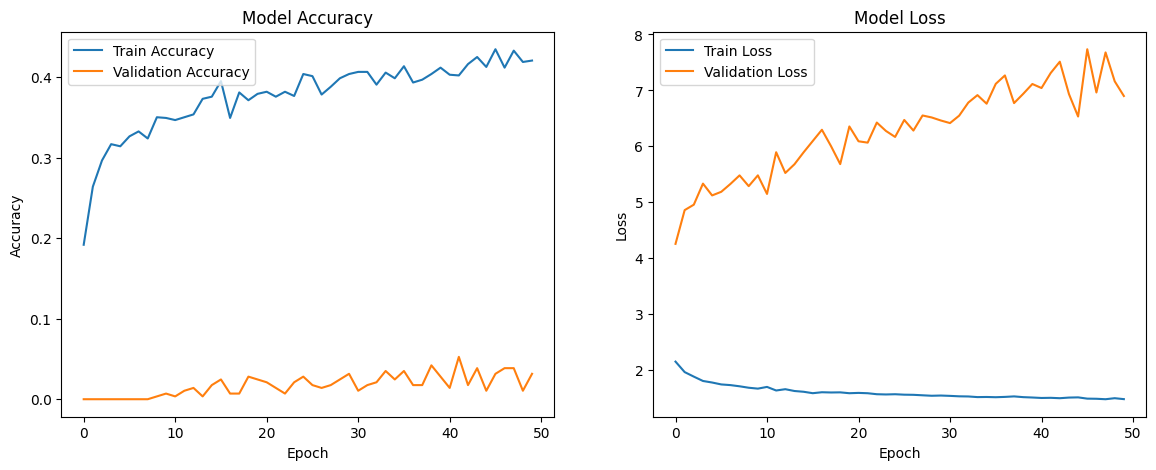

In [19]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [20]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, test_target_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.24137930572032928


## Random Forest

In [21]:
# Perform Random Forest Classification on the artist dataset
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the Random Forest estimator and the parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, train_target_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [22]:
from sklearn.metrics import accuracy_score

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_rf = accuracy_score(test_target_encoded, y_pred_rf)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.400336417157275
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.69      0.39        52
           1       0.38      0.55      0.45       111
           2       0.37      0.53      0.44        90
           3       0.48      0.54      0.51       159
           4       0.39      0.32      0.35       234
           5       0.53      0.27      0.36       363
           6       0.34      0.40      0.37       180

    accuracy                           0.40      1189
   macro avg       0.39      0.47      0.41      1189
weighted avg       0.43      0.40      0.39      1189



Text(0.5, 1.0, 'Training Confusion Matrix')

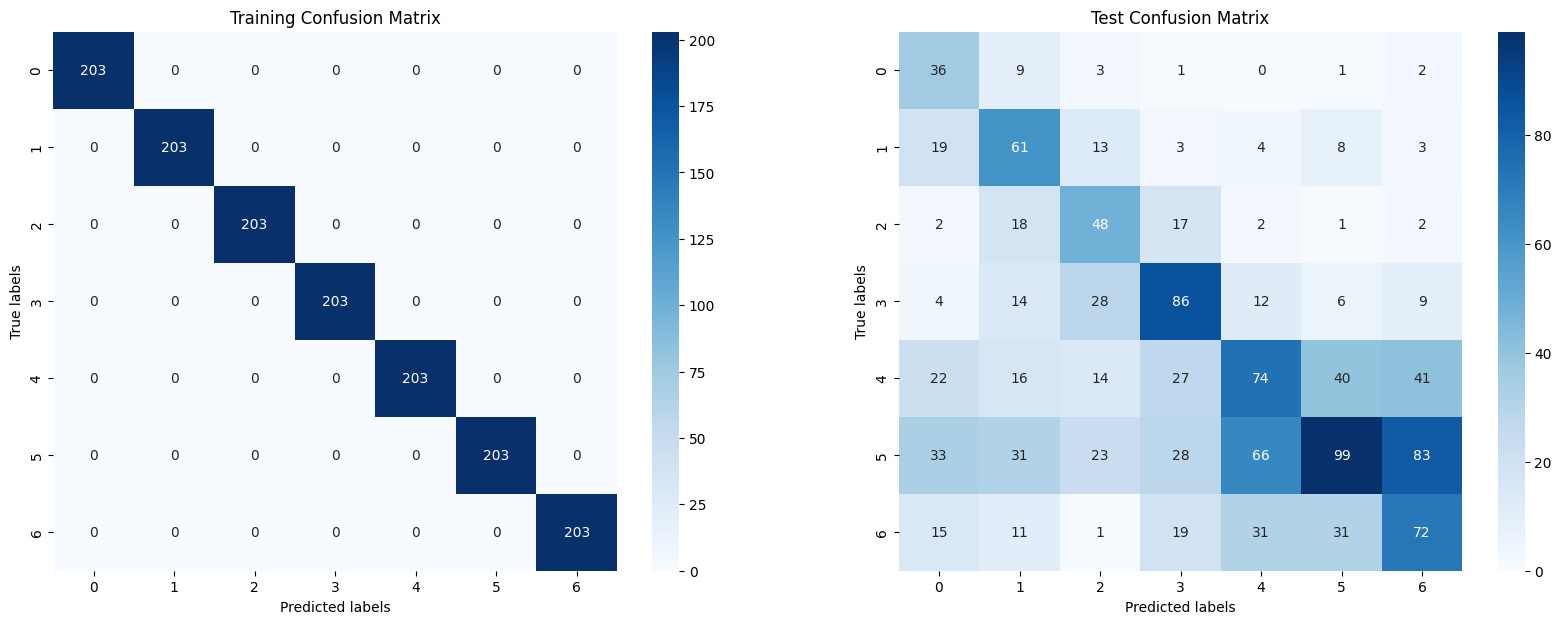

In [23]:
from sklearn.metrics import classification_report

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Test Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(test_target_encoded, y_pred_rf))

# draw confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# train confusion matrix
cm_train = confusion_matrix(train_target_encoded, grid_search_rf.predict(X_train))

# test confusion matrix
cm_test = confusion_matrix(test_target_encoded, y_pred_rf)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(test_target_encoded)), yticklabels=sorted(set(test_target_encoded)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(train_target_encoded)), yticklabels=sorted(set(train_target_encoded)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')


## XGBoost 

In [24]:
# Encode categorical 'genre' for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Change the key and major columns to numerical for input
X_train['key'] = X_train['key'].astype('int')
X_train['major'] = X_train['major'].astype('int')
X_test['key'] = X_test['key'].astype('int')
X_test['major'] = X_test['major'].astype('int')


In [25]:
import xgboost as xgb

# Setting up the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # Use for multi-class classification
    num_class=len(label_encoder.classes_),  # Specify number of classes
    random_state=137
)

# Training the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.40117746005046256
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.69      0.40        52
           1       0.39      0.55      0.46       111
           2       0.32      0.48      0.38        90
           3       0.51      0.53      0.52       159
           4       0.38      0.30      0.34       234
           5       0.53      0.30      0.39       363
           6       0.34      0.40      0.37       180

    accuracy                           0.40      1189
   macro avg       0.39      0.46      0.41      1189
weighted avg       0.43      0.40      0.40      1189



In [27]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Configuring the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Running grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [28]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_classification_report)


Test Set Accuracy: 0.40117746005046256
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.69      0.40        52
           1       0.39      0.55      0.46       111
           2       0.32      0.48      0.38        90
           3       0.51      0.53      0.52       159
           4       0.38      0.30      0.34       234
           5       0.53      0.30      0.39       363
           6       0.34      0.40      0.37       180

    accuracy                           0.40      1189
   macro avg       0.39      0.46      0.41      1189
weighted avg       0.43      0.40      0.40      1189



## Comparison of the models (CHANGE AT END)

- Logistic Regression
    - Test Accuracy: 0.8103448275862069
    - Time: 3.2s
- SVM
    - Test Accuracy: 0.7758620689655172
    - Time: 3.4s
- Neural Network
    - Train Accuracy: 0.688502
    - Test Accuracy: 0.7068965435028076
    - Time: 11m 46.2.s
- Random Forest
    - Test Accuracy: 0.7931034482758621
    - Time: 1m 6.4s
- XGBoost
    - Test Accuracy: 0.7758620689655172
    - Time: 24.5s